In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from datetime import datetime
from src.BPNN import BPNN
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [2]:
# Load the CSV file into a DataFrame
df_antam = pd.read_csv("./data/ANTM.JK.csv")
# Drop rows with NaN values
df_antam.dropna(inplace=True)

# Display the first few rows of the DataFrame
print(df_antam.shape)
df_antam.head()

(3807, 7)


Date        Open        High         Low       Close   Adj Close  \
0  2005-09-29  432.588074  436.787964  407.388763  432.588074  304.904572   
1  2005-09-30  457.787384  457.787384  432.588074  457.787384  322.666016   
2  2005-10-03  470.387024  474.586914  440.987854  470.387024  331.546692   
3  2005-10-04  474.586914  482.986694  466.187164  474.586914  334.506927   
4  2005-10-05  482.986694  482.986694  466.187164  482.986694  340.427429   

        Volume  
0   76180670.0  
1  105493978.0  
2   59712955.0  
3   56236668.0  
4   31319315.0

In [3]:
# Extract the 'Open' columns as numpy arrays
open_data = df_antam['Open'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(open_data)

print("\nScaled Data Shape :", scaled_data.shape)

#Verify the data
print("\nScaling Verification:")
print(f"Original price range: [{open_data.min():.2f}, {open_data.max():.2f}]")
print(f"Scaled price range: [{scaled_data.min():.2f}, {scaled_data.max():.2f}]")


Scaled Data Shape : (3807, 1)

Scaling Verification:
Original price range: [290.00, 4409.88]
Scaled price range: [0.00, 1.00]


In [4]:
# Made data into an X day window to predict y days ahead
def create_dataset(data, window_size, y_days_ahead=1):
    X, y = [], []
    for i in range(len(data) - window_size - y_days_ahead + 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size : i + window_size + y_days_ahead, 0])

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # Reshape X to be 3D for Conv1D
    X = X.reshape(X.shape[0], X.shape[1], 1)

    print(f"X shape: {np.array(X).shape}")
    print(f"y shape: {np.array(y).shape}")
    return X, y

In [5]:
#Analyze the effect of the window size
minWindowsPredicted = 1
minWindowsInput = 1
numberOfDataPoints = 10
distanceBetweenDataPointsWindows = 1
distanceBetweenDataPointsPredict = 1
error = np.zeros((numberOfDataPoints, numberOfDataPoints))
iteration = 0

In [6]:
def build_1d_cnn_model(window_size, num_features, output_size):
    model = Sequential([
        # Input layer
        tf.keras.layers.Input(shape=(window_size, num_features)),
        
        # First convolutional block - always present
        Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
        BatchNormalization(),
        
        # Second convolutional block - always present
        Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
        BatchNormalization(),
        
        # Global pooling to handle variable length inputs
        tf.keras.layers.GlobalAveragePooling1D(),
        
        # Consistent dense layers
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(output_size, activation='linear')
    ])
    
    # Compile model with appropriate loss for regression
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mean_squared_error',
                 metrics=['mse'])
    
    return model


Iteration: 0, Window Size: 1, Y Days Ahead: 1
X shape: (3806, 1, 1)
y shape: (3806, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Mean Squared Error: 0.0006
Model saved to ./models_cnn/cnn_w1_d1.keras
Final epoch: 18


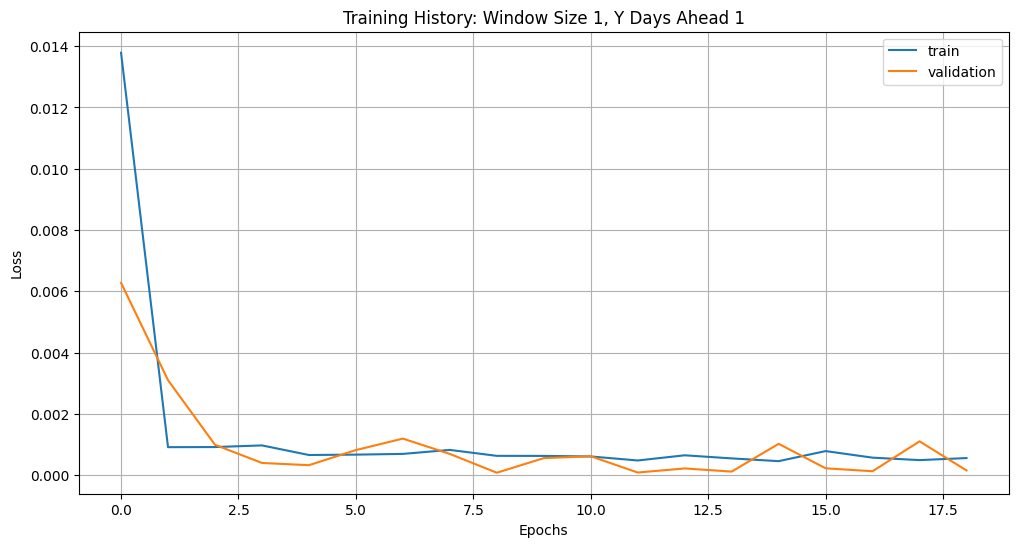

Iteration: 1, Window Size: 1, Y Days Ahead: 2
X shape: (3805, 1, 1)
y shape: (3805, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w1_d2.keras
Final epoch: 37


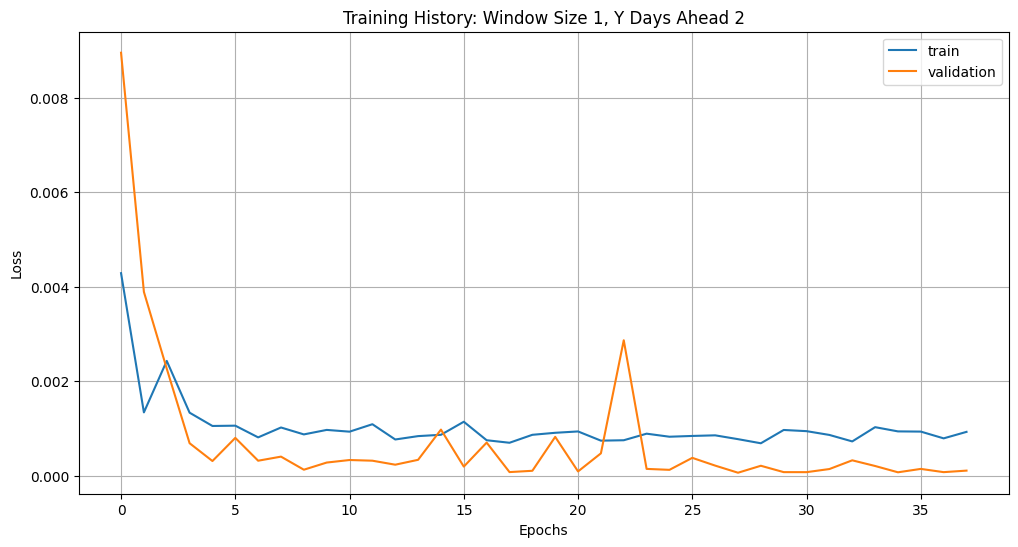

Iteration: 2, Window Size: 1, Y Days Ahead: 3
X shape: (3804, 1, 1)
y shape: (3804, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0006
Model saved to ./models_cnn/cnn_w1_d3.keras
Final epoch: 25


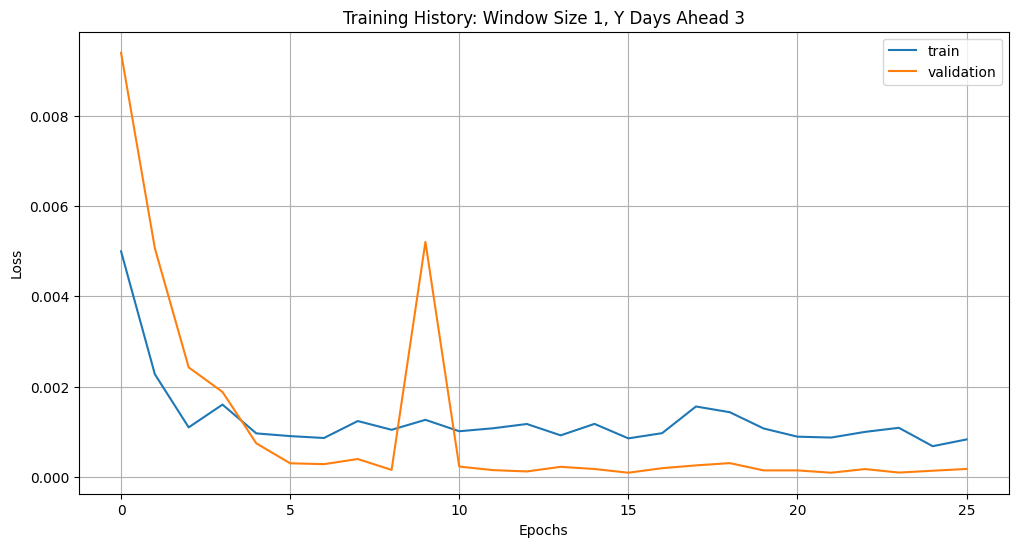

Iteration: 3, Window Size: 1, Y Days Ahead: 4
X shape: (3803, 1, 1)
y shape: (3803, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0008
Model saved to ./models_cnn/cnn_w1_d4.keras
Final epoch: 58


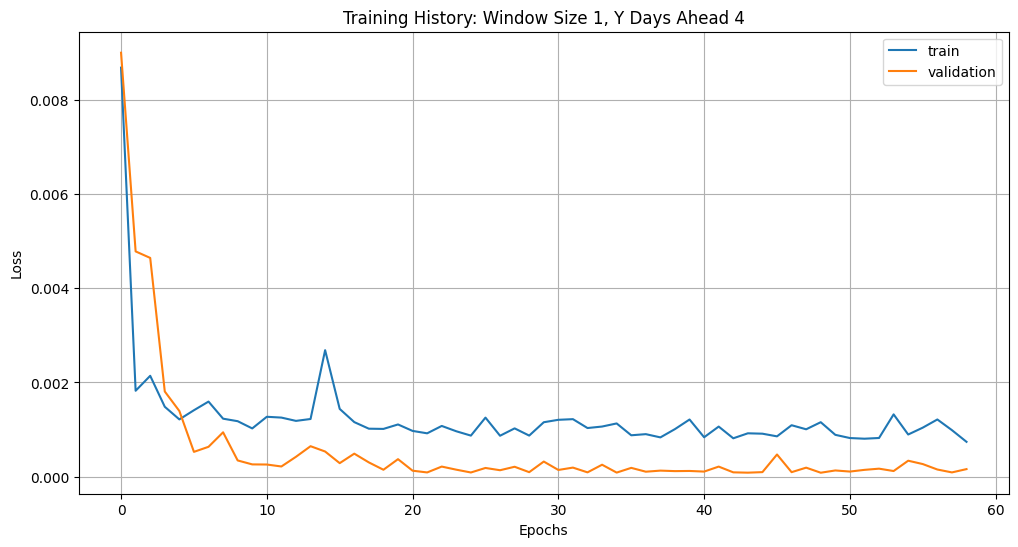

Iteration: 4, Window Size: 1, Y Days Ahead: 5
X shape: (3802, 1, 1)
y shape: (3802, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w1_d5.keras
Final epoch: 37


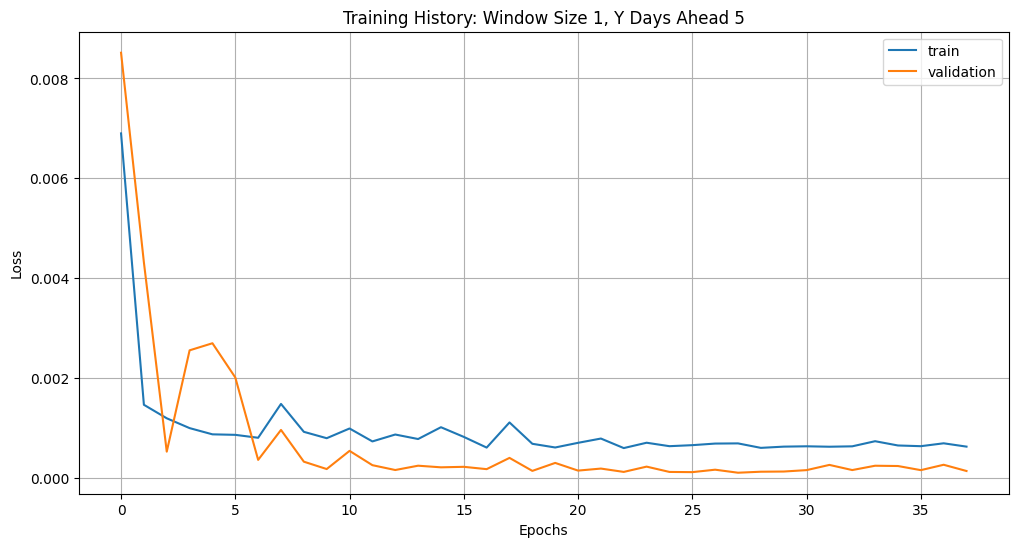

Iteration: 5, Window Size: 1, Y Days Ahead: 6
X shape: (3801, 1, 1)
y shape: (3801, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0012
Model saved to ./models_cnn/cnn_w1_d6.keras
Final epoch: 27


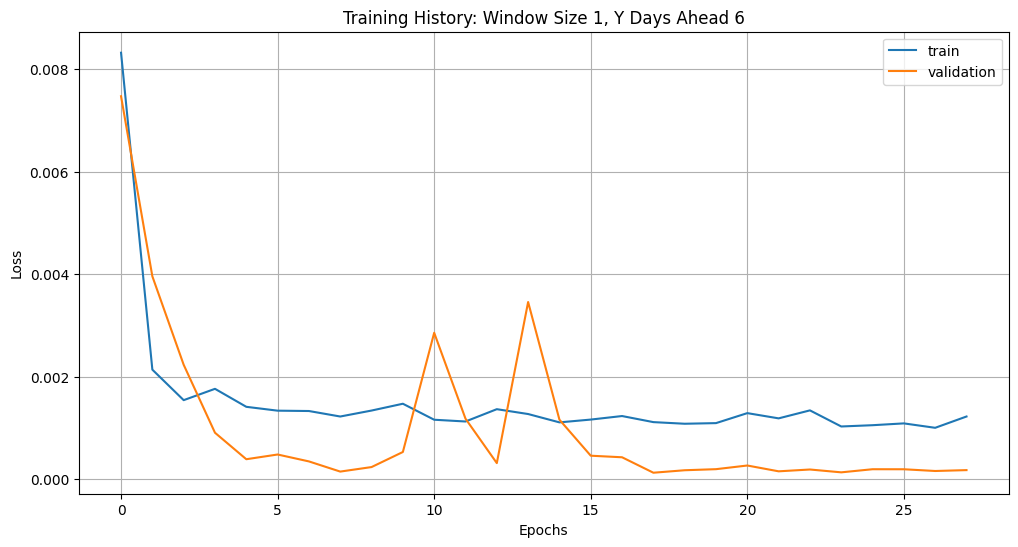

Iteration: 6, Window Size: 1, Y Days Ahead: 7
X shape: (3800, 1, 1)
y shape: (3800, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
Mean Squared Error: 0.0014
Model saved to ./models_cnn/cnn_w1_d7.keras
Final epoch: 28


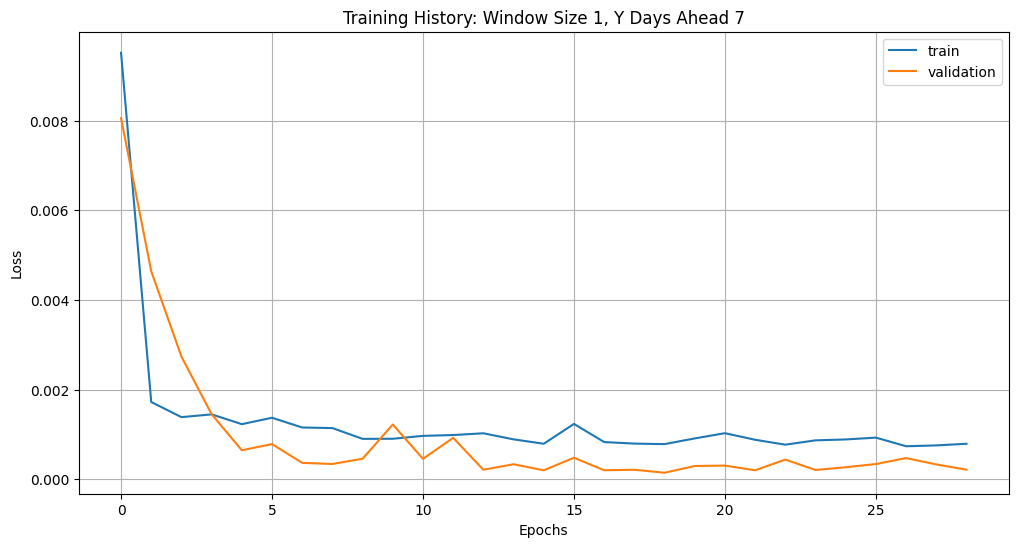

Iteration: 7, Window Size: 1, Y Days Ahead: 8
X shape: (3799, 1, 1)
y shape: (3799, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mean Squared Error: 0.0012
Model saved to ./models_cnn/cnn_w1_d8.keras
Final epoch: 34


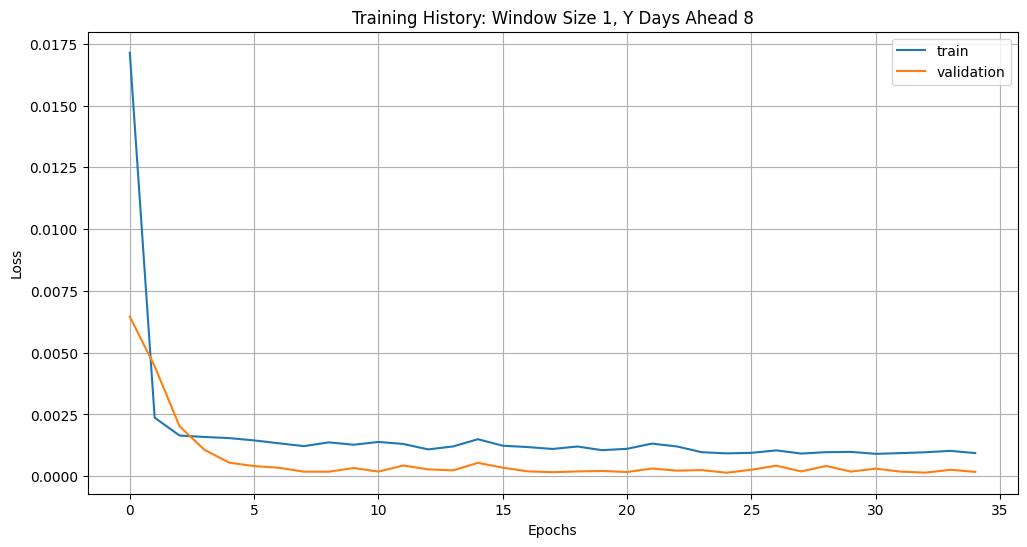

Iteration: 8, Window Size: 1, Y Days Ahead: 9
X shape: (3798, 1, 1)
y shape: (3798, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w1_d9.keras
Final epoch: 51


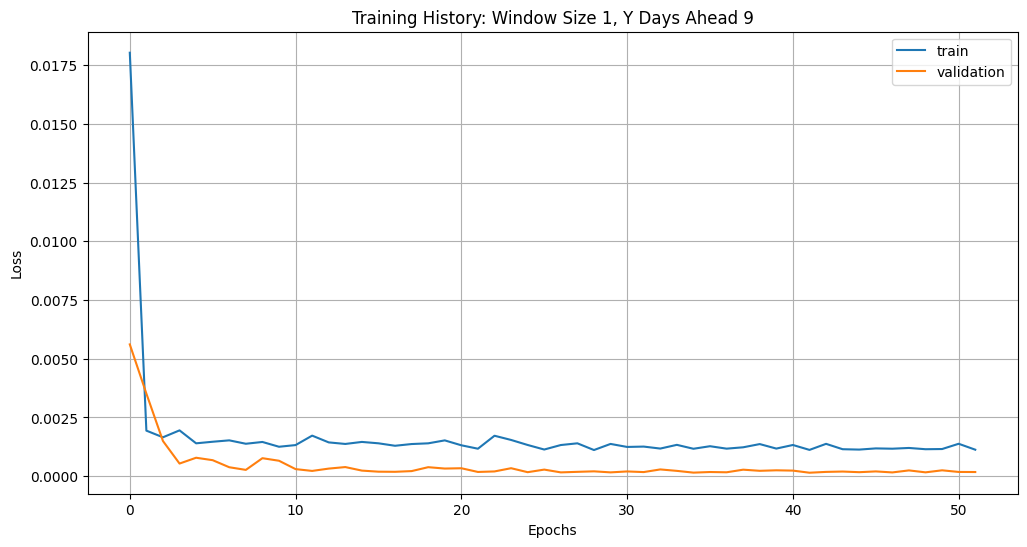

Iteration: 9, Window Size: 1, Y Days Ahead: 10
X shape: (3797, 1, 1)
y shape: (3797, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
Mean Squared Error: 0.0015
Model saved to ./models_cnn/cnn_w1_d10.keras
Final epoch: 41


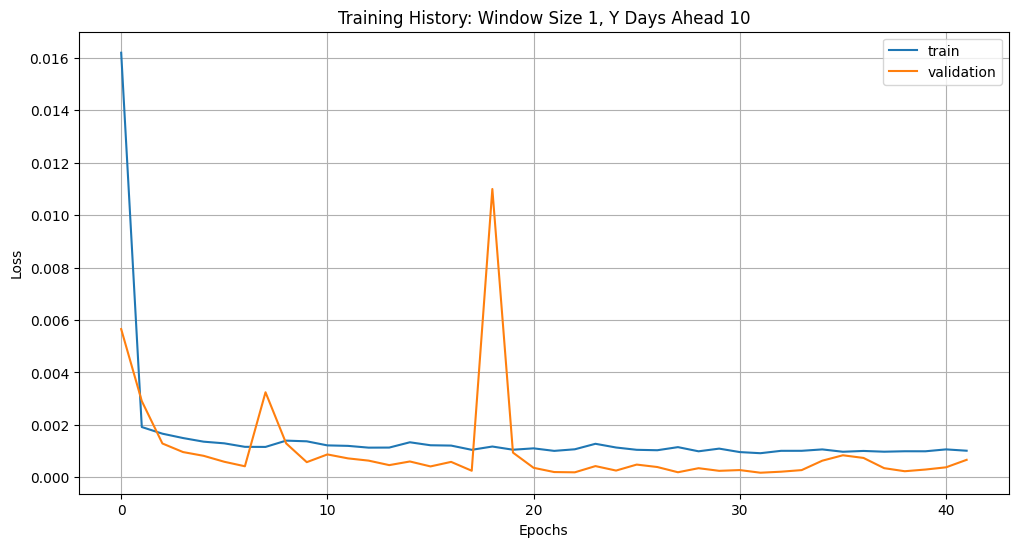

Iteration: 10, Window Size: 2, Y Days Ahead: 1
X shape: (3805, 2, 1)
y shape: (3805, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Squared Error: 0.0004
Model saved to ./models_cnn/cnn_w2_d1.keras
Final epoch: 19


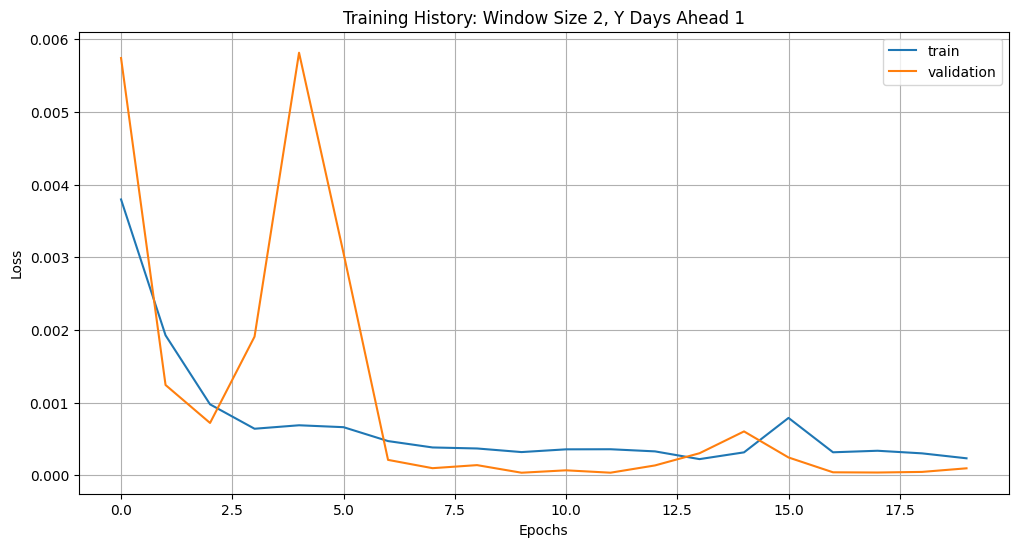

Iteration: 11, Window Size: 2, Y Days Ahead: 2
X shape: (3804, 2, 1)
y shape: (3804, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0006
Model saved to ./models_cnn/cnn_w2_d2.keras
Final epoch: 36


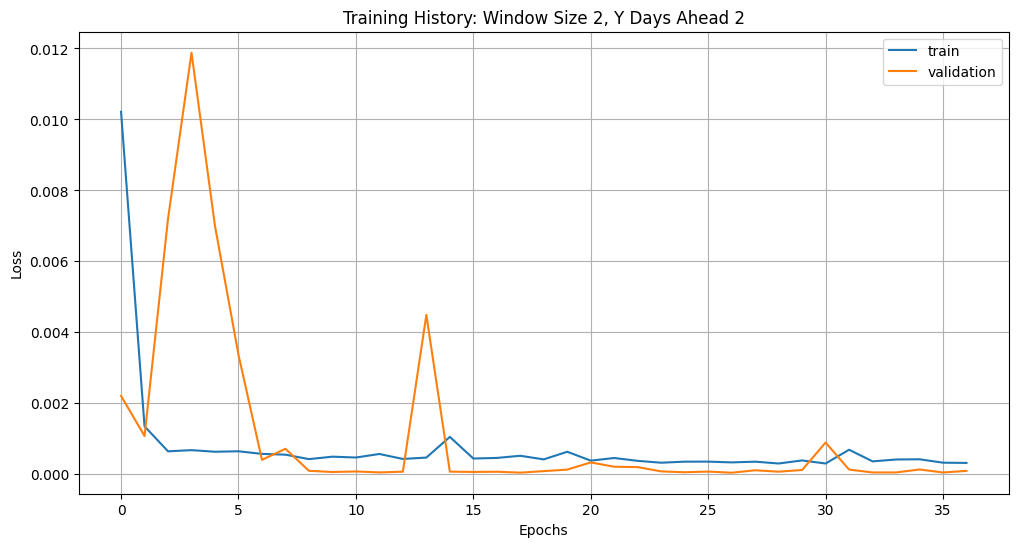

Iteration: 12, Window Size: 2, Y Days Ahead: 3
X shape: (3803, 2, 1)
y shape: (3803, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0014
Model saved to ./models_cnn/cnn_w2_d3.keras
Final epoch: 28


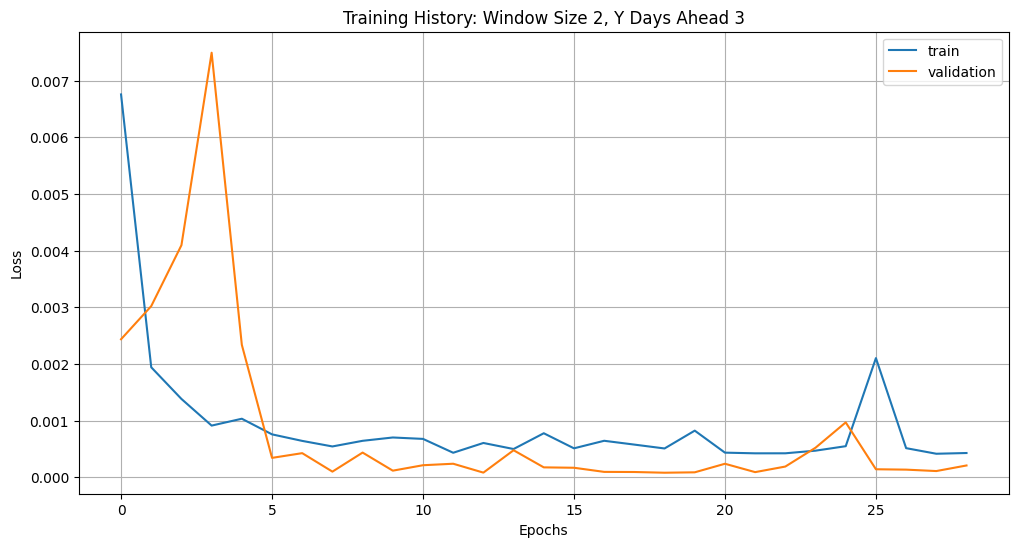

Iteration: 13, Window Size: 2, Y Days Ahead: 4
X shape: (3802, 2, 1)
y shape: (3802, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w2_d4.keras
Final epoch: 21


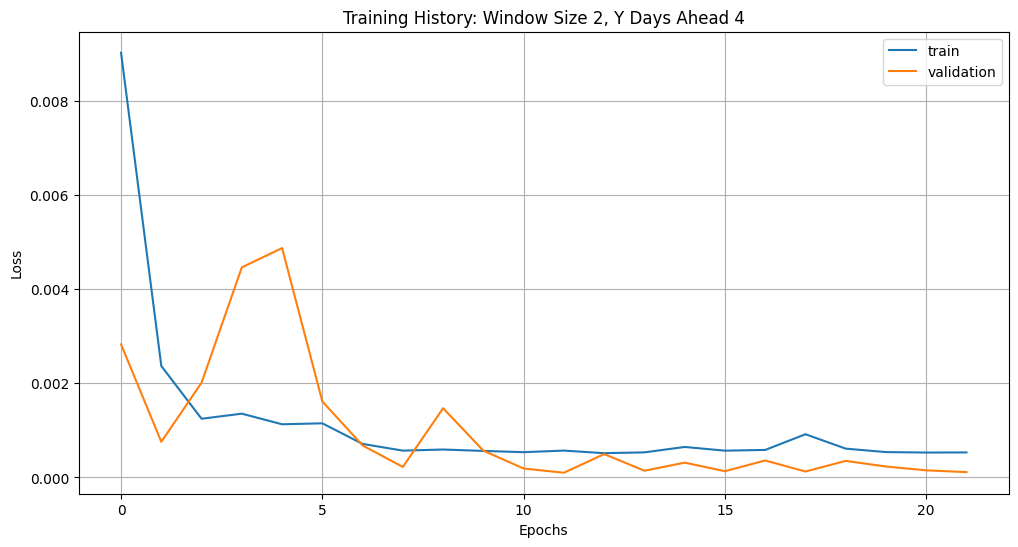

Iteration: 14, Window Size: 2, Y Days Ahead: 5
X shape: (3801, 2, 1)
y shape: (3801, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w2_d5.keras
Final epoch: 31


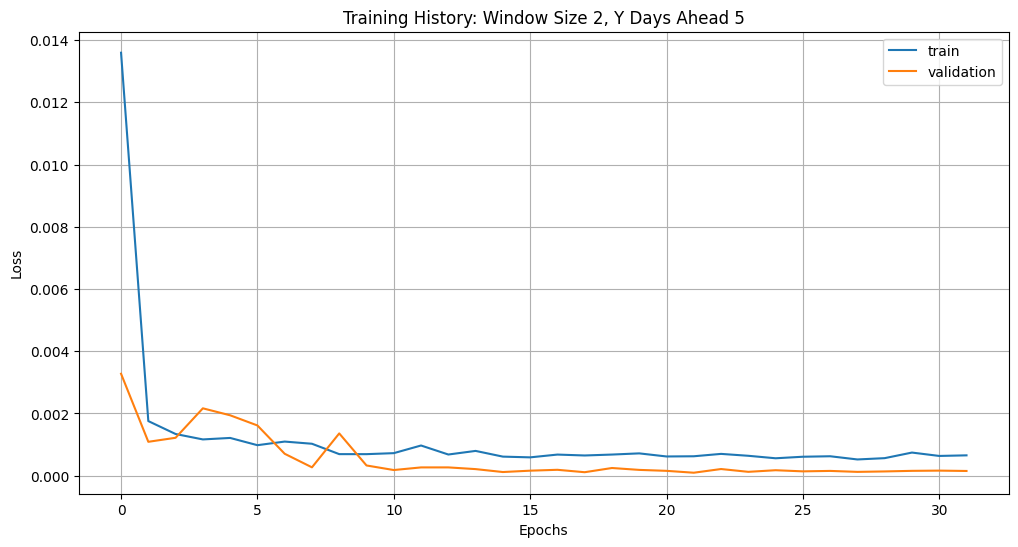

Iteration: 15, Window Size: 2, Y Days Ahead: 6
X shape: (3800, 2, 1)
y shape: (3800, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0010
Model saved to ./models_cnn/cnn_w2_d6.keras
Final epoch: 34


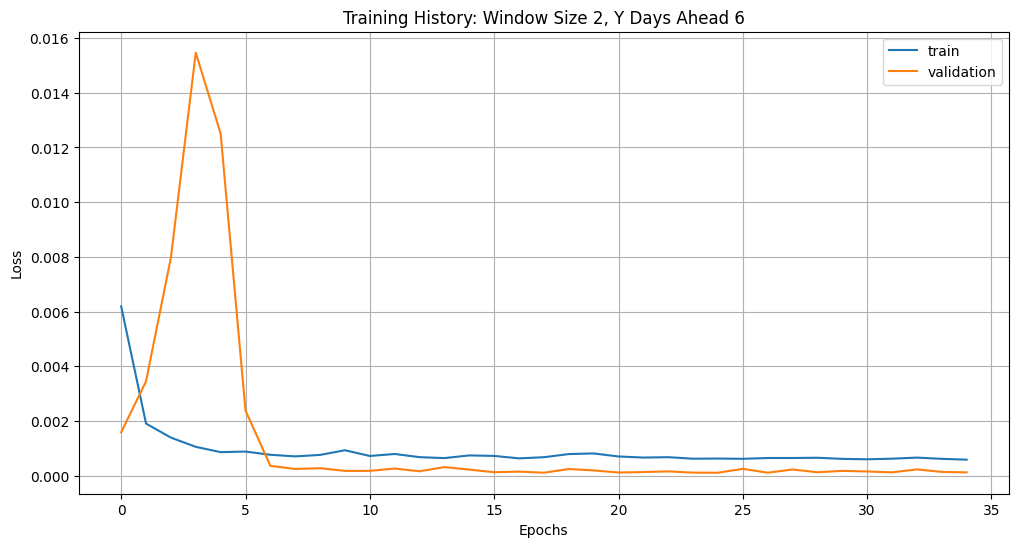

Iteration: 16, Window Size: 2, Y Days Ahead: 7
X shape: (3799, 2, 1)
y shape: (3799, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Mean Squared Error: 0.0010
Model saved to ./models_cnn/cnn_w2_d7.keras
Final epoch: 39


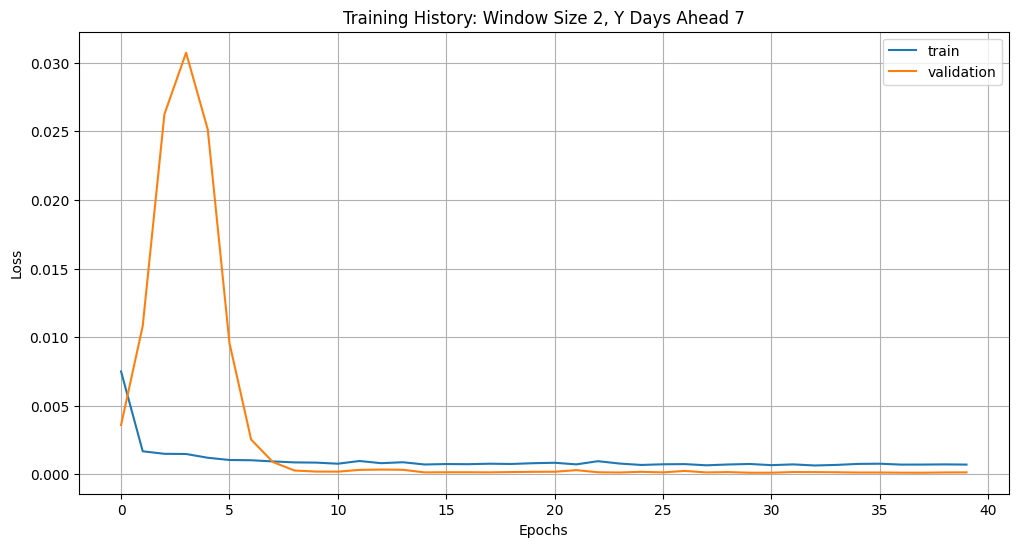

Iteration: 17, Window Size: 2, Y Days Ahead: 8
X shape: (3798, 2, 1)
y shape: (3798, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0014
Model saved to ./models_cnn/cnn_w2_d8.keras
Final epoch: 29


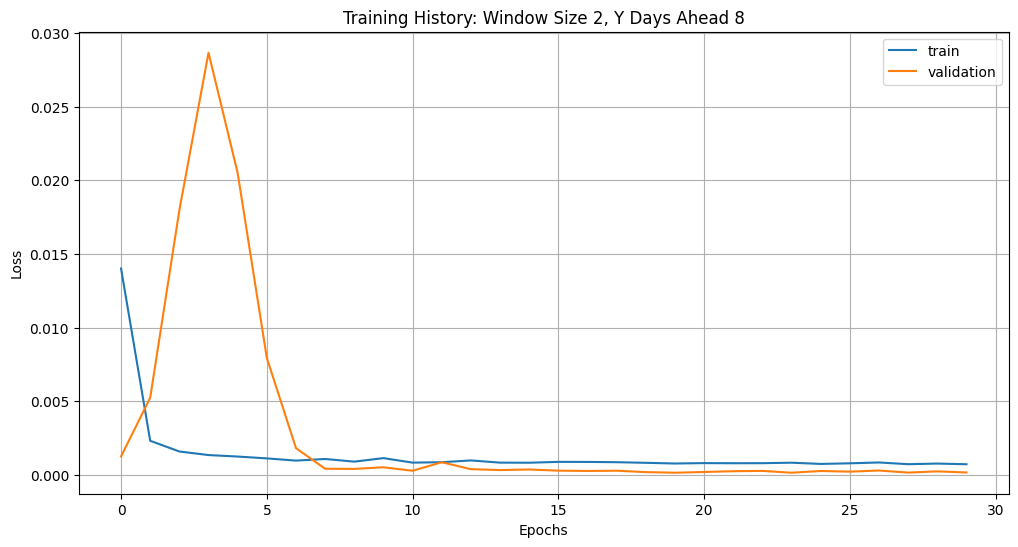

Iteration: 18, Window Size: 2, Y Days Ahead: 9
X shape: (3797, 2, 1)
y shape: (3797, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w2_d9.keras
Final epoch: 47


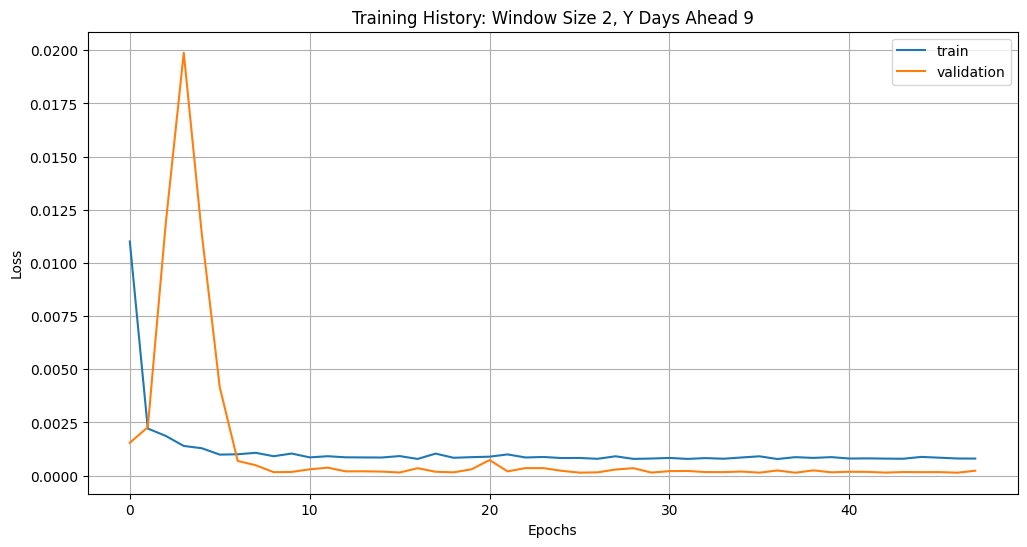

Iteration: 19, Window Size: 2, Y Days Ahead: 10
X shape: (3796, 2, 1)
y shape: (3796, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0016
Model saved to ./models_cnn/cnn_w2_d10.keras
Final epoch: 33


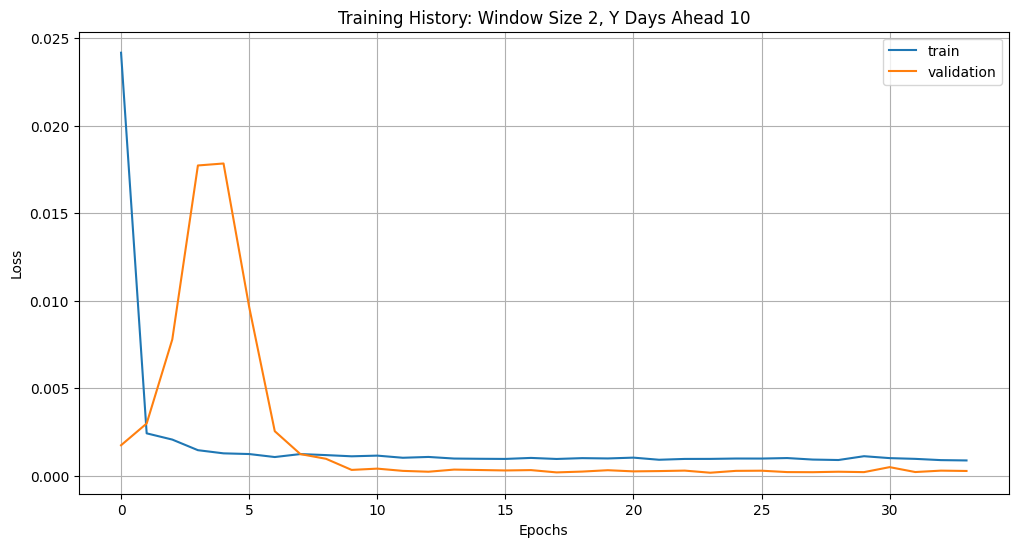

Iteration: 20, Window Size: 3, Y Days Ahead: 1
X shape: (3804, 3, 1)
y shape: (3804, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0004
Model saved to ./models_cnn/cnn_w3_d1.keras
Final epoch: 31


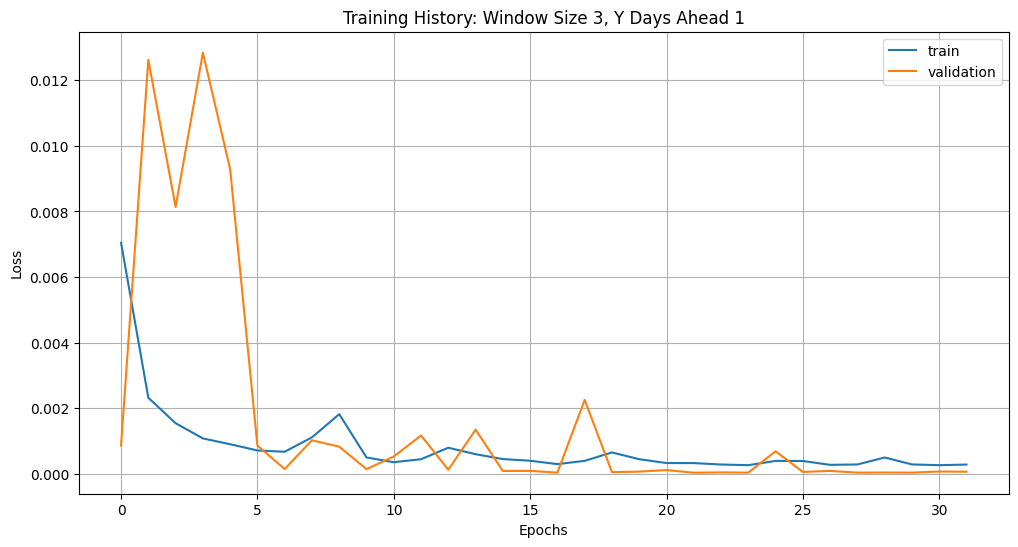

Iteration: 21, Window Size: 3, Y Days Ahead: 2
X shape: (3803, 3, 1)
y shape: (3803, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Mean Squared Error: 0.0021
Model saved to ./models_cnn/cnn_w3_d2.keras
Final epoch: 25


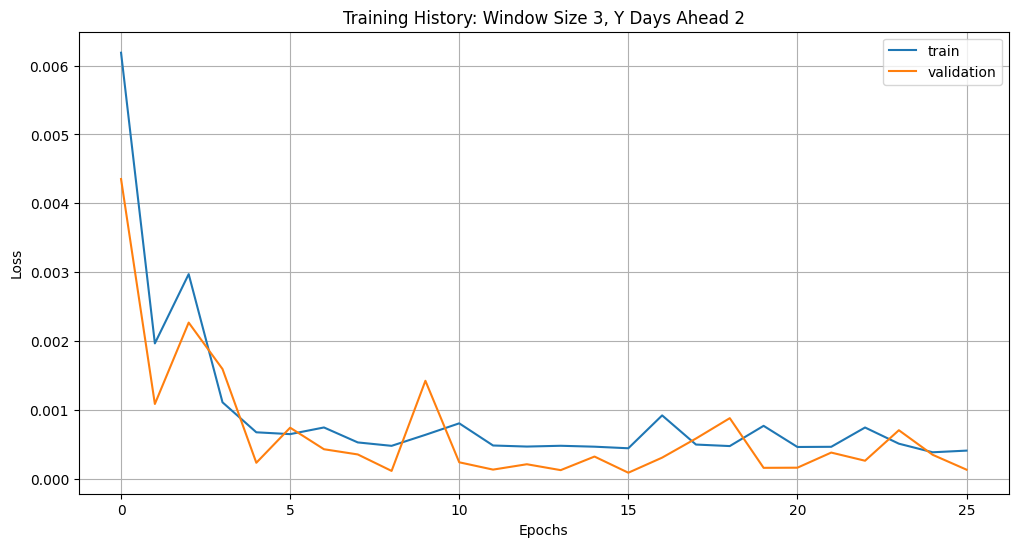

Iteration: 22, Window Size: 3, Y Days Ahead: 3
X shape: (3802, 3, 1)
y shape: (3802, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w3_d3.keras
Final epoch: 29


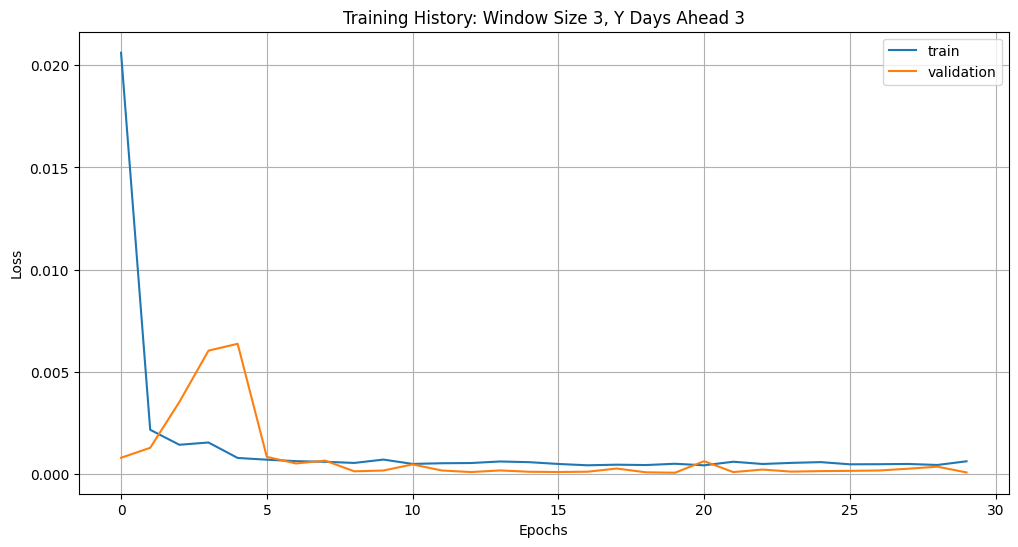

Iteration: 23, Window Size: 3, Y Days Ahead: 4
X shape: (3801, 3, 1)
y shape: (3801, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w3_d4.keras
Final epoch: 48


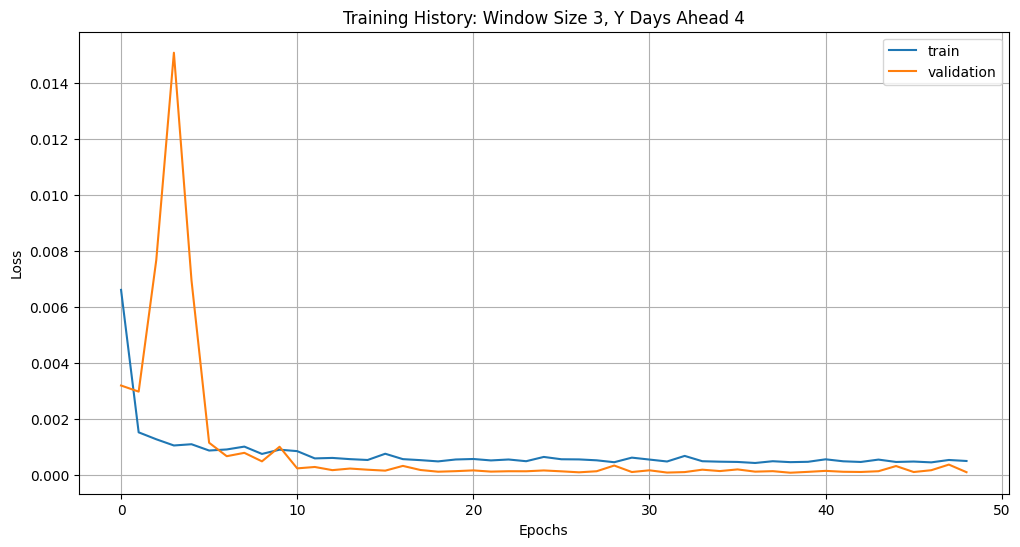

Iteration: 24, Window Size: 3, Y Days Ahead: 5
X shape: (3800, 3, 1)
y shape: (3800, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w3_d5.keras
Final epoch: 35


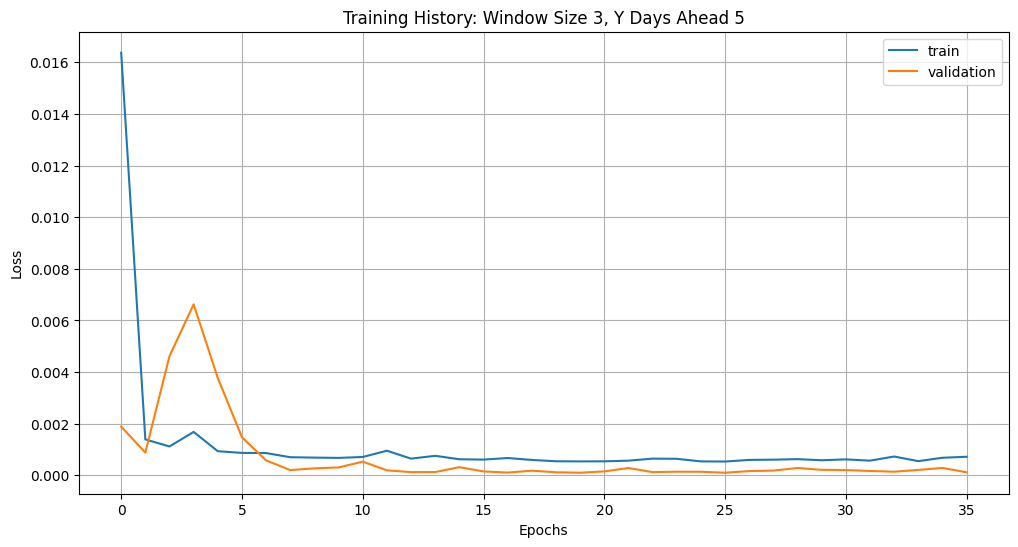

Iteration: 25, Window Size: 3, Y Days Ahead: 6
X shape: (3799, 3, 1)
y shape: (3799, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Mean Squared Error: 0.0010
Model saved to ./models_cnn/cnn_w3_d6.keras
Final epoch: 36


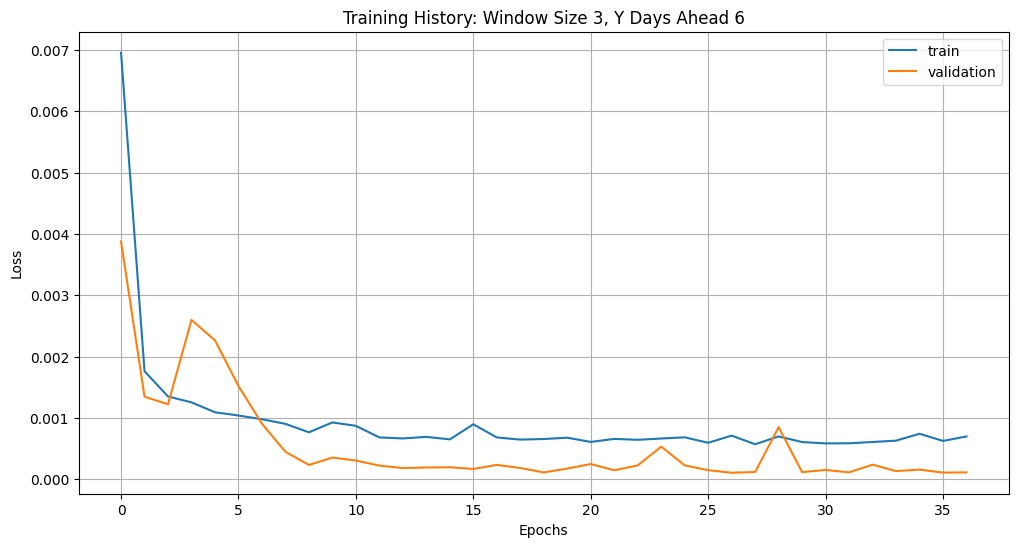

Iteration: 26, Window Size: 3, Y Days Ahead: 7
X shape: (3798, 3, 1)
y shape: (3798, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Mean Squared Error: 0.0011
Model saved to ./models_cnn/cnn_w3_d7.keras
Final epoch: 28


Iteration: 27, Window Size: 3, Y Days Ahead: 8
X shape: (3797, 3, 1)
y shape: (3797, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w3_d8.keras
Final epoch: 31


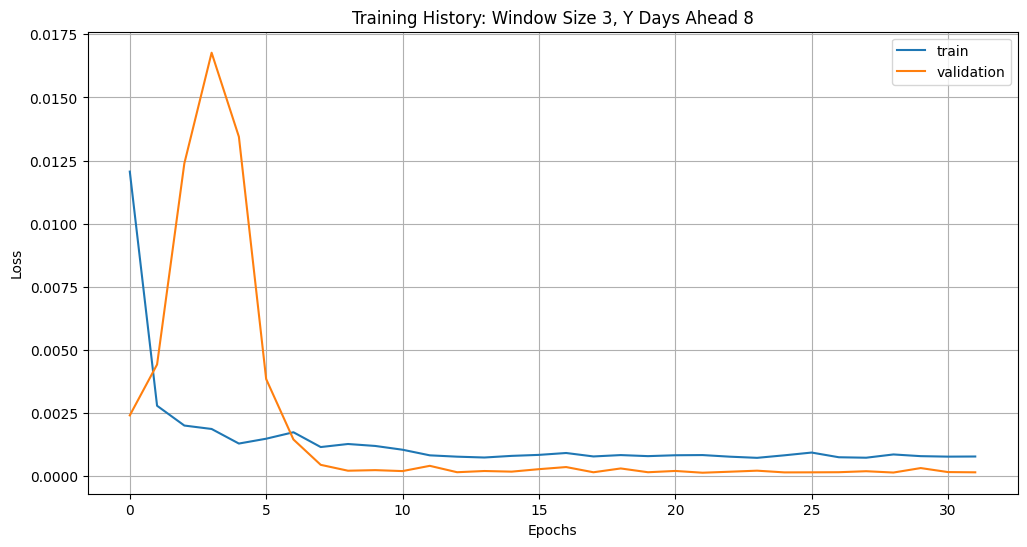

Iteration: 28, Window Size: 3, Y Days Ahead: 9
X shape: (3796, 3, 1)
y shape: (3796, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Mean Squared Error: 0.0015
Model saved to ./models_cnn/cnn_w3_d9.keras
Final epoch: 20


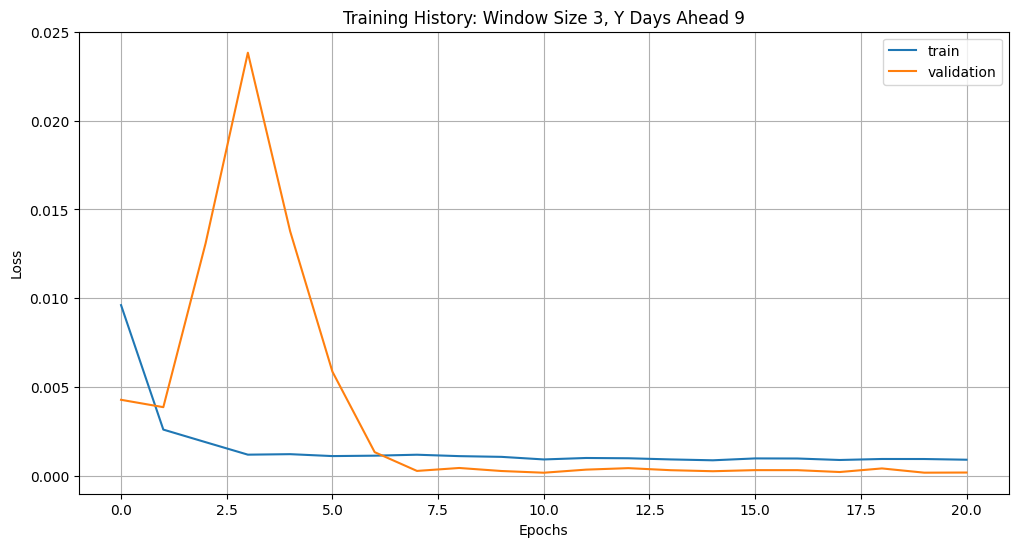

Iteration: 29, Window Size: 3, Y Days Ahead: 10
X shape: (3795, 3, 1)
y shape: (3795, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Mean Squared Error: 0.0014
Model saved to ./models_cnn/cnn_w3_d10.keras
Final epoch: 30


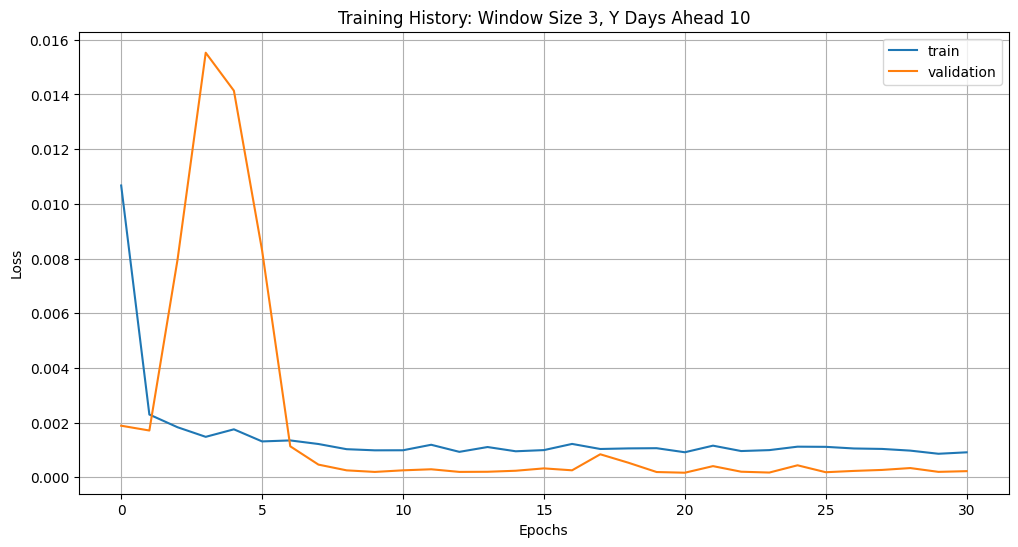

Iteration: 30, Window Size: 4, Y Days Ahead: 1
X shape: (3803, 4, 1)
y shape: (3803, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0004
Model saved to ./models_cnn/cnn_w4_d1.keras
Final epoch: 42


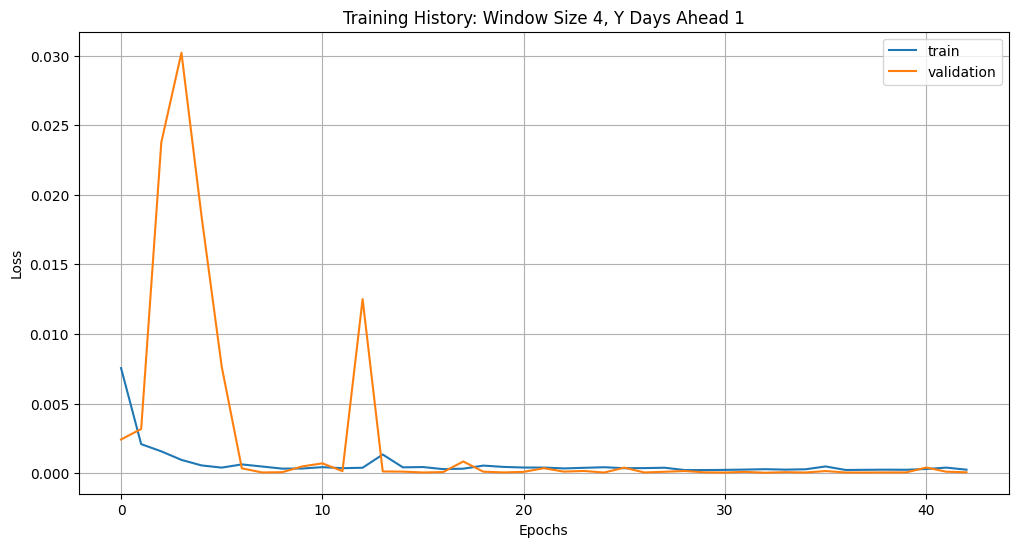

Iteration: 31, Window Size: 4, Y Days Ahead: 2
X shape: (3802, 4, 1)
y shape: (3802, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Mean Squared Error: 0.0005
Model saved to ./models_cnn/cnn_w4_d2.keras
Final epoch: 23


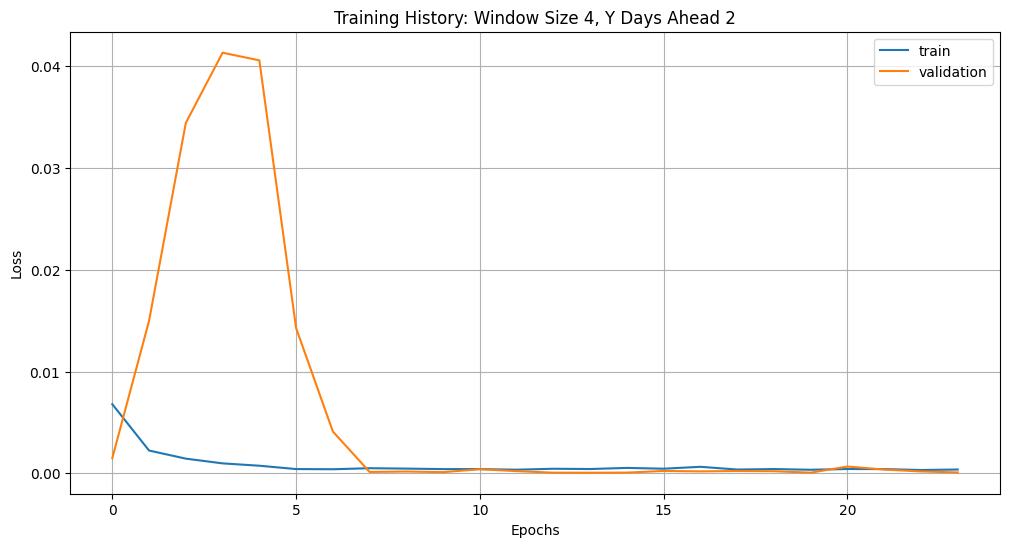

Iteration: 32, Window Size: 4, Y Days Ahead: 3
X shape: (3801, 4, 1)
y shape: (3801, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w4_d3.keras
Final epoch: 48


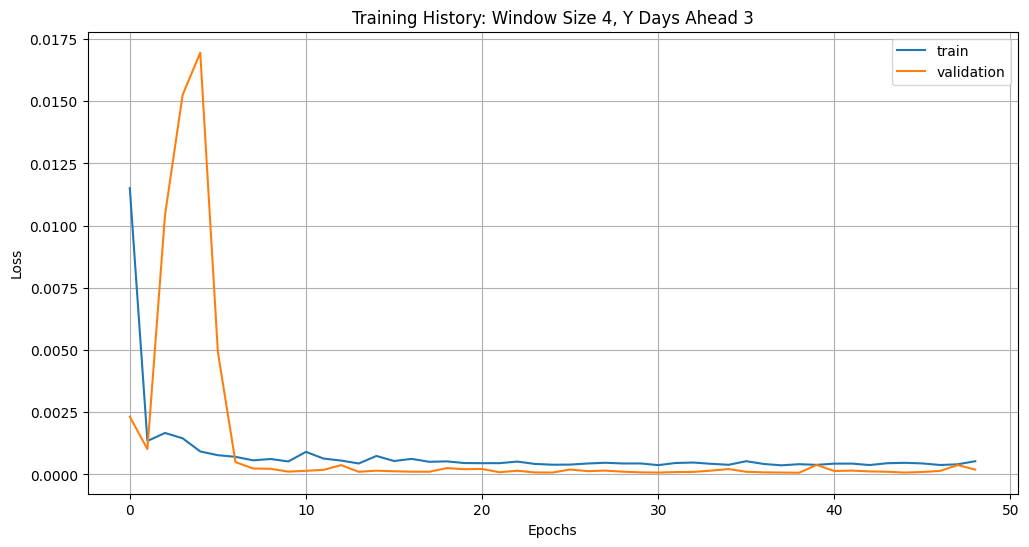

Iteration: 33, Window Size: 4, Y Days Ahead: 4
X shape: (3800, 4, 1)
y shape: (3800, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w4_d4.keras
Final epoch: 42


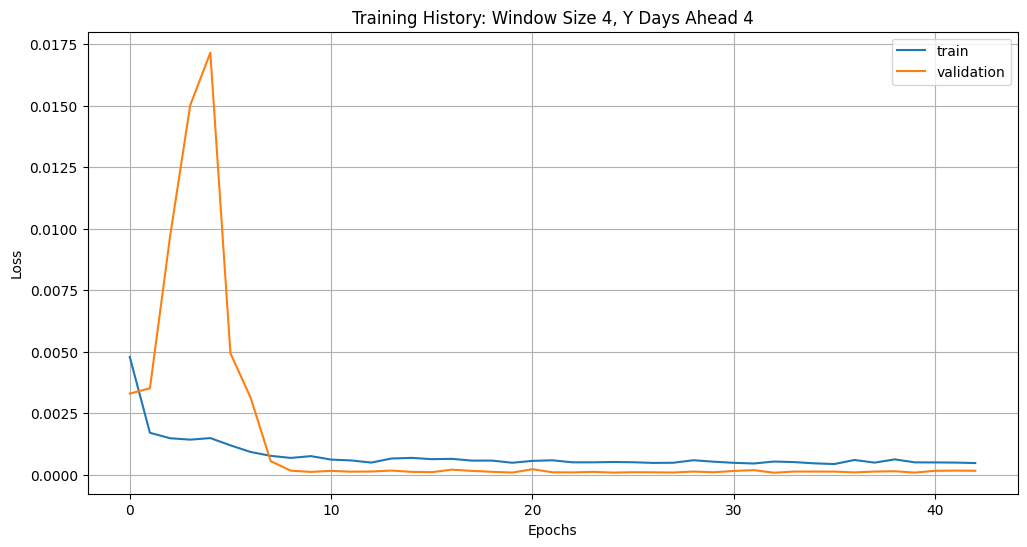

Iteration: 34, Window Size: 4, Y Days Ahead: 5
X shape: (3799, 4, 1)
y shape: (3799, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w4_d5.keras
Final epoch: 39


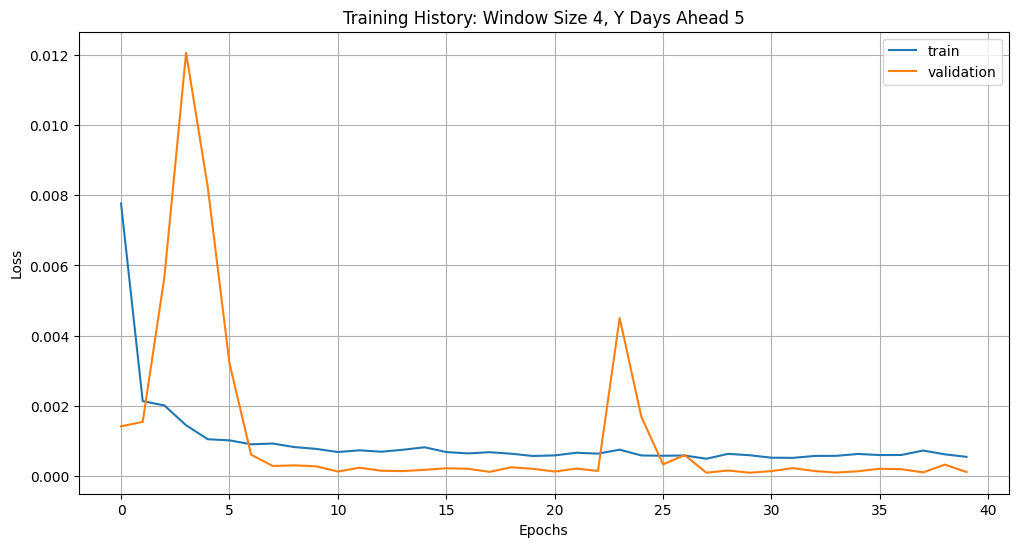

Iteration: 35, Window Size: 4, Y Days Ahead: 6
X shape: (3798, 4, 1)
y shape: (3798, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w4_d6.keras
Final epoch: 20


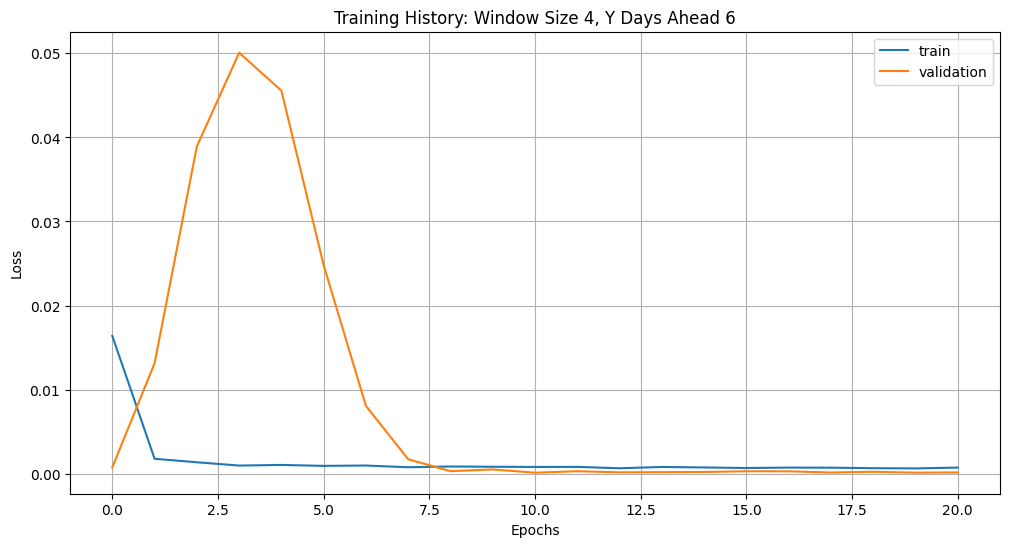

Iteration: 36, Window Size: 4, Y Days Ahead: 7
X shape: (3797, 4, 1)
y shape: (3797, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Mean Squared Error: 0.0010
Model saved to ./models_cnn/cnn_w4_d7.keras
Final epoch: 20


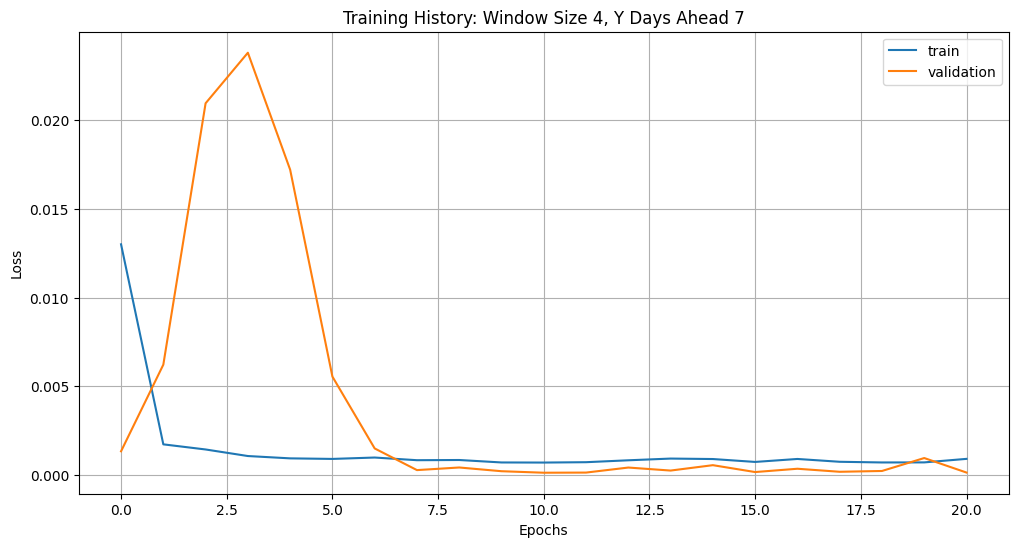

Iteration: 37, Window Size: 4, Y Days Ahead: 8
X shape: (3796, 4, 1)
y shape: (3796, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mean Squared Error: 0.0011
Model saved to ./models_cnn/cnn_w4_d8.keras
Final epoch: 39


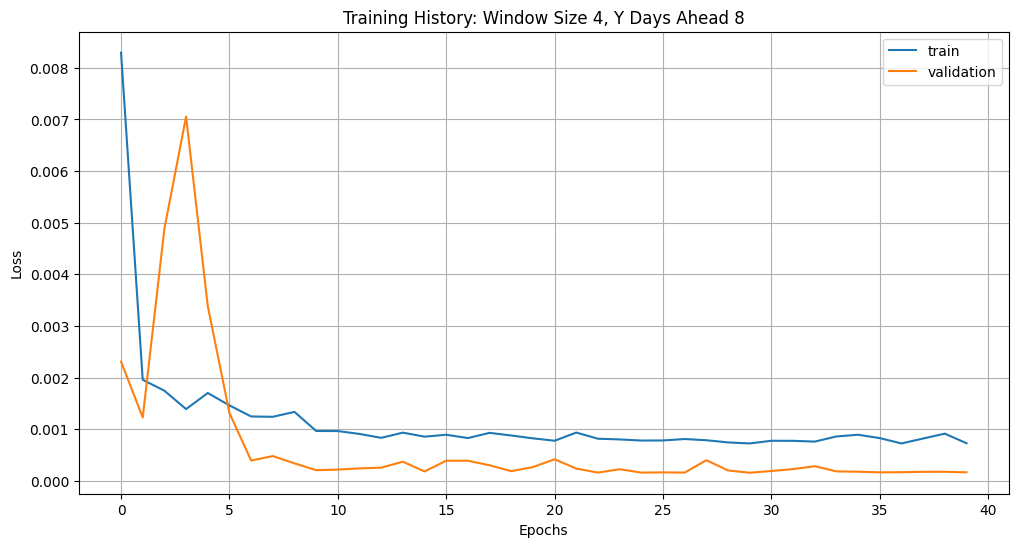

Iteration: 38, Window Size: 4, Y Days Ahead: 9
X shape: (3795, 4, 1)
y shape: (3795, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w4_d9.keras
Final epoch: 32


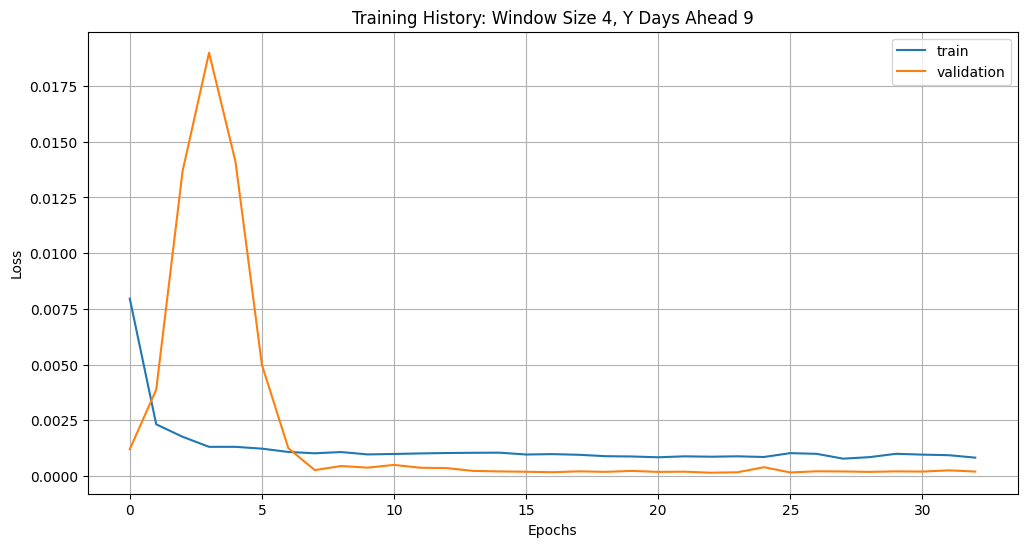

Iteration: 39, Window Size: 4, Y Days Ahead: 10
X shape: (3794, 4, 1)
y shape: (3794, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Mean Squared Error: 0.0012
Model saved to ./models_cnn/cnn_w4_d10.keras
Final epoch: 51


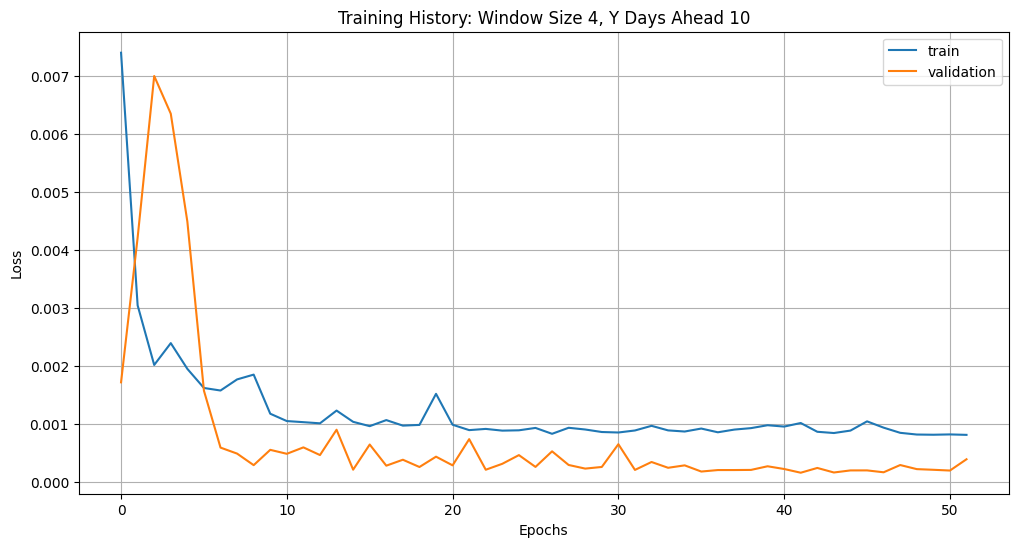

Iteration: 40, Window Size: 5, Y Days Ahead: 1
X shape: (3802, 5, 1)
y shape: (3802, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0004
Model saved to ./models_cnn/cnn_w5_d1.keras
Final epoch: 46


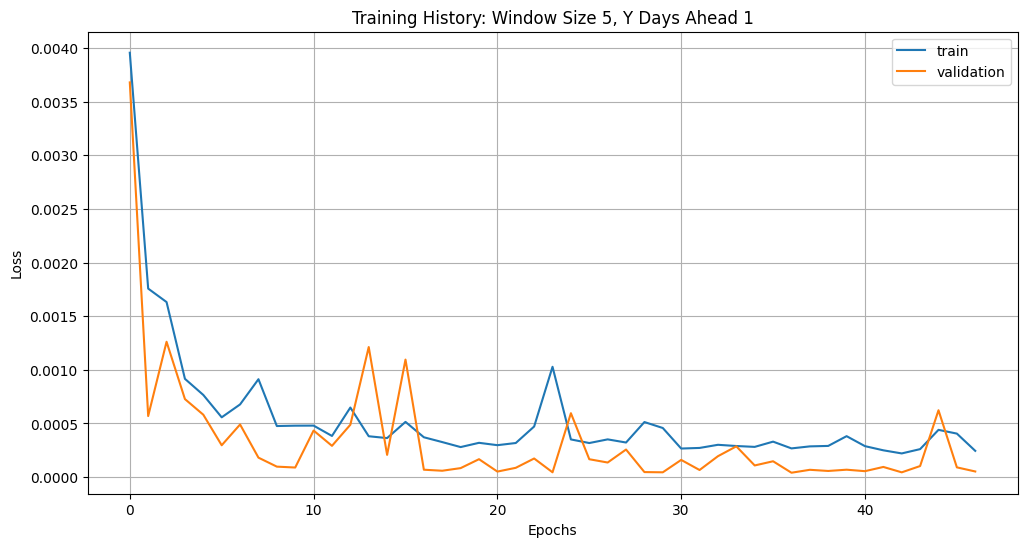

Iteration: 41, Window Size: 5, Y Days Ahead: 2
X shape: (3801, 5, 1)
y shape: (3801, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Mean Squared Error: 0.0005
Model saved to ./models_cnn/cnn_w5_d2.keras
Final epoch: 47


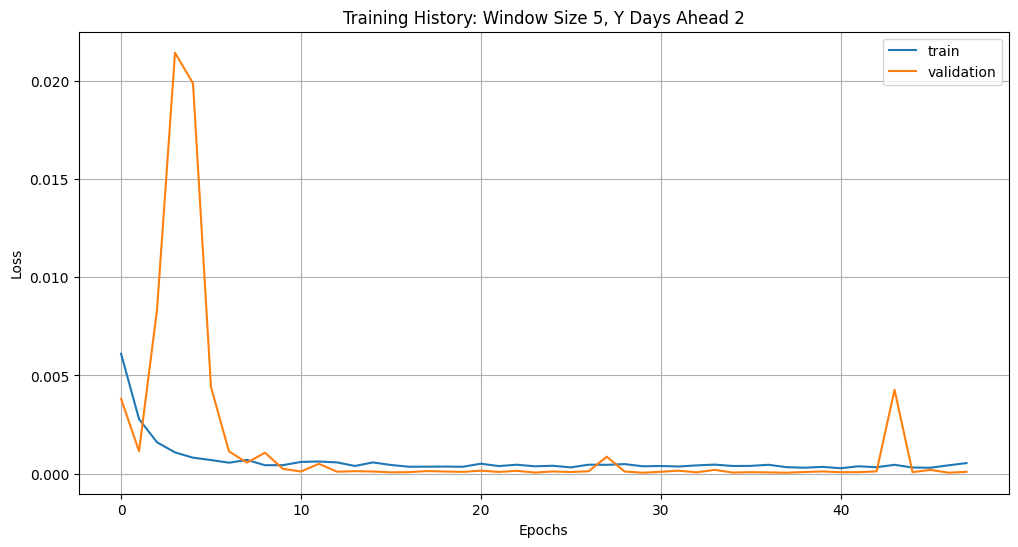

Iteration: 42, Window Size: 5, Y Days Ahead: 3
X shape: (3800, 5, 1)
y shape: (3800, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Mean Squared Error: 0.0005
Model saved to ./models_cnn/cnn_w5_d3.keras
Final epoch: 25


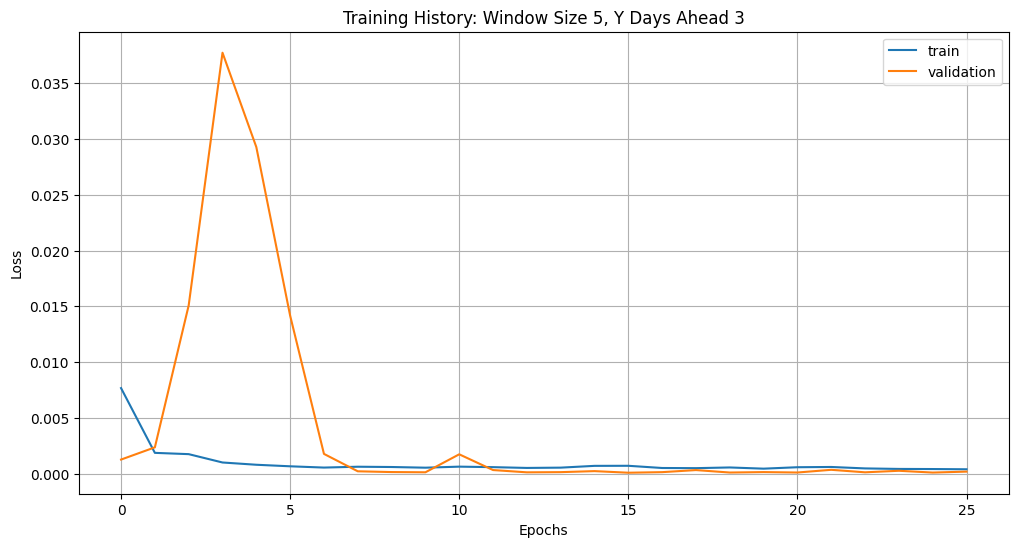

Iteration: 43, Window Size: 5, Y Days Ahead: 4
X shape: (3799, 5, 1)
y shape: (3799, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w5_d4.keras
Final epoch: 29


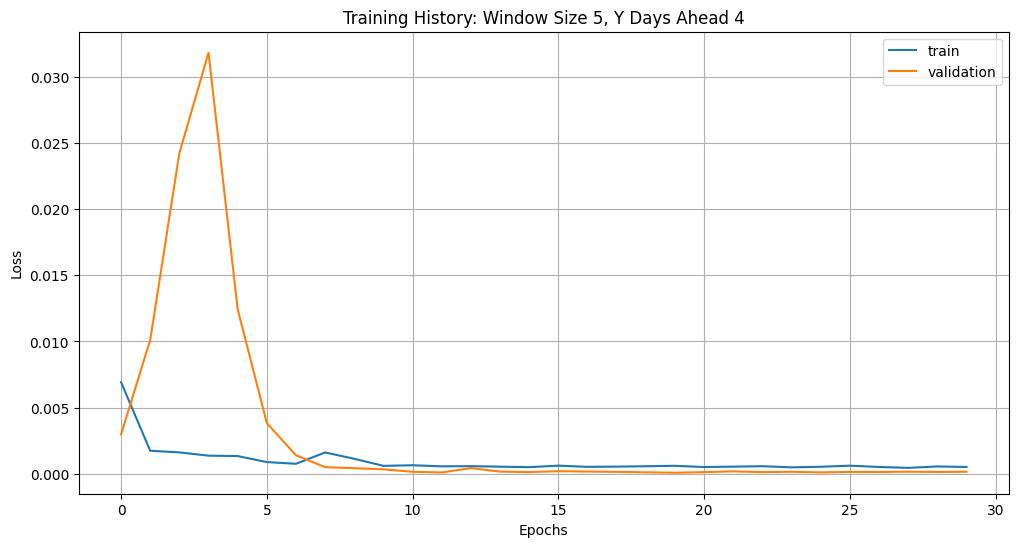

Iteration: 44, Window Size: 5, Y Days Ahead: 5
X shape: (3798, 5, 1)
y shape: (3798, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Mean Squared Error: 0.0008
Model saved to ./models_cnn/cnn_w5_d5.keras
Final epoch: 18


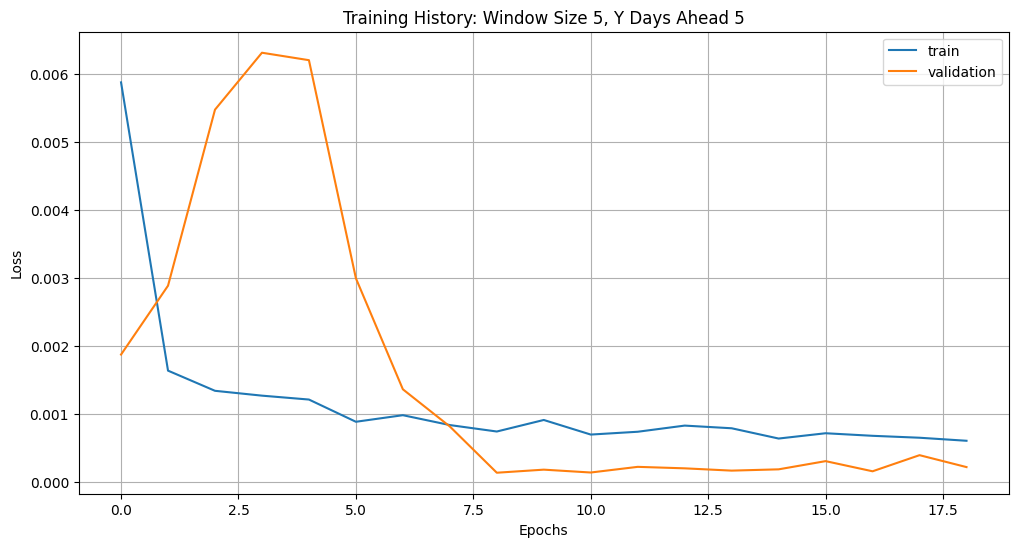

Iteration: 45, Window Size: 5, Y Days Ahead: 6
X shape: (3797, 5, 1)
y shape: (3797, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w5_d6.keras
Final epoch: 43


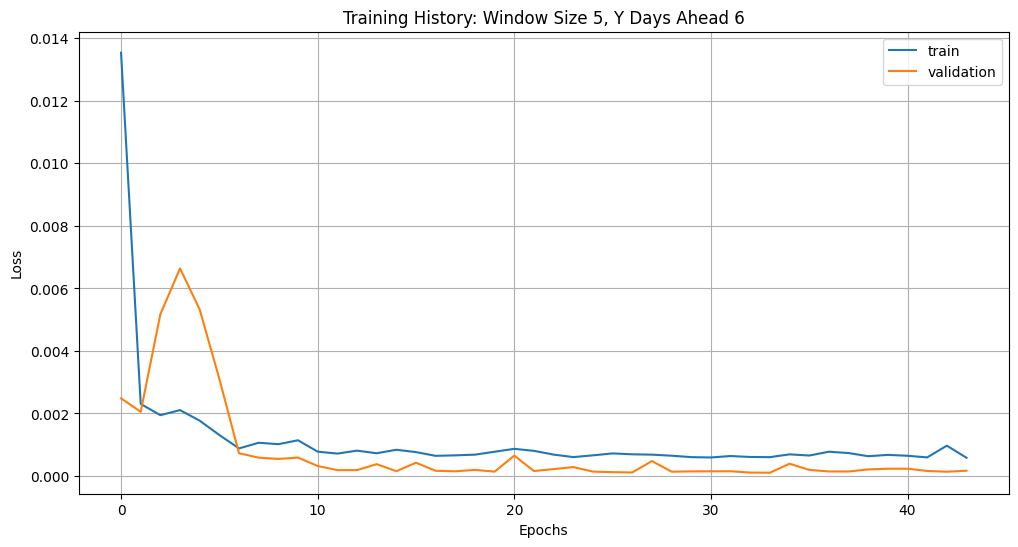

Iteration: 46, Window Size: 5, Y Days Ahead: 7
X shape: (3796, 5, 1)
y shape: (3796, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0011
Model saved to ./models_cnn/cnn_w5_d7.keras
Final epoch: 24


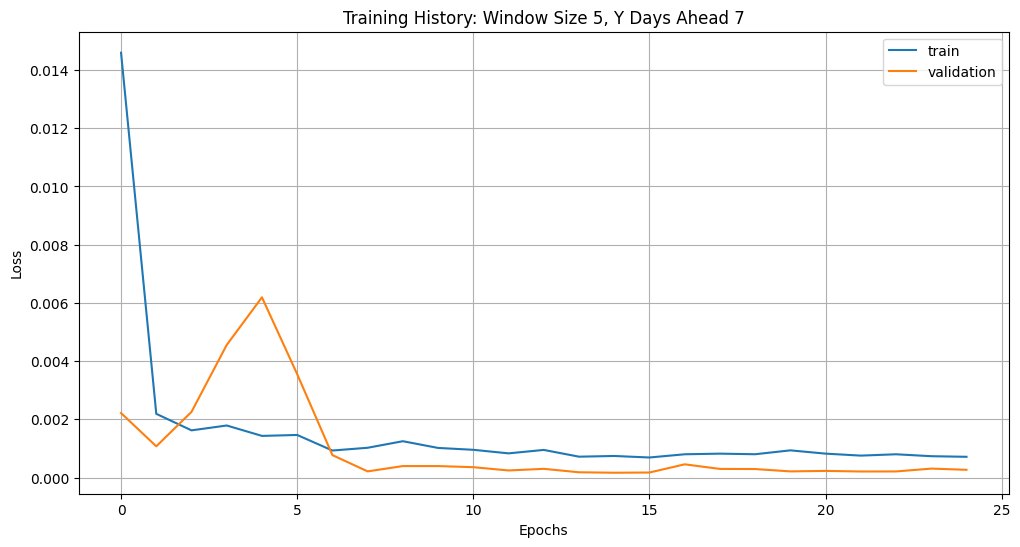

Iteration: 47, Window Size: 5, Y Days Ahead: 8
X shape: (3795, 5, 1)
y shape: (3795, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Mean Squared Error: 0.0012
Model saved to ./models_cnn/cnn_w5_d8.keras
Final epoch: 43


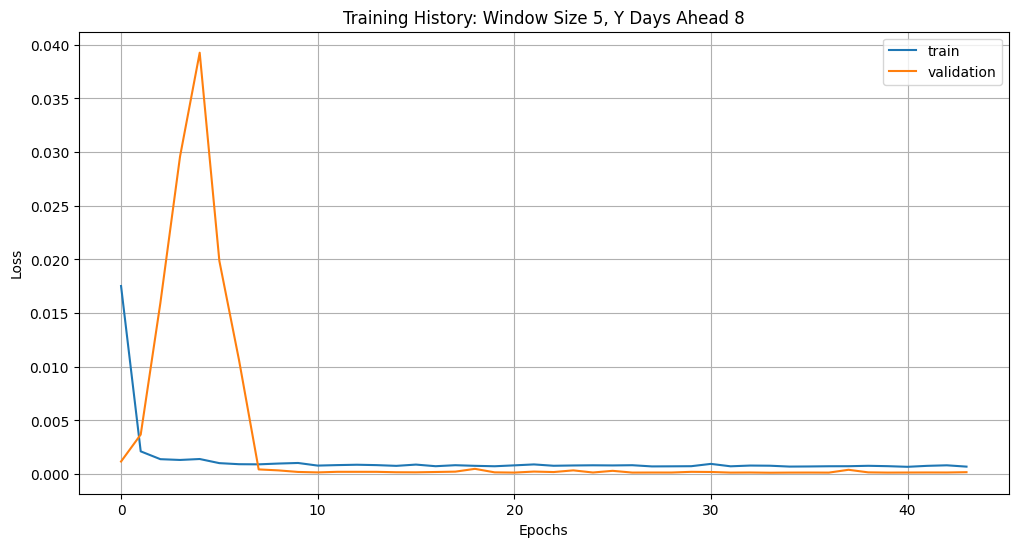

Iteration: 48, Window Size: 5, Y Days Ahead: 9
X shape: (3794, 5, 1)
y shape: (3794, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w5_d9.keras
Final epoch: 32


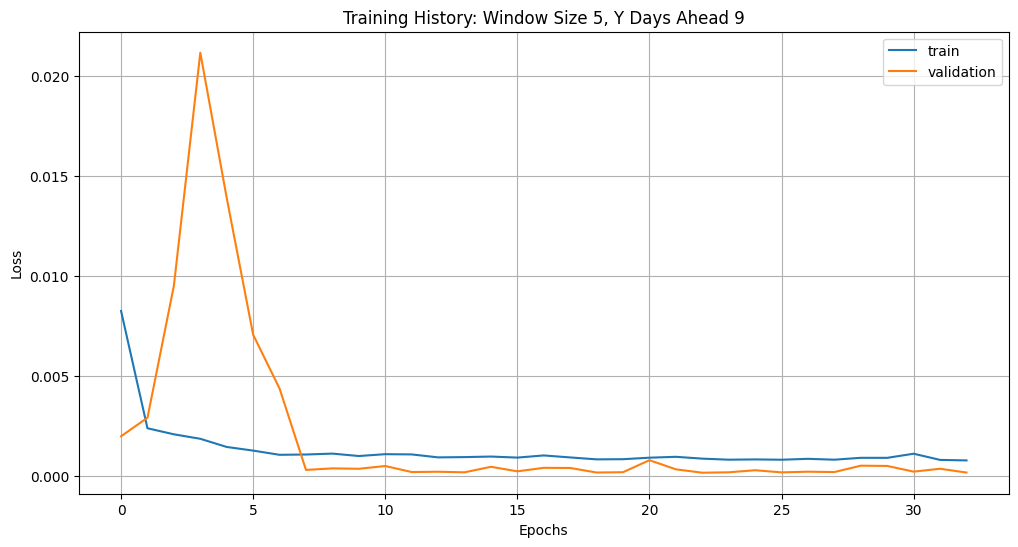

Iteration: 49, Window Size: 5, Y Days Ahead: 10
X shape: (3793, 5, 1)
y shape: (3793, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w5_d10.keras
Final epoch: 25


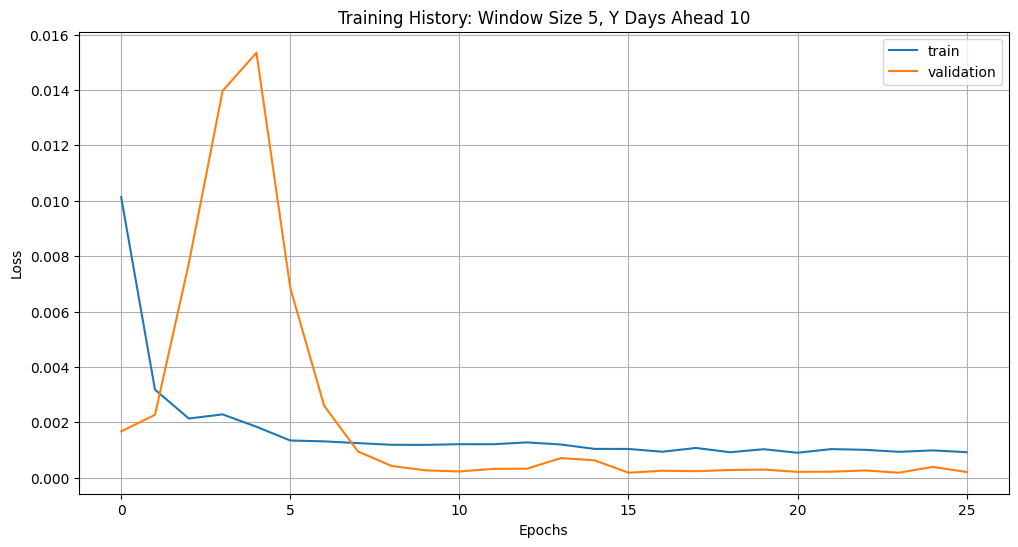

Iteration: 50, Window Size: 6, Y Days Ahead: 1
X shape: (3801, 6, 1)
y shape: (3801, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0004
Model saved to ./models_cnn/cnn_w6_d1.keras
Final epoch: 19


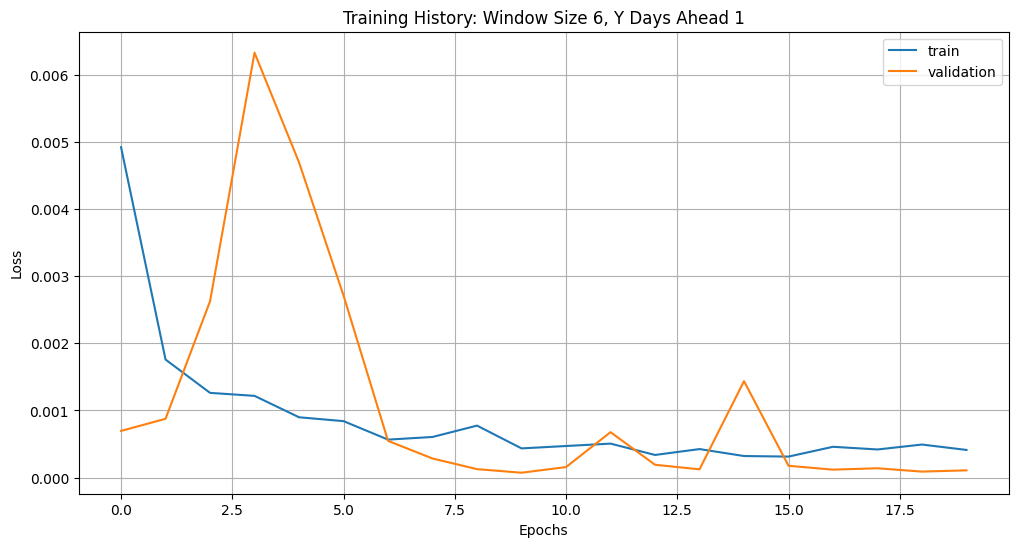

Iteration: 51, Window Size: 6, Y Days Ahead: 2
X shape: (3800, 6, 1)
y shape: (3800, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0006
Model saved to ./models_cnn/cnn_w6_d2.keras
Final epoch: 21


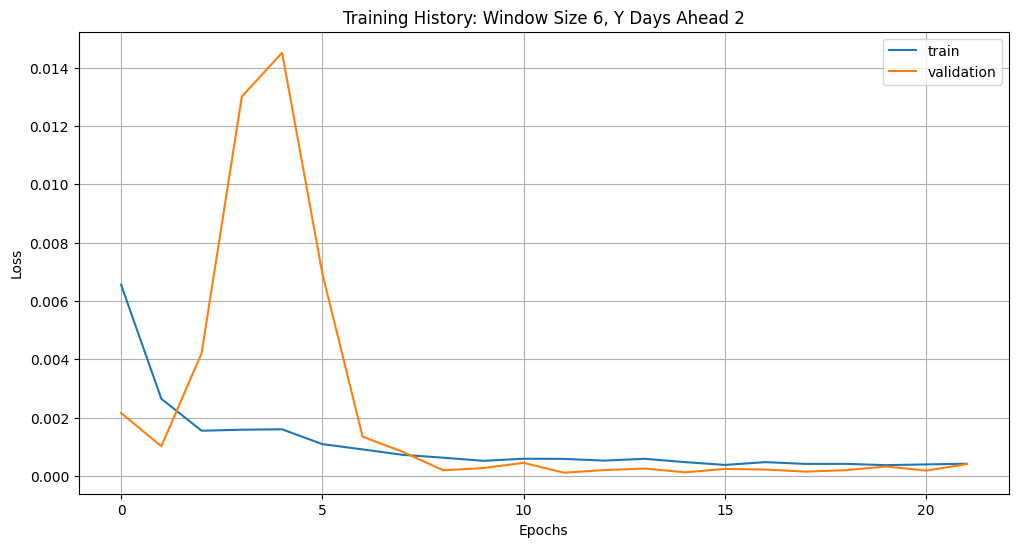

Iteration: 52, Window Size: 6, Y Days Ahead: 3
X shape: (3799, 6, 1)
y shape: (3799, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0006
Model saved to ./models_cnn/cnn_w6_d3.keras
Final epoch: 42


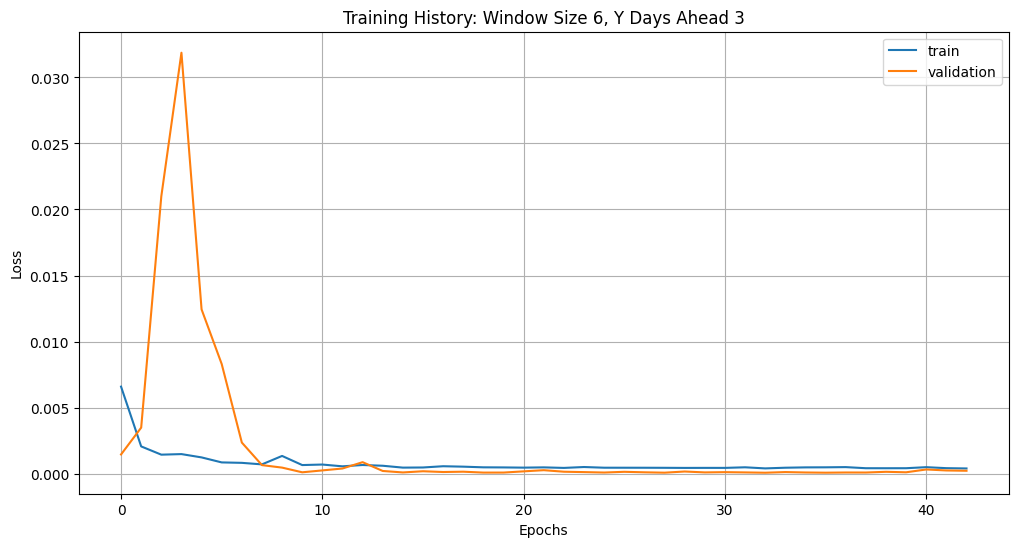

Iteration: 53, Window Size: 6, Y Days Ahead: 4
X shape: (3798, 6, 1)
y shape: (3798, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w6_d4.keras
Final epoch: 25


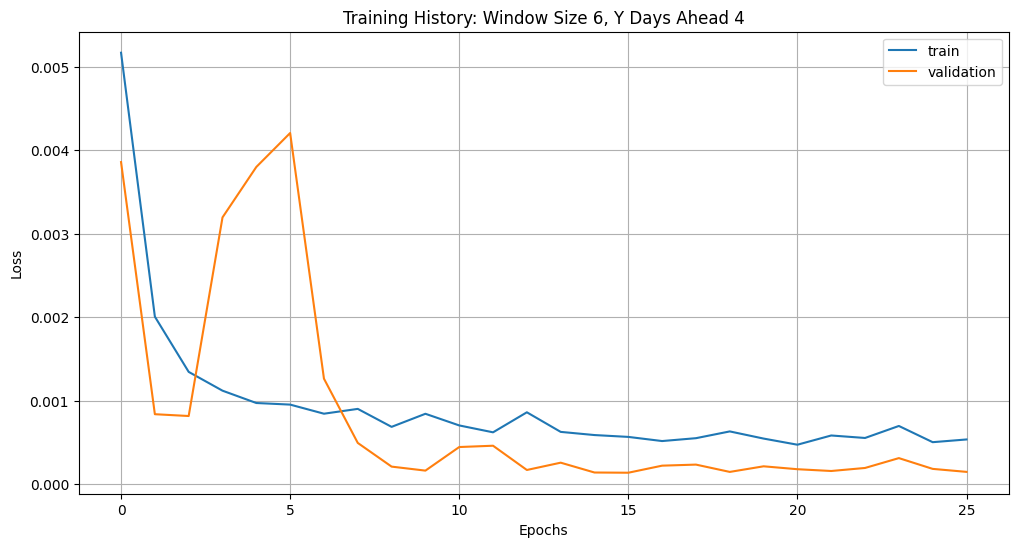

Iteration: 54, Window Size: 6, Y Days Ahead: 5
X shape: (3797, 6, 1)
y shape: (3797, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0008
Model saved to ./models_cnn/cnn_w6_d5.keras
Final epoch: 44


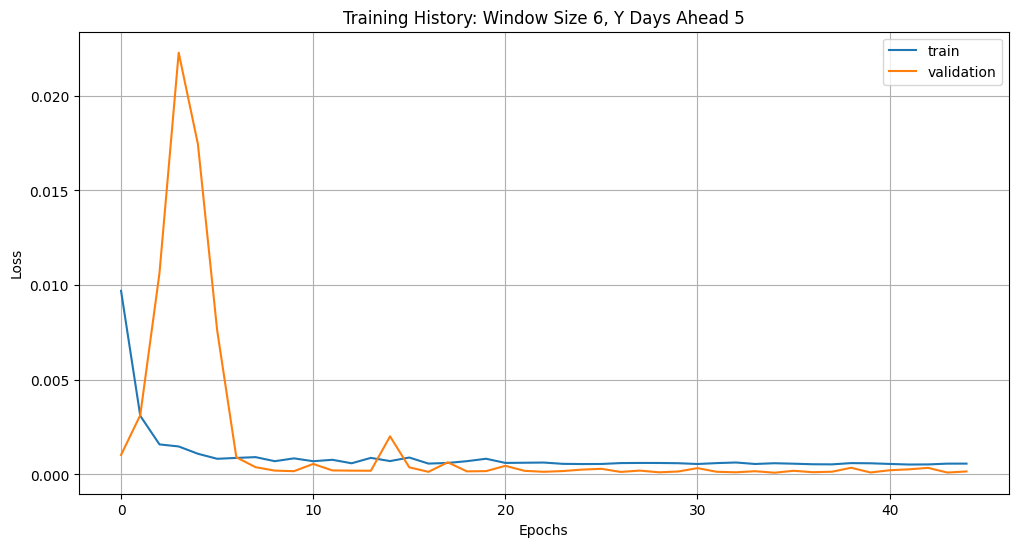

Iteration: 55, Window Size: 6, Y Days Ahead: 6
X shape: (3796, 6, 1)
y shape: (3796, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w6_d6.keras
Final epoch: 55


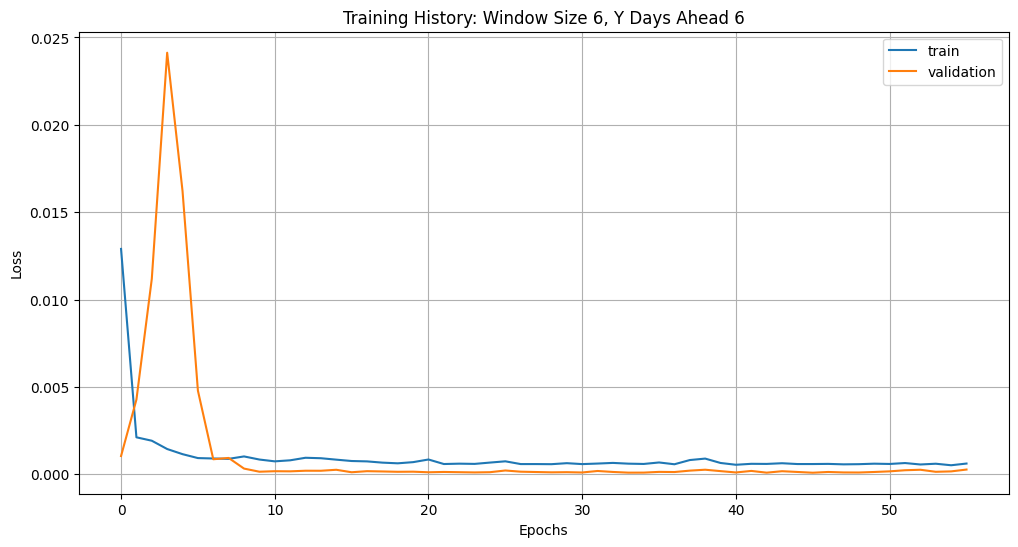

Iteration: 56, Window Size: 6, Y Days Ahead: 7
X shape: (3795, 6, 1)
y shape: (3795, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0010
Model saved to ./models_cnn/cnn_w6_d7.keras
Final epoch: 43


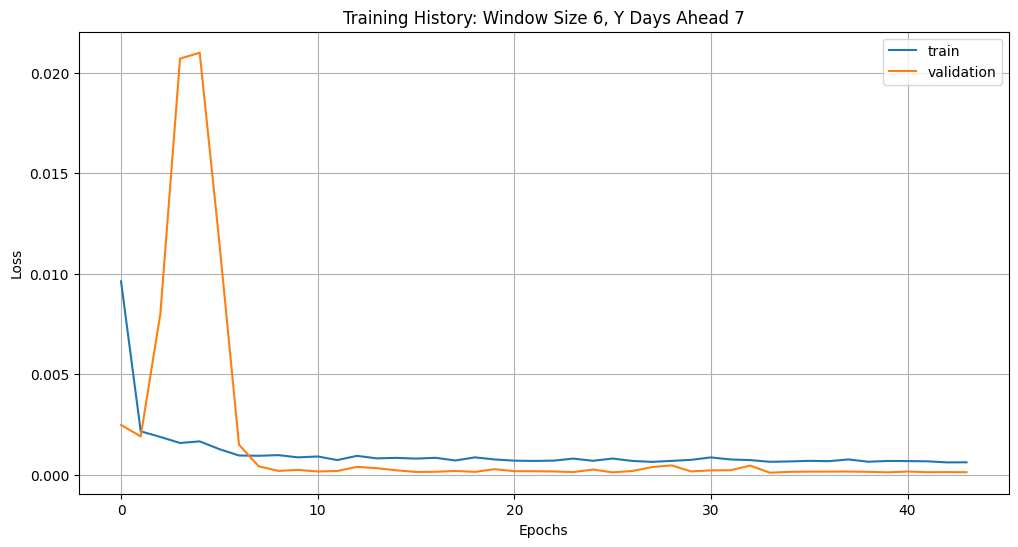

Iteration: 57, Window Size: 6, Y Days Ahead: 8
X shape: (3794, 6, 1)
y shape: (3794, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0011
Model saved to ./models_cnn/cnn_w6_d8.keras
Final epoch: 39


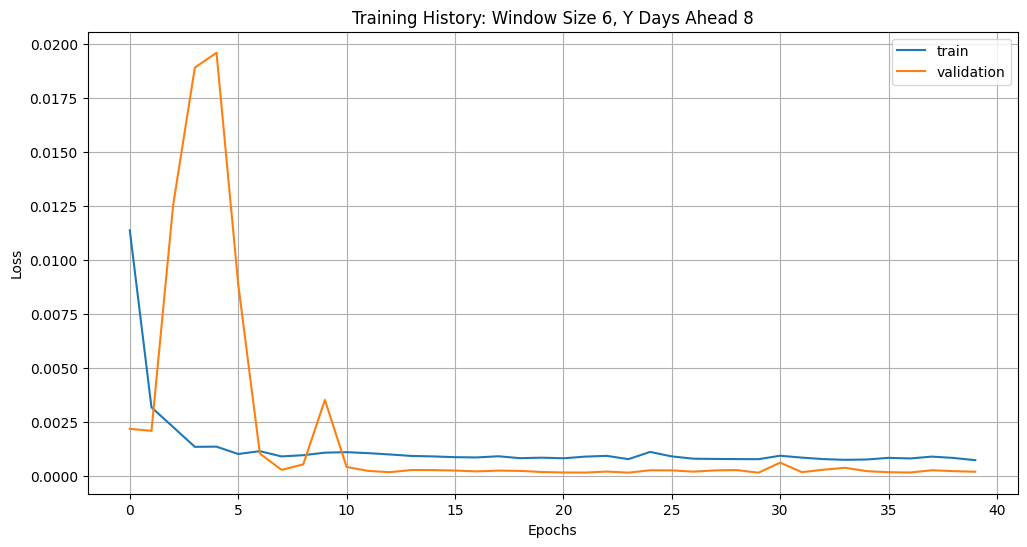

Iteration: 58, Window Size: 6, Y Days Ahead: 9
X shape: (3793, 6, 1)
y shape: (3793, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w6_d9.keras
Final epoch: 37


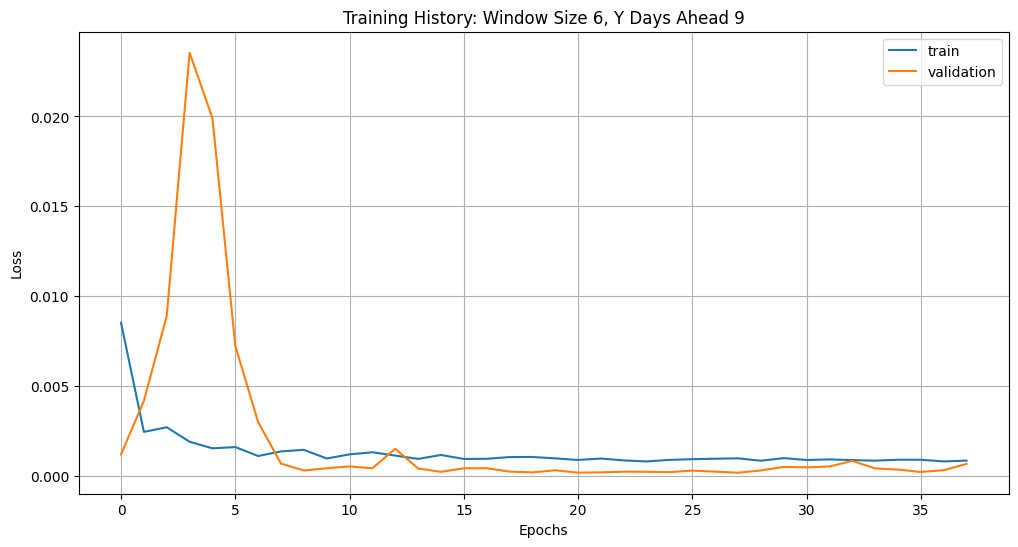

Iteration: 59, Window Size: 6, Y Days Ahead: 10
X shape: (3792, 6, 1)
y shape: (3792, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0014
Model saved to ./models_cnn/cnn_w6_d10.keras
Final epoch: 38


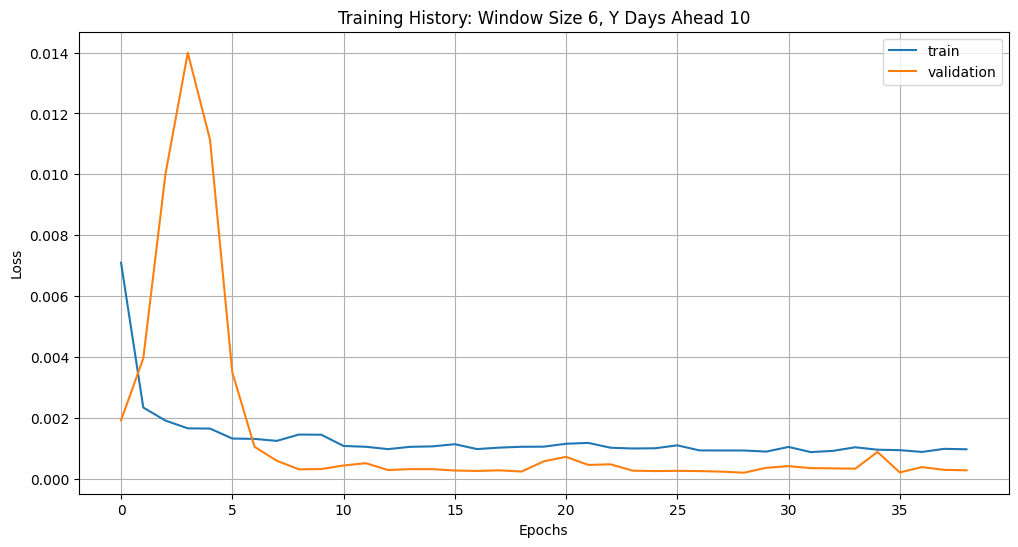

Iteration: 60, Window Size: 7, Y Days Ahead: 1
X shape: (3800, 7, 1)
y shape: (3800, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0004
Model saved to ./models_cnn/cnn_w7_d1.keras
Final epoch: 34


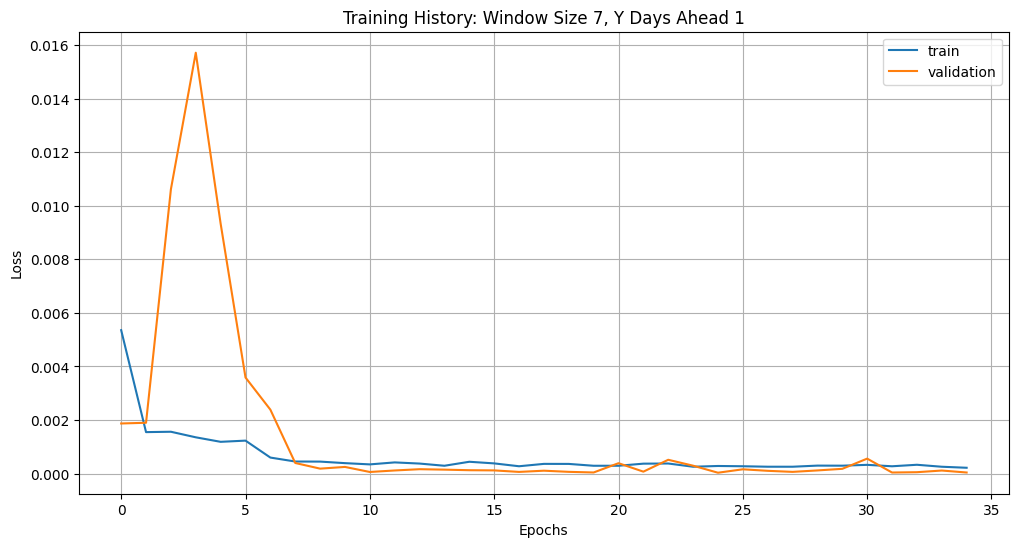

Iteration: 61, Window Size: 7, Y Days Ahead: 2
X shape: (3799, 7, 1)
y shape: (3799, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0006
Model saved to ./models_cnn/cnn_w7_d2.keras
Final epoch: 26


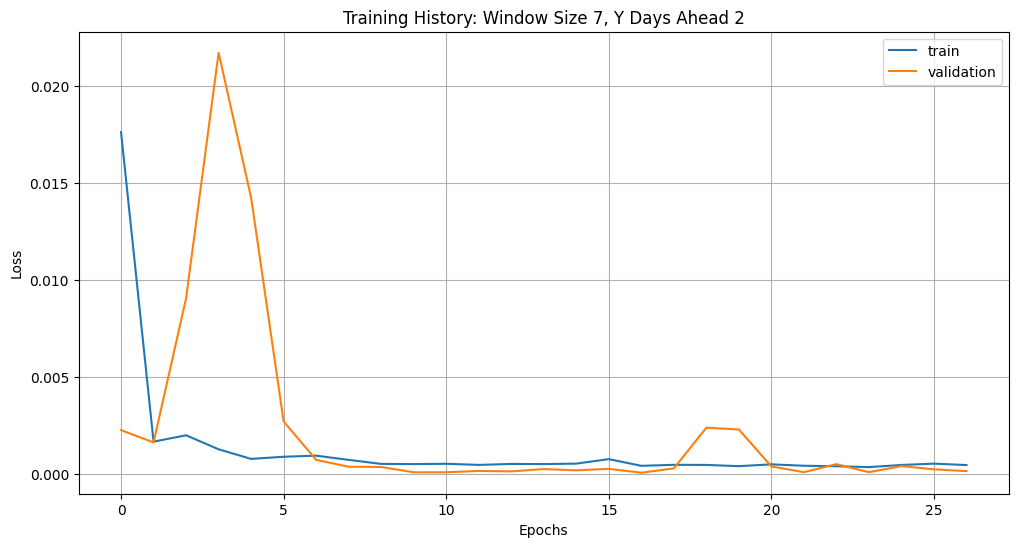

Iteration: 62, Window Size: 7, Y Days Ahead: 3
X shape: (3798, 7, 1)
y shape: (3798, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0008
Model saved to ./models_cnn/cnn_w7_d3.keras
Final epoch: 31


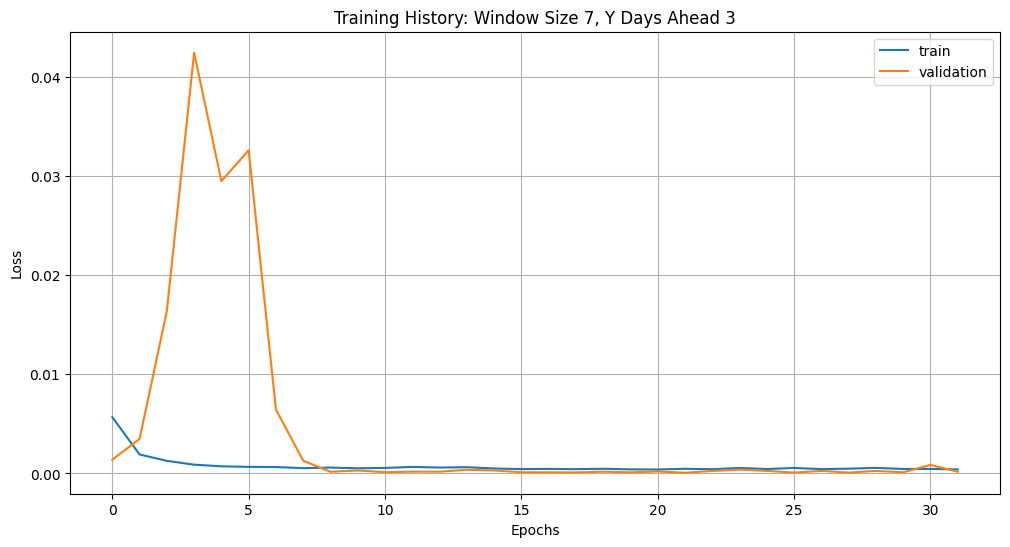

Iteration: 63, Window Size: 7, Y Days Ahead: 4
X shape: (3797, 7, 1)
y shape: (3797, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w7_d4.keras
Final epoch: 26


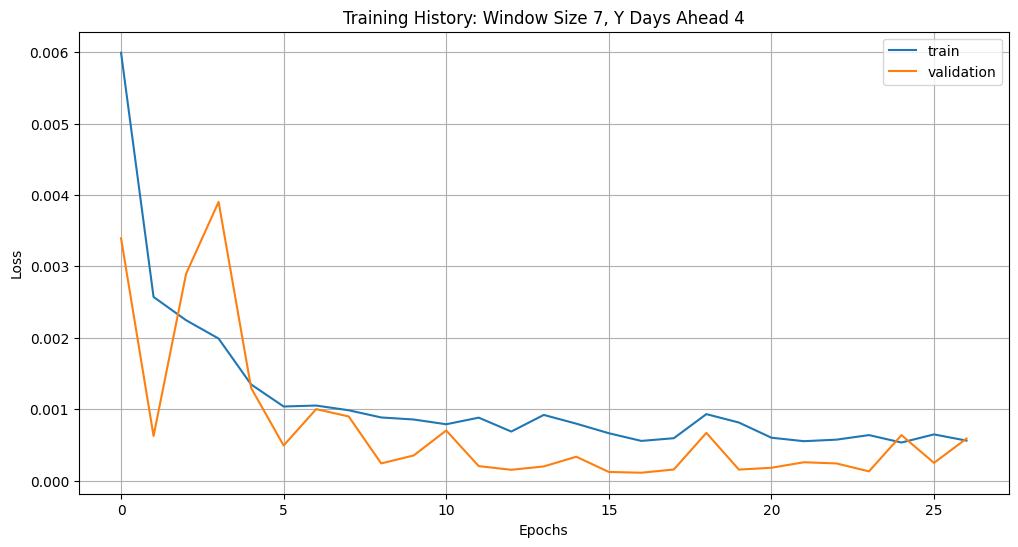

Iteration: 64, Window Size: 7, Y Days Ahead: 5
X shape: (3796, 7, 1)
y shape: (3796, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w7_d5.keras
Final epoch: 28


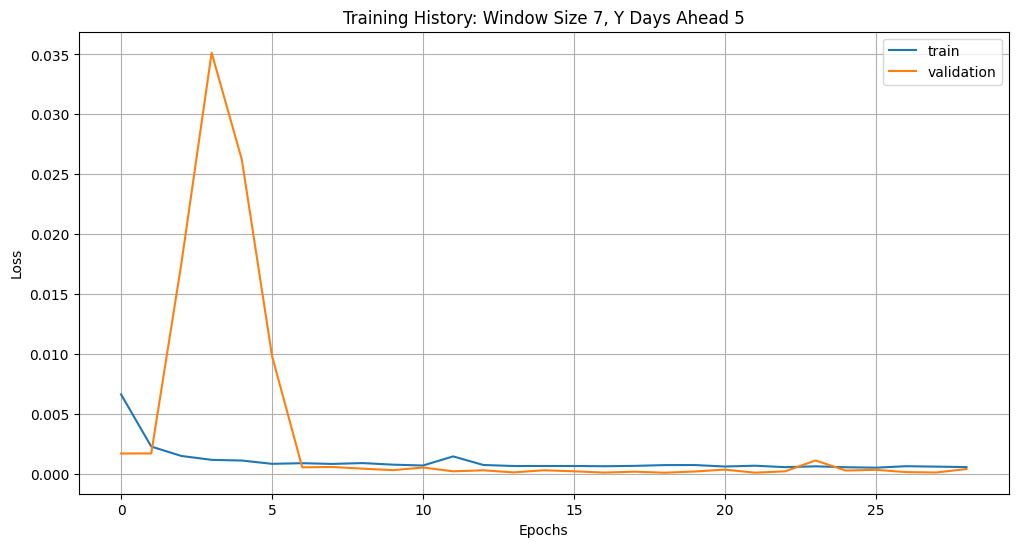

Iteration: 65, Window Size: 7, Y Days Ahead: 6
X shape: (3795, 7, 1)
y shape: (3795, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w7_d6.keras
Final epoch: 30


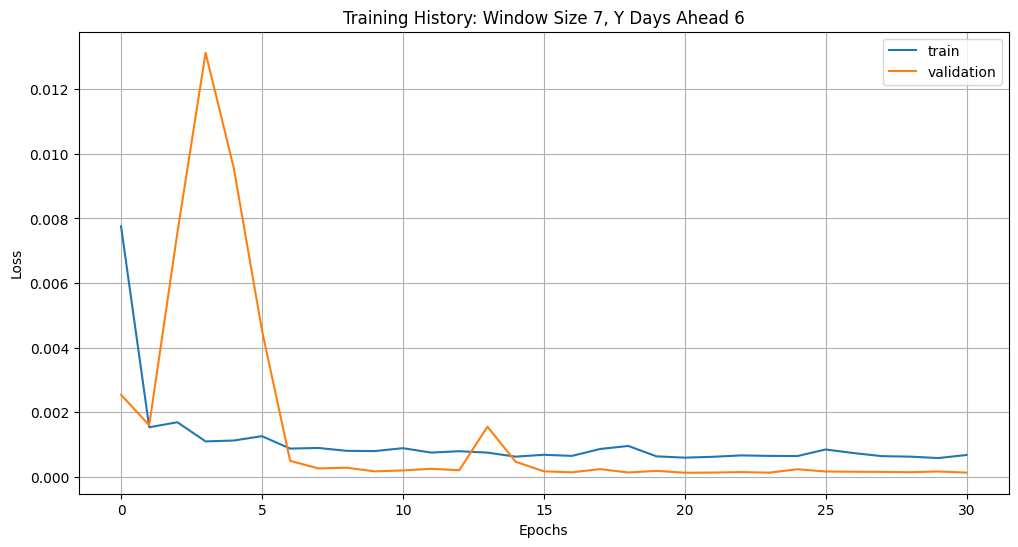

Iteration: 66, Window Size: 7, Y Days Ahead: 7
X shape: (3794, 7, 1)
y shape: (3794, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0011
Model saved to ./models_cnn/cnn_w7_d7.keras
Final epoch: 24


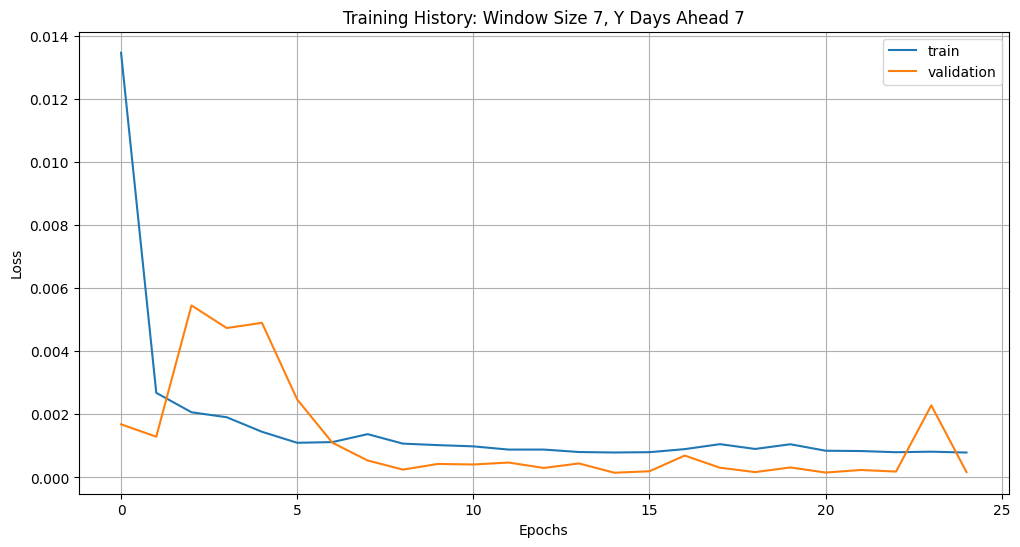

Iteration: 67, Window Size: 7, Y Days Ahead: 8
X shape: (3793, 7, 1)
y shape: (3793, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0011
Model saved to ./models_cnn/cnn_w7_d8.keras
Final epoch: 40


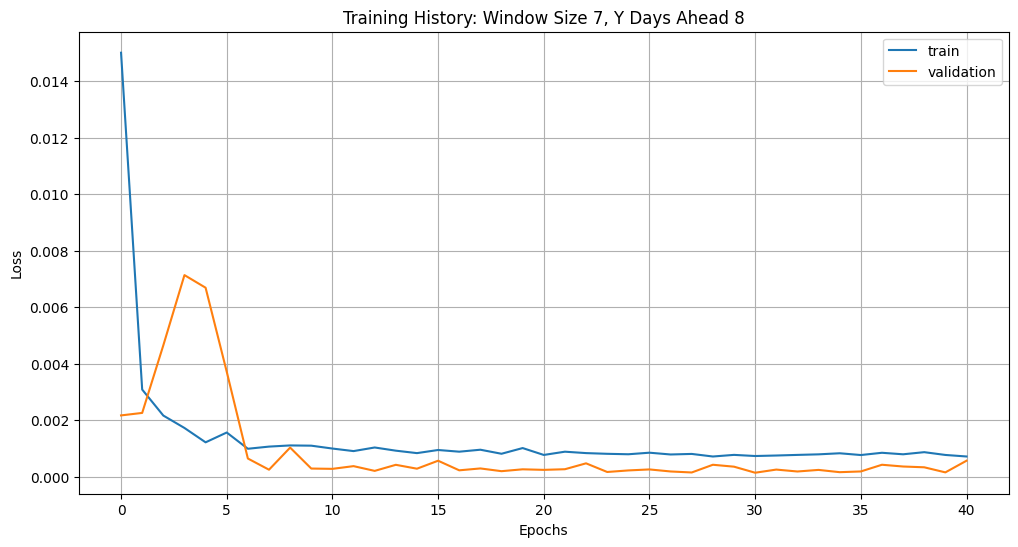

Iteration: 68, Window Size: 7, Y Days Ahead: 9
X shape: (3792, 7, 1)
y shape: (3792, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0014
Model saved to ./models_cnn/cnn_w7_d9.keras
Final epoch: 17


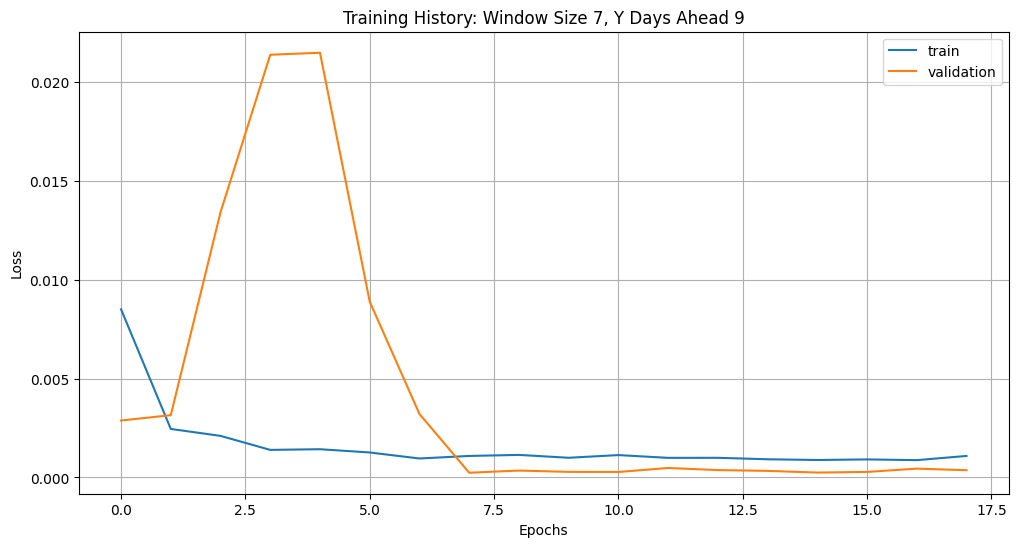

Iteration: 69, Window Size: 7, Y Days Ahead: 10
X shape: (3791, 7, 1)
y shape: (3791, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w7_d10.keras
Final epoch: 42


Iteration: 70, Window Size: 8, Y Days Ahead: 1
X shape: (3799, 8, 1)
y shape: (3799, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0004
Model saved to ./models_cnn/cnn_w8_d1.keras
Final epoch: 29


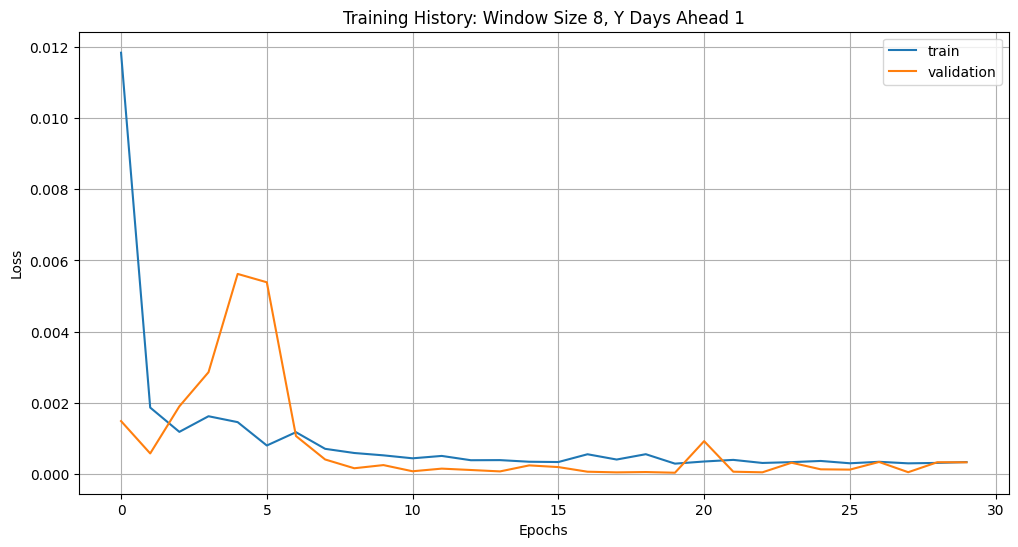

Iteration: 71, Window Size: 8, Y Days Ahead: 2
X shape: (3798, 8, 1)
y shape: (3798, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0005
Model saved to ./models_cnn/cnn_w8_d2.keras
Final epoch: 21


Iteration: 72, Window Size: 8, Y Days Ahead: 3
X shape: (3797, 8, 1)
y shape: (3797, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w8_d3.keras
Final epoch: 23


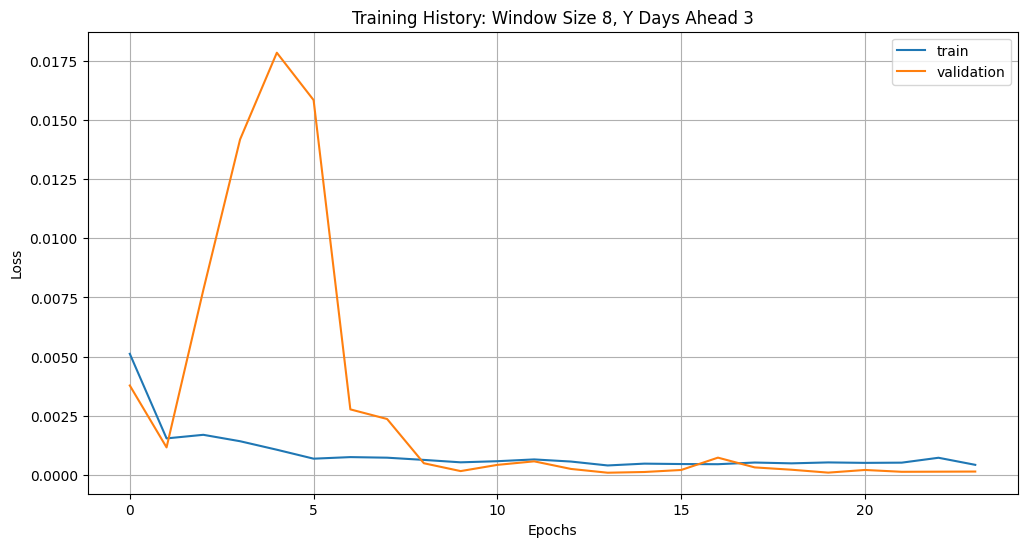

Iteration: 73, Window Size: 8, Y Days Ahead: 4
X shape: (3796, 8, 1)
y shape: (3796, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w8_d4.keras
Final epoch: 43


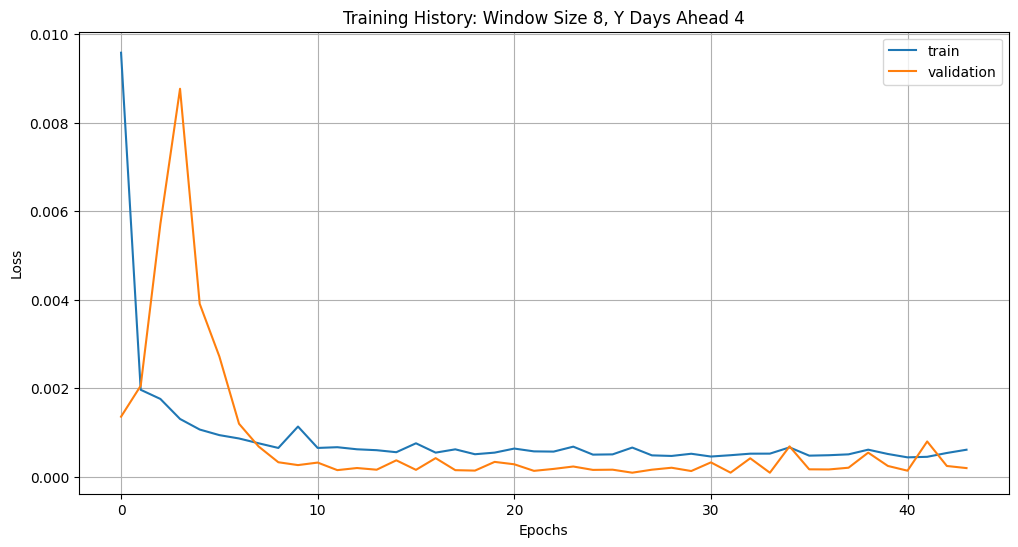

Iteration: 74, Window Size: 8, Y Days Ahead: 5
X shape: (3795, 8, 1)
y shape: (3795, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0008
Model saved to ./models_cnn/cnn_w8_d5.keras
Final epoch: 22


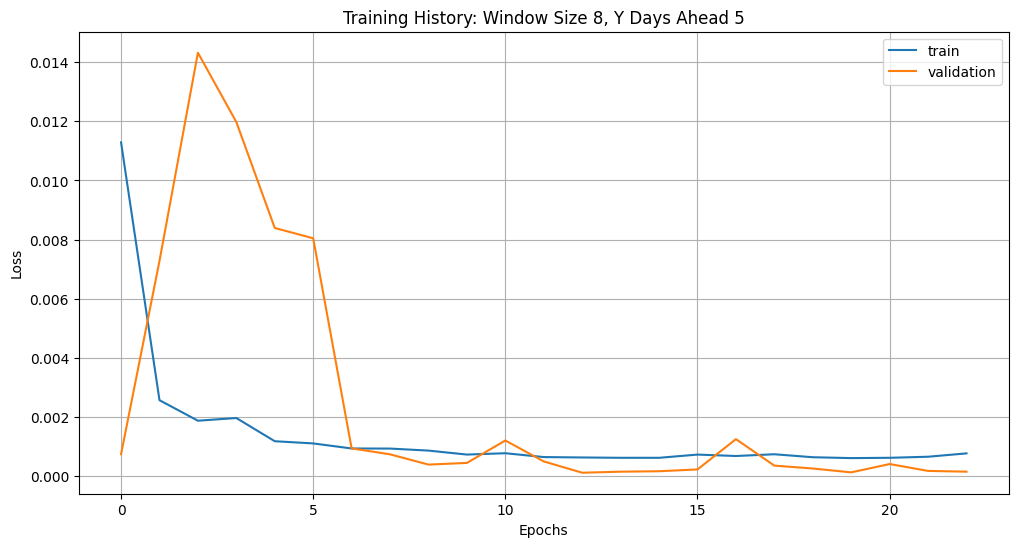

Iteration: 75, Window Size: 8, Y Days Ahead: 6
X shape: (3794, 8, 1)
y shape: (3794, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mean Squared Error: 0.0010
Model saved to ./models_cnn/cnn_w8_d6.keras
Final epoch: 43


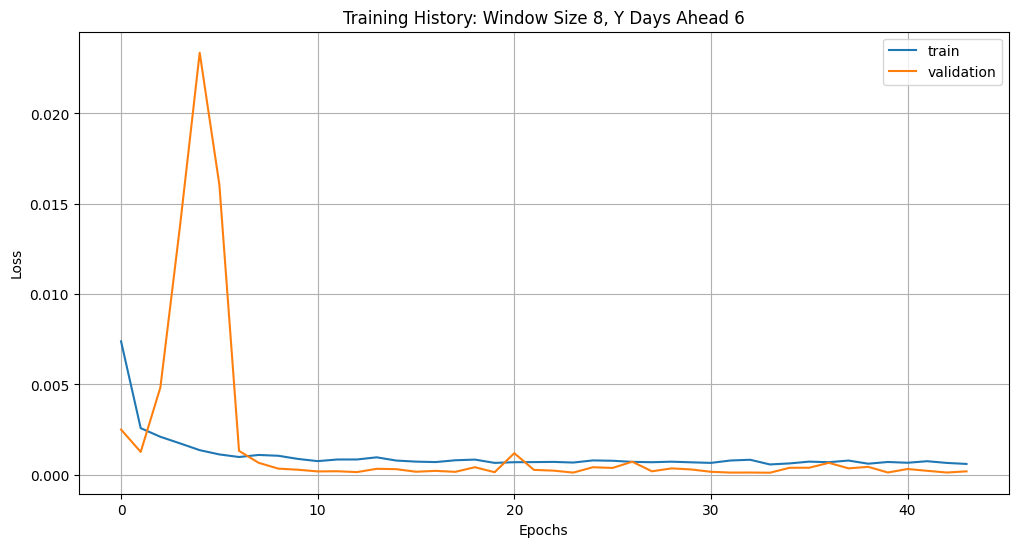

Iteration: 76, Window Size: 8, Y Days Ahead: 7
X shape: (3793, 8, 1)
y shape: (3793, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0011
Model saved to ./models_cnn/cnn_w8_d7.keras
Final epoch: 37


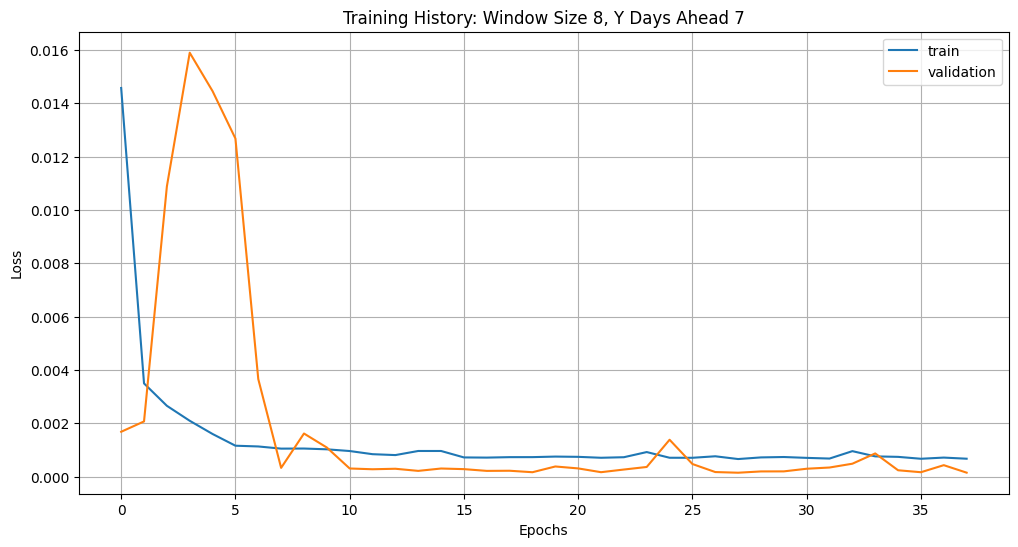

Iteration: 77, Window Size: 8, Y Days Ahead: 8
X shape: (3792, 8, 1)
y shape: (3792, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Squared Error: 0.0012
Model saved to ./models_cnn/cnn_w8_d8.keras
Final epoch: 35


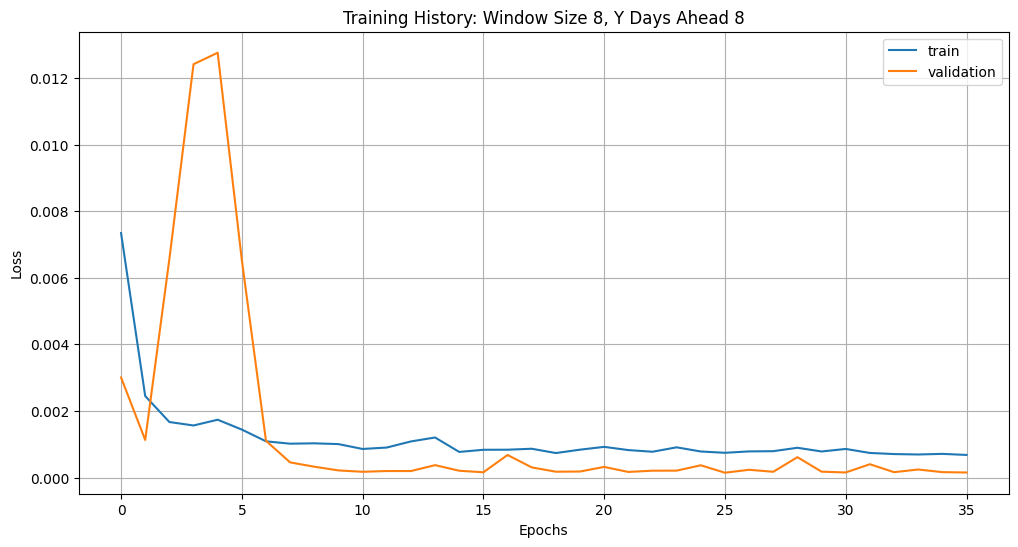

Iteration: 78, Window Size: 8, Y Days Ahead: 9
X shape: (3791, 8, 1)
y shape: (3791, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w8_d9.keras
Final epoch: 50


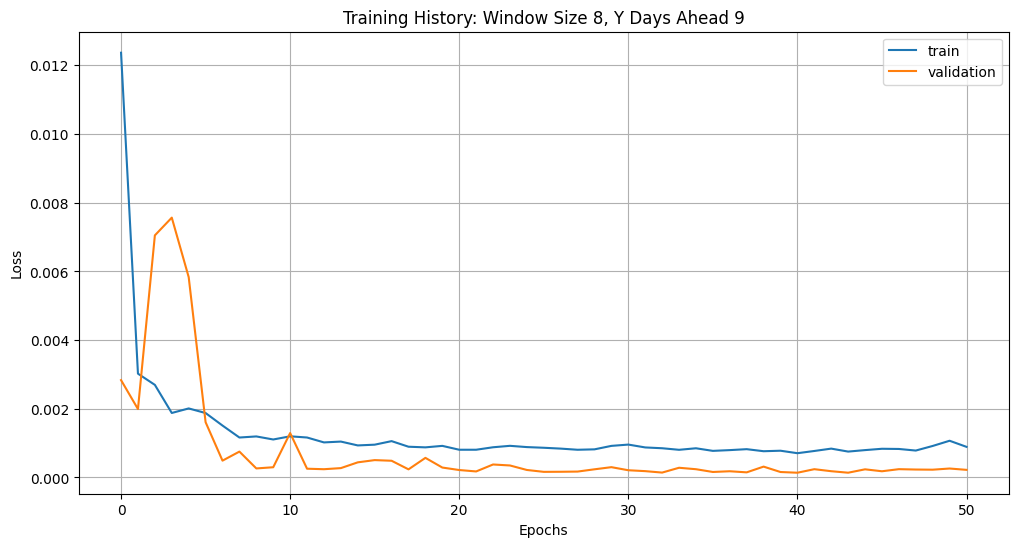

Iteration: 79, Window Size: 8, Y Days Ahead: 10
X shape: (3790, 8, 1)
y shape: (3790, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0014
Model saved to ./models_cnn/cnn_w8_d10.keras
Final epoch: 28


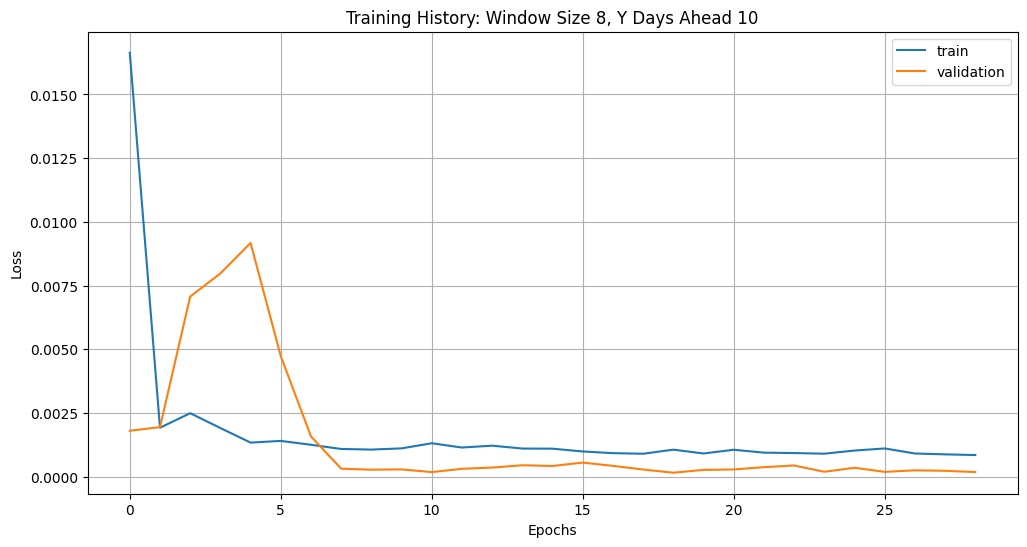

Iteration: 80, Window Size: 9, Y Days Ahead: 1
X shape: (3798, 9, 1)
y shape: (3798, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w9_d1.keras
Final epoch: 25


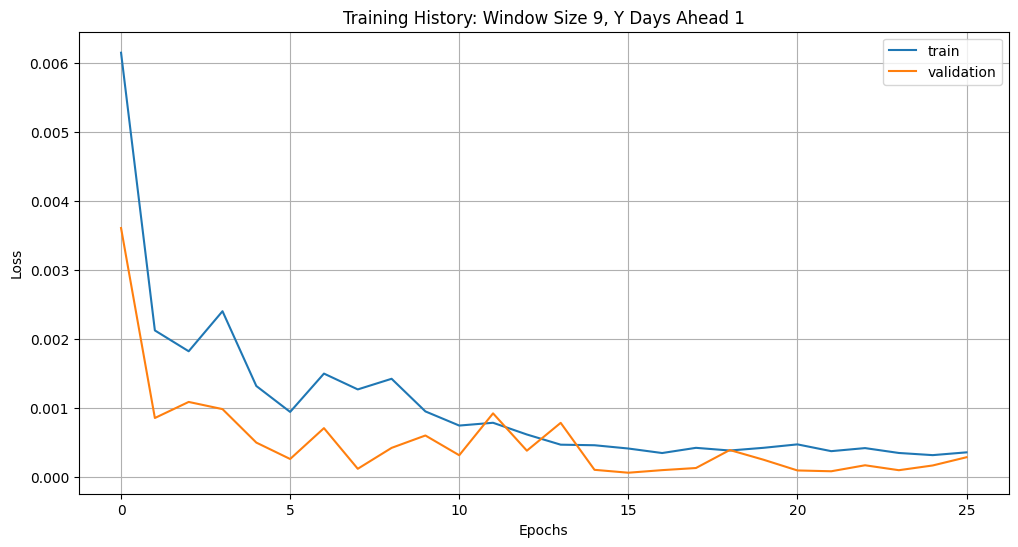

Iteration: 81, Window Size: 9, Y Days Ahead: 2
X shape: (3797, 9, 1)
y shape: (3797, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0006
Model saved to ./models_cnn/cnn_w9_d2.keras
Final epoch: 23


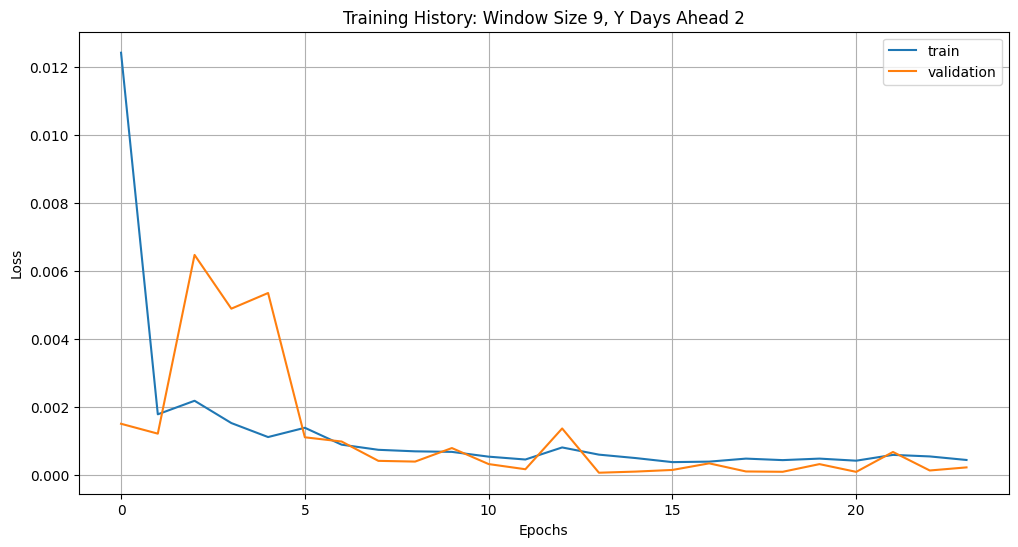

Iteration: 82, Window Size: 9, Y Days Ahead: 3
X shape: (3796, 9, 1)
y shape: (3796, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0006
Model saved to ./models_cnn/cnn_w9_d3.keras
Final epoch: 28


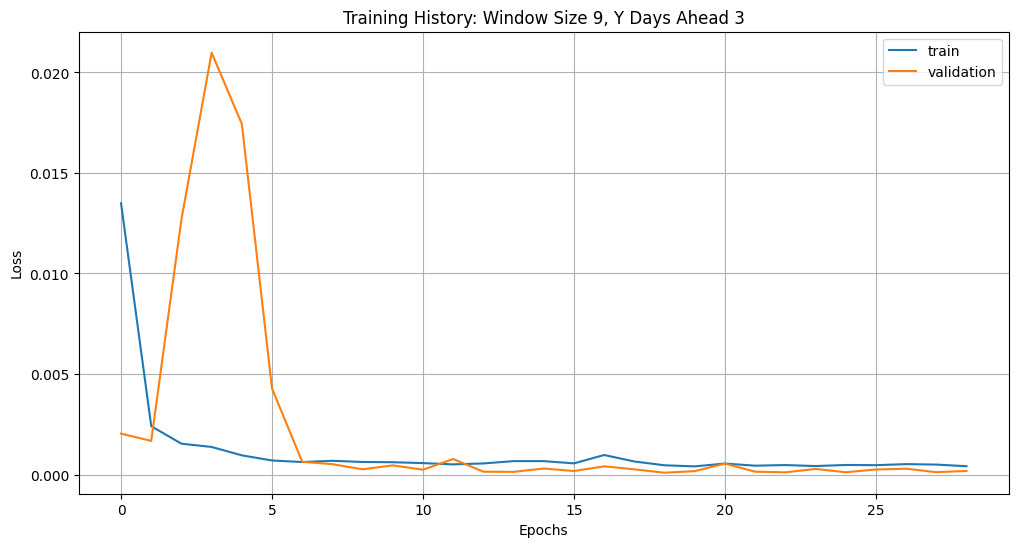

Iteration: 83, Window Size: 9, Y Days Ahead: 4
X shape: (3795, 9, 1)
y shape: (3795, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0007
Model saved to ./models_cnn/cnn_w9_d4.keras
Final epoch: 46


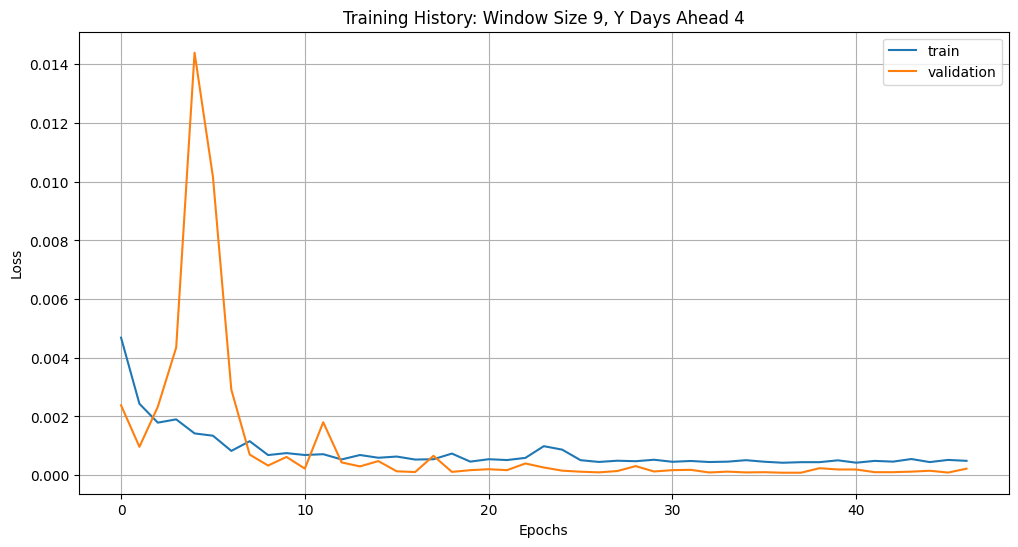

Iteration: 84, Window Size: 9, Y Days Ahead: 5
X shape: (3794, 9, 1)
y shape: (3794, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w9_d5.keras
Final epoch: 74


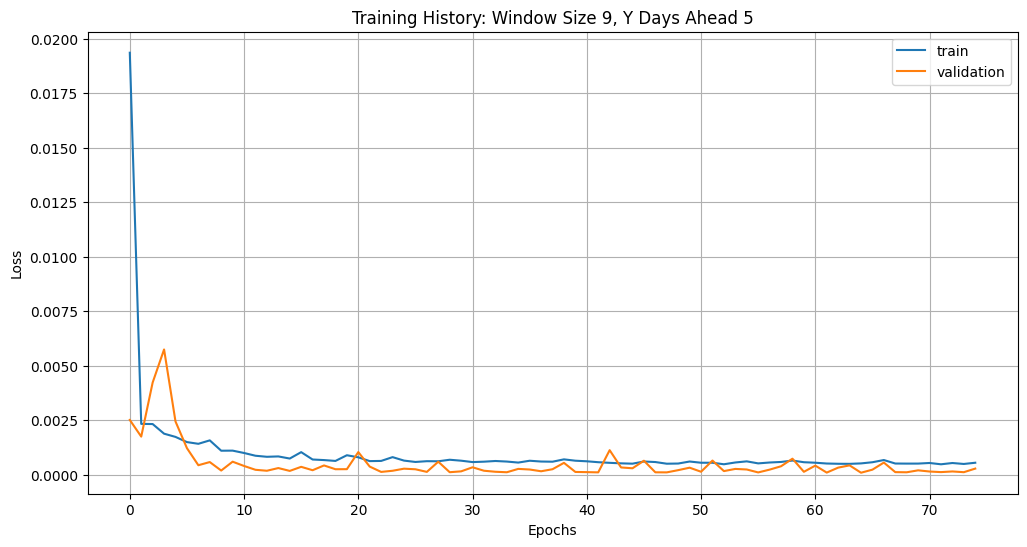

Iteration: 85, Window Size: 9, Y Days Ahead: 6
X shape: (3793, 9, 1)
y shape: (3793, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w9_d6.keras
Final epoch: 46


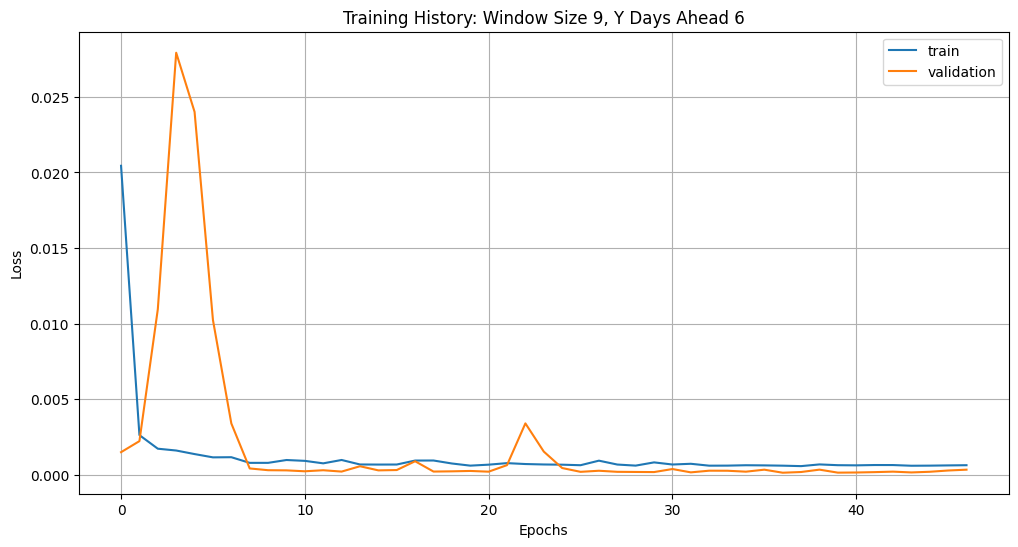

Iteration: 86, Window Size: 9, Y Days Ahead: 7
X shape: (3792, 9, 1)
y shape: (3792, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w9_d7.keras
Final epoch: 36


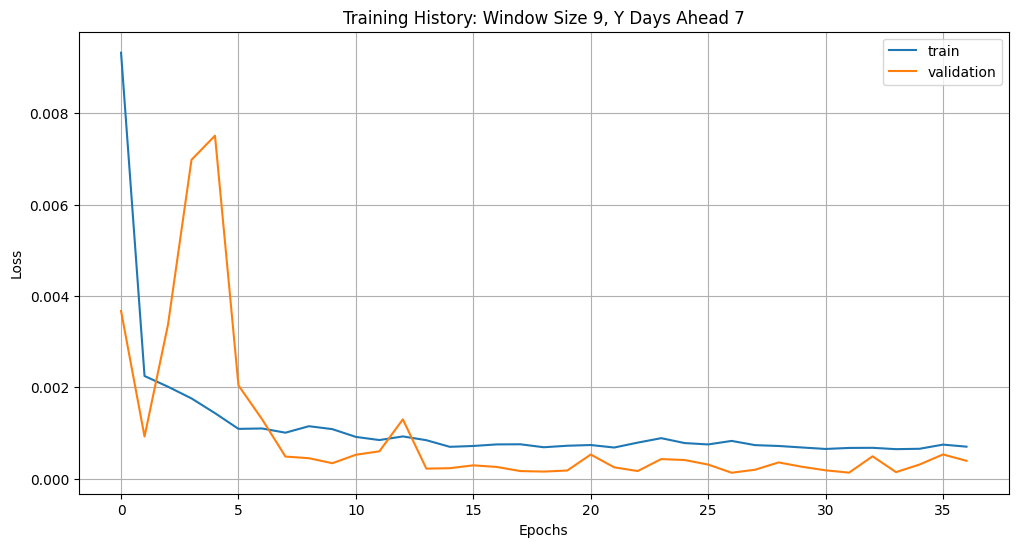

Iteration: 87, Window Size: 9, Y Days Ahead: 8
X shape: (3791, 9, 1)
y shape: (3791, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Mean Squared Error: 0.0012
Model saved to ./models_cnn/cnn_w9_d8.keras
Final epoch: 24


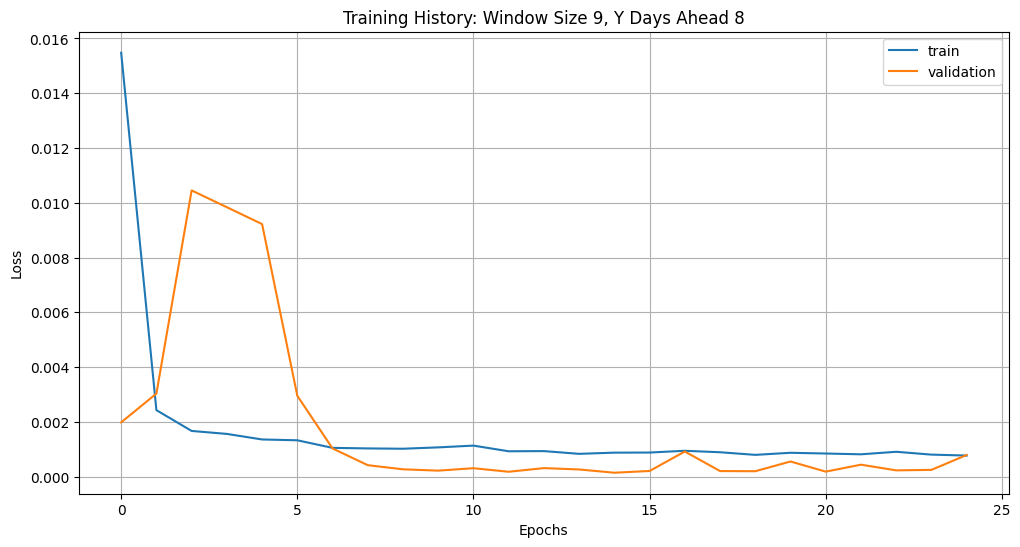

Iteration: 88, Window Size: 9, Y Days Ahead: 9
X shape: (3790, 9, 1)
y shape: (3790, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0014
Model saved to ./models_cnn/cnn_w9_d9.keras
Final epoch: 41


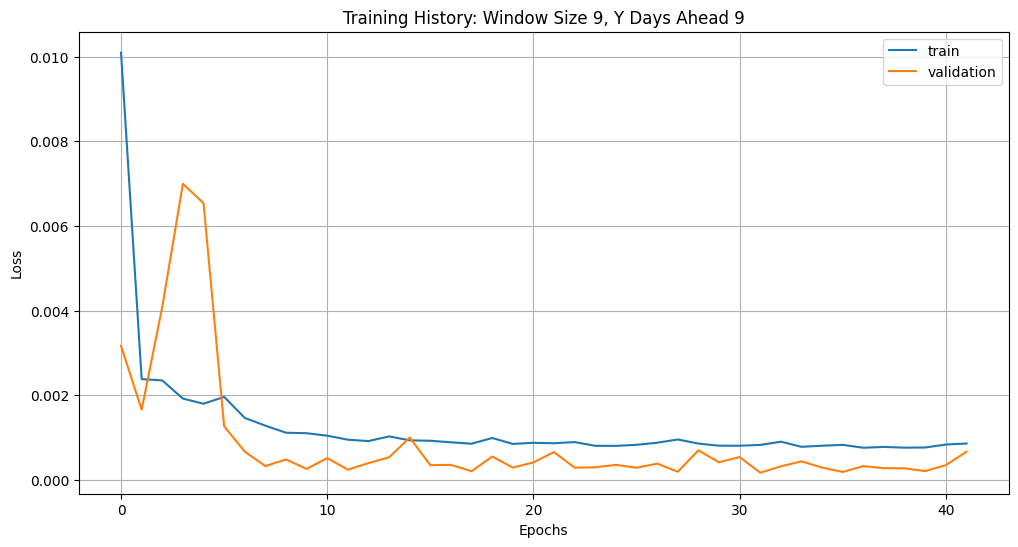

Iteration: 89, Window Size: 9, Y Days Ahead: 10
X shape: (3789, 9, 1)
y shape: (3789, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w9_d10.keras
Final epoch: 61


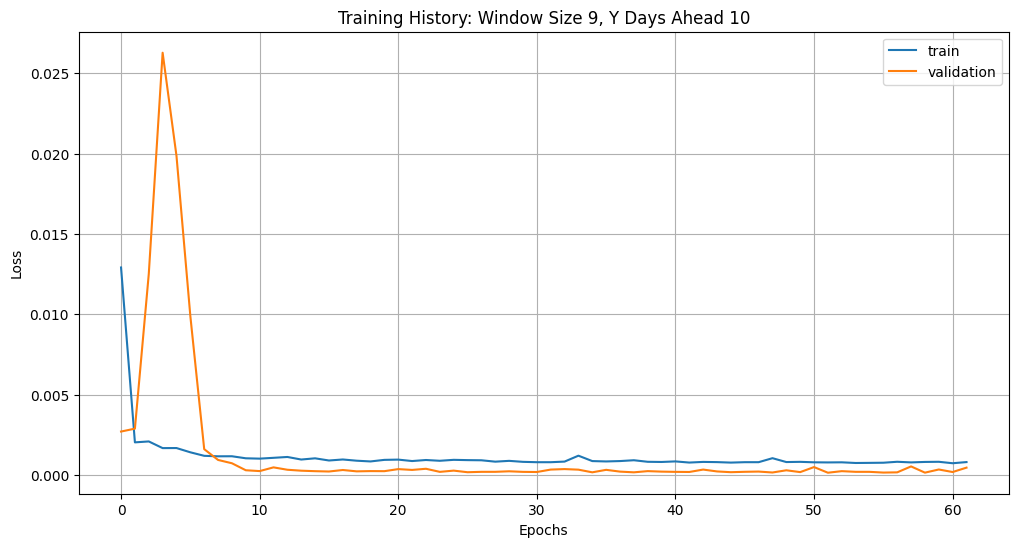

Iteration: 90, Window Size: 10, Y Days Ahead: 1
X shape: (3797, 10, 1)
y shape: (3797, 1)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Mean Squared Error: 0.0005
Model saved to ./models_cnn/cnn_w10_d1.keras
Final epoch: 25


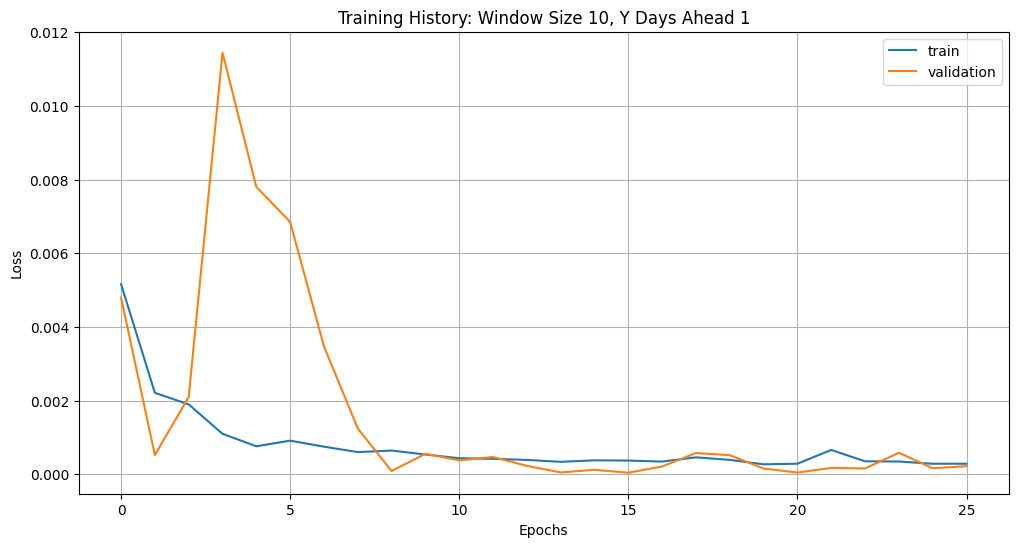

Iteration: 91, Window Size: 10, Y Days Ahead: 2
X shape: (3796, 10, 1)
y shape: (3796, 2)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Squared Error: 0.0005
Model saved to ./models_cnn/cnn_w10_d2.keras
Final epoch: 28


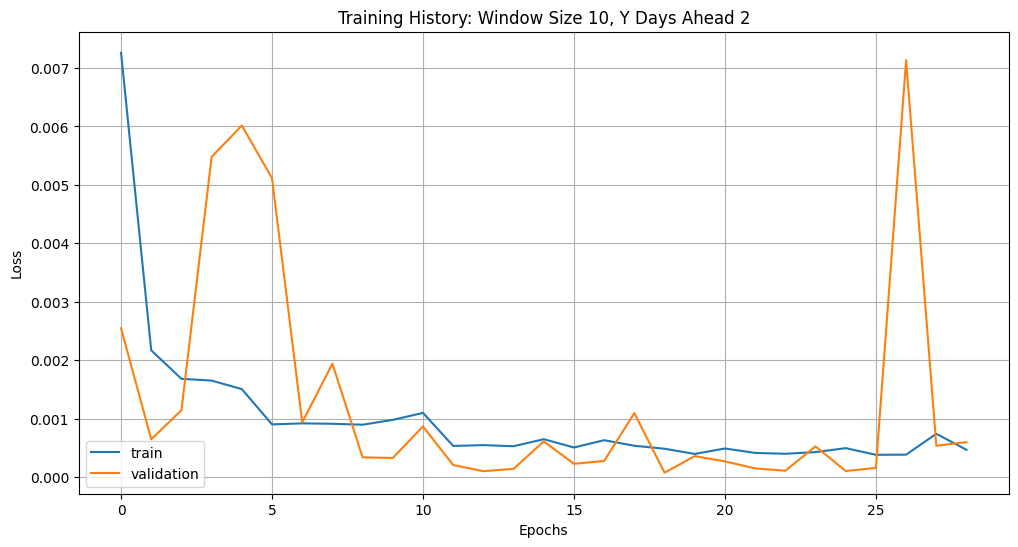

Iteration: 92, Window Size: 10, Y Days Ahead: 3
X shape: (3795, 10, 1)
y shape: (3795, 3)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Mean Squared Error: 0.0006
Model saved to ./models_cnn/cnn_w10_d3.keras
Final epoch: 24


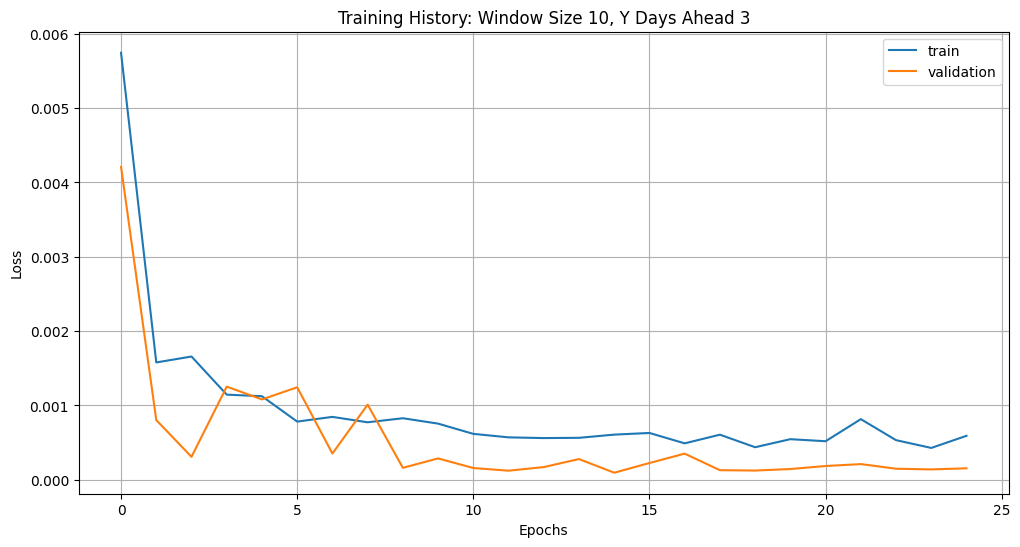

Iteration: 93, Window Size: 10, Y Days Ahead: 4
X shape: (3794, 10, 1)
y shape: (3794, 4)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Mean Squared Error: 0.0008
Model saved to ./models_cnn/cnn_w10_d4.keras
Final epoch: 33


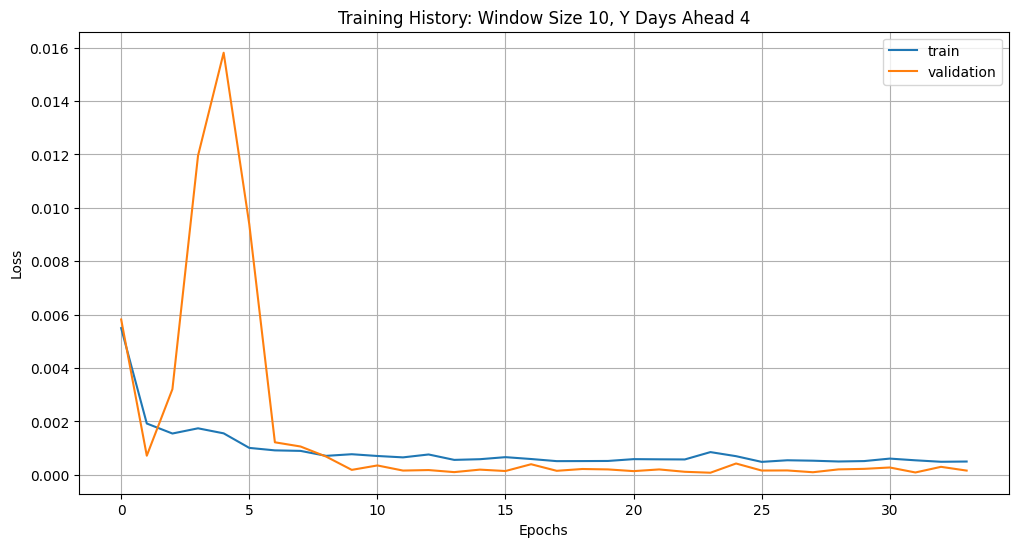

Iteration: 94, Window Size: 10, Y Days Ahead: 5
X shape: (3793, 10, 1)
y shape: (3793, 5)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Mean Squared Error: 0.0009
Model saved to ./models_cnn/cnn_w10_d5.keras
Final epoch: 30


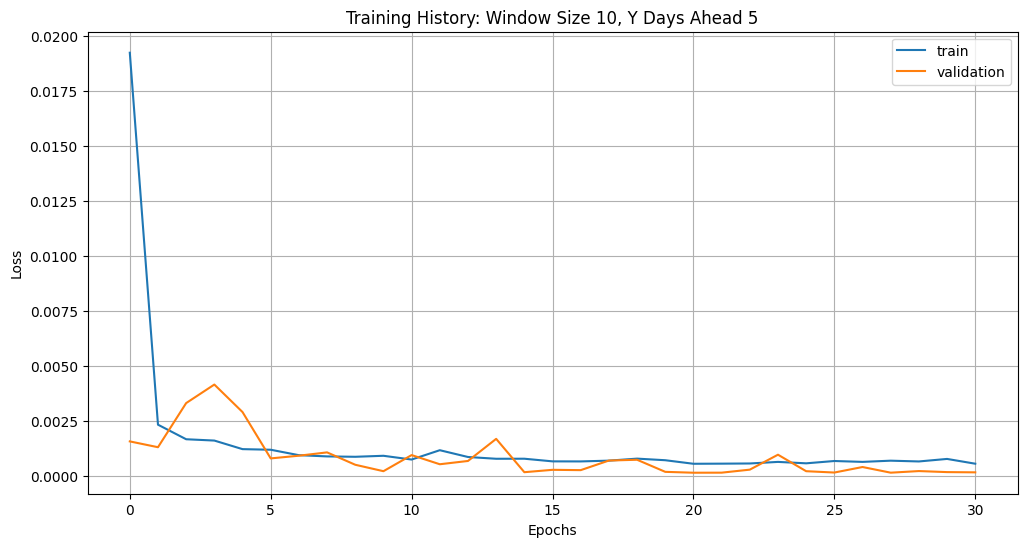

Iteration: 95, Window Size: 10, Y Days Ahead: 6
X shape: (3792, 10, 1)
y shape: (3792, 6)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Mean Squared Error: 0.0011
Model saved to ./models_cnn/cnn_w10_d6.keras
Final epoch: 24


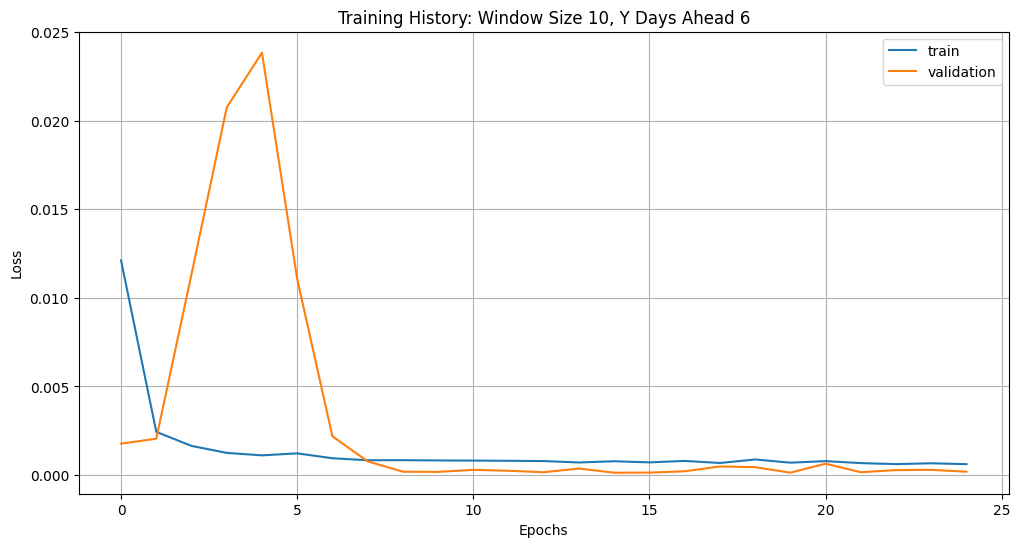

Iteration: 96, Window Size: 10, Y Days Ahead: 7
X shape: (3791, 10, 1)
y shape: (3791, 7)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w10_d7.keras
Final epoch: 43


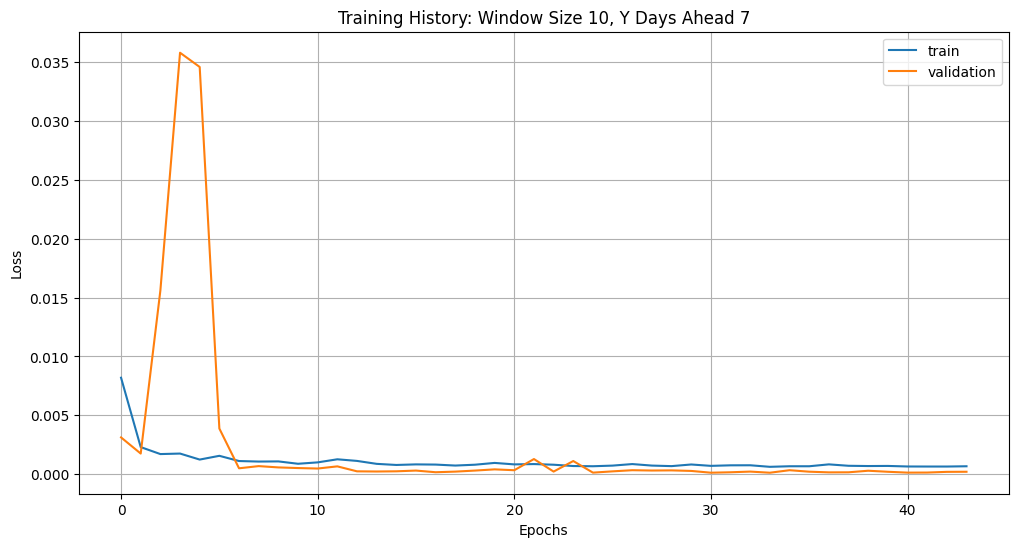

Iteration: 97, Window Size: 10, Y Days Ahead: 8
X shape: (3790, 10, 1)
y shape: (3790, 8)
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step
Mean Squared Error: 0.0017
Model saved to ./models_cnn/cnn_w10_d8.keras
Final epoch: 34


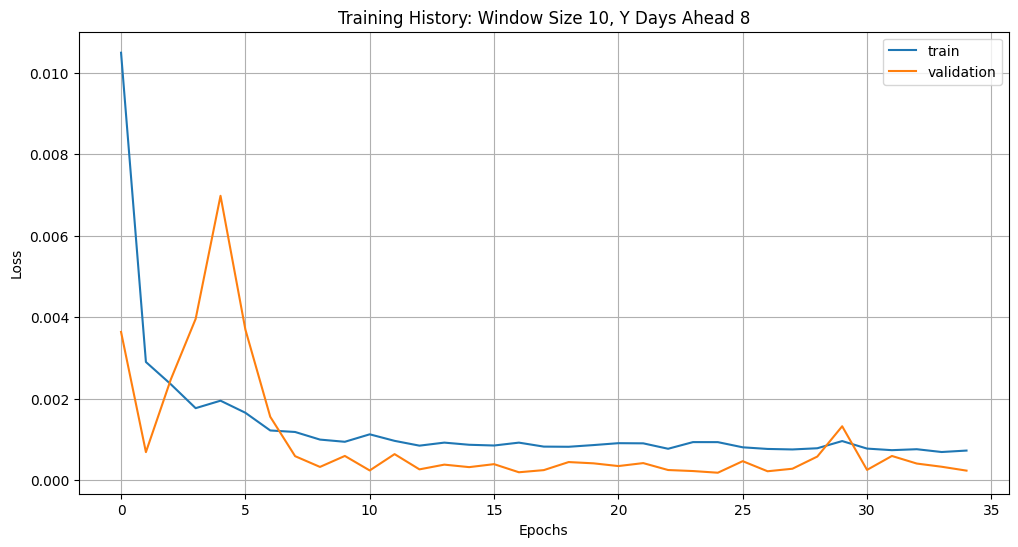

Iteration: 98, Window Size: 10, Y Days Ahead: 9
X shape: (3789, 10, 1)
y shape: (3789, 9)
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Mean Squared Error: 0.0014
Model saved to ./models_cnn/cnn_w10_d9.keras
Final epoch: 25


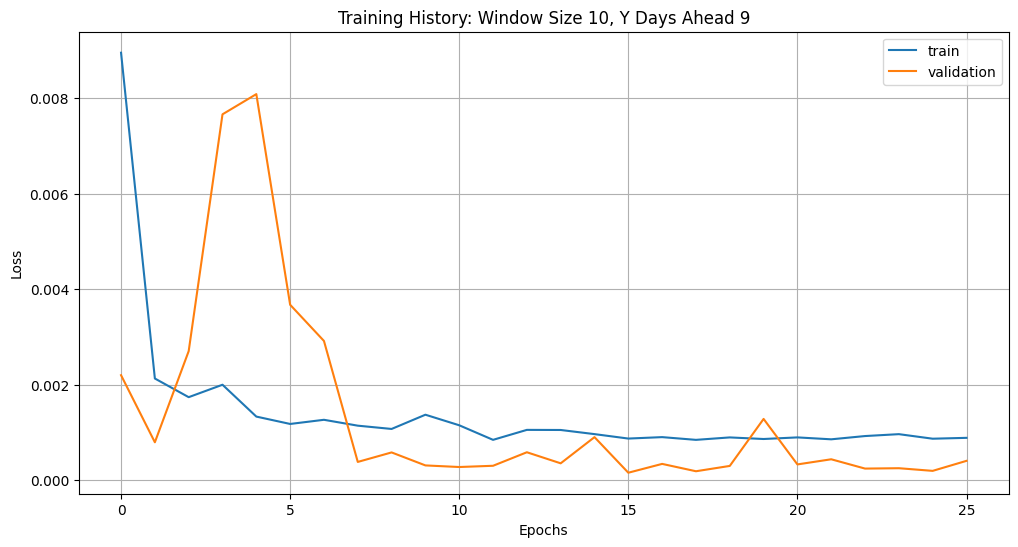

Iteration: 99, Window Size: 10, Y Days Ahead: 10
X shape: (3788, 10, 1)
y shape: (3788, 10)
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
Mean Squared Error: 0.0013
Model saved to ./models_cnn/cnn_w10_d10.keras
Final epoch: 45


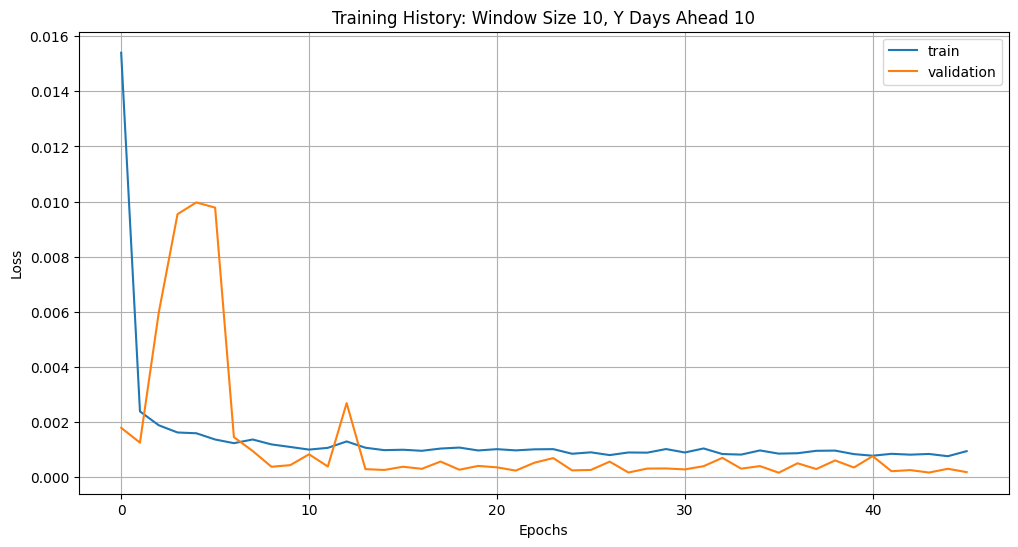

In [7]:
def functionError(window_size, y_days_ahead):
    X, y = create_dataset(scaled_data, window_size, y_days_ahead)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
    
    # Reshape the data for Conv1D
    model = build_1d_cnn_model(window_size, 1, y_days_ahead)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                      validation_data=(X_val, y_val), 
                      callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
                      verbose=0)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")

    # Save the model
    model_dir = './models_cnn'
    os.makedirs(model_dir, exist_ok=True)
    model_path = f'{model_dir}/cnn_w{window_size}_d{y_days_ahead}.keras'
    model.save(model_path)
    print(f"Model saved to {model_path}")

    #Final epoch
    final_epoch = len(history.history['loss']) - 1
    print(f"Final epoch: {final_epoch}")

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title(f"Training History: Window Size {window_size}, Y Days Ahead {y_days_ahead}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    return mse

for i in range(numberOfDataPoints):
    window_size = minWindowsInput + i * distanceBetweenDataPointsWindows
    for j in range(numberOfDataPoints):
        y_days_ahead = minWindowsPredicted + j * distanceBetweenDataPointsPredict
        print("=====================================================================================================")
        print(f"Iteration: {iteration}, Window Size: {window_size}, Y Days Ahead: {y_days_ahead}")
        error[i][j] = functionError(window_size, y_days_ahead)
        iteration += 1

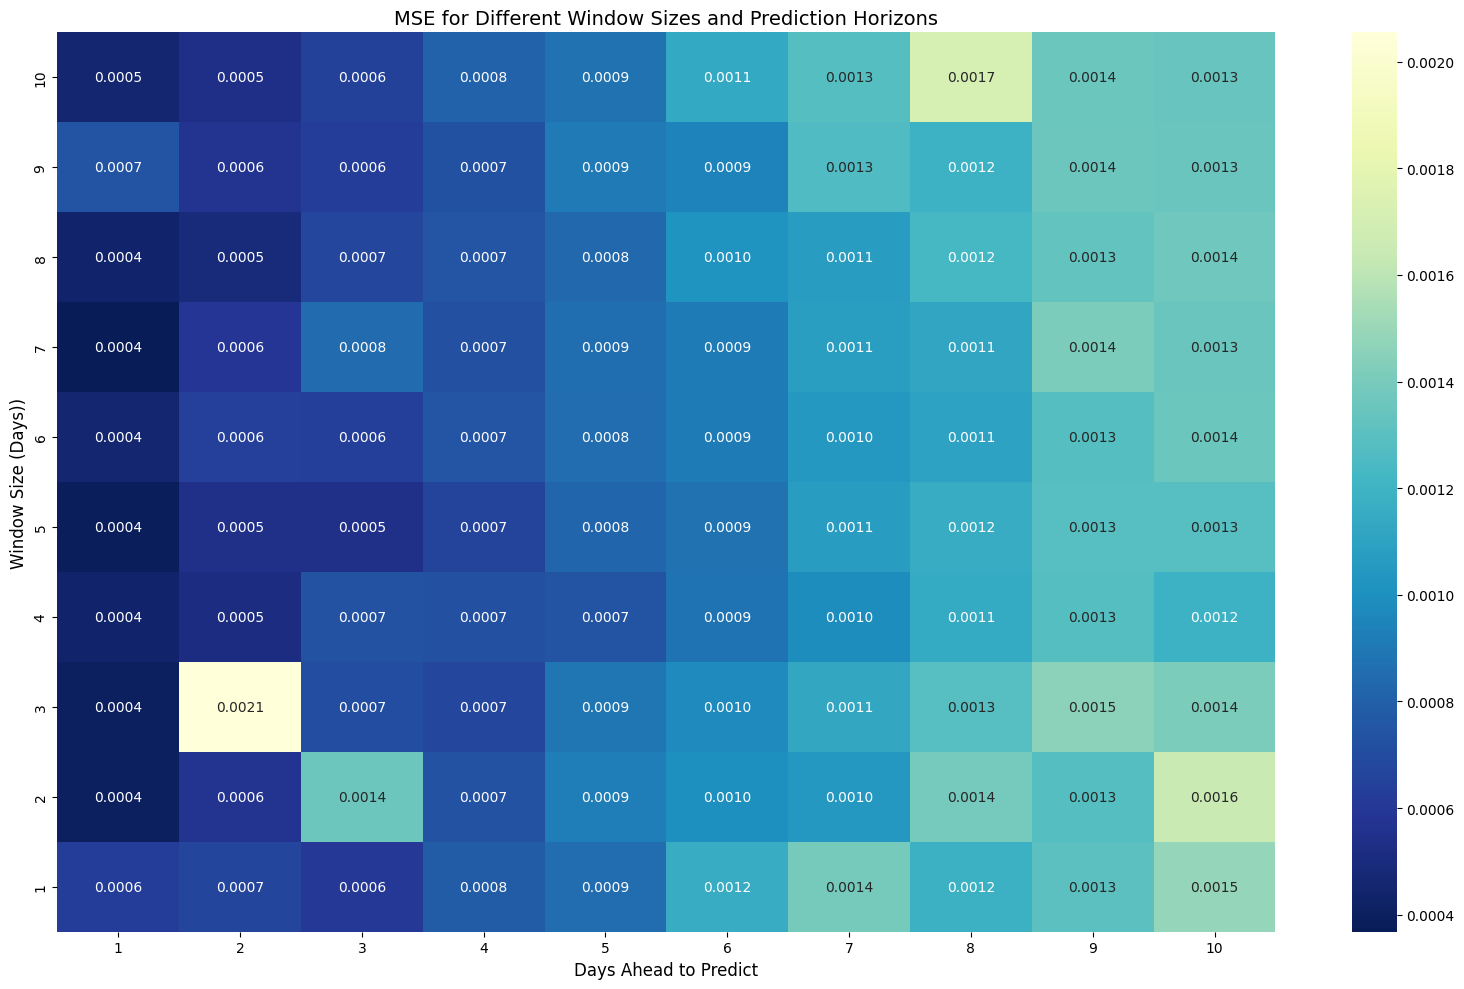

In [8]:
# Create figure with good size
plt.figure(figsize=(16, 10))

# Create enhanced heatmap
sns.heatmap(np.flipud(error), 
            annot=True,              
            fmt=".4f",               
            cmap="YlGnBu_r",         
            xticklabels=range(minWindowsPredicted, minWindowsPredicted + numberOfDataPoints * distanceBetweenDataPointsPredict, distanceBetweenDataPointsPredict),  # X-axis labels (1-10)
            yticklabels=range(minWindowsInput + numberOfDataPoints* distanceBetweenDataPointsWindows -distanceBetweenDataPointsWindows, minWindowsInput - 1, -distanceBetweenDataPointsWindows))  # Y-axis labels (1-10)

# Add axis labels and title
plt.xlabel('Days Ahead to Predict', fontsize=12)
plt.ylabel('Window Size (Days))', fontsize=12)
plt.title('MSE for Different Window Sizes and Prediction Horizons', fontsize=14)
plt.tight_layout()

# Save figure before showing
os.makedirs('./res_cnn', exist_ok=True)
plt.savefig('./res_cnn/window_analysis_heatmap.png', dpi=300)
plt.show()

X shape: (3806, 1, 1)
y shape: (3806, 1)
Successfully loaded model from ./models_cnn/cnn_w1_d1.keras


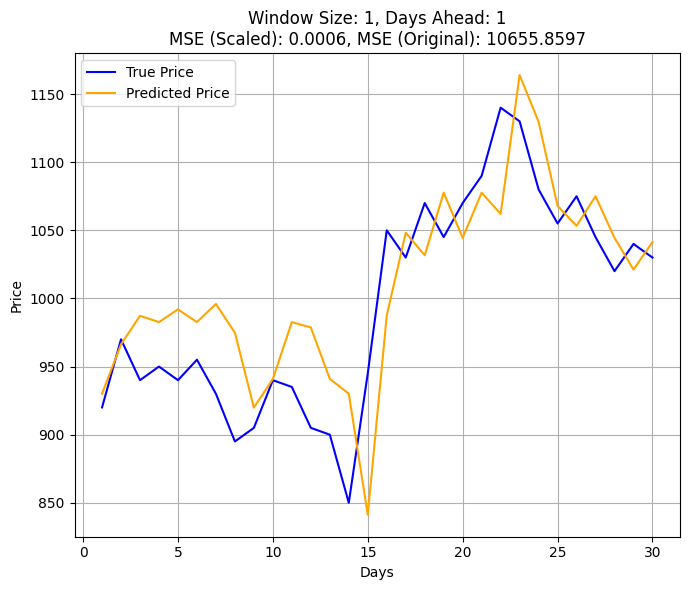

X shape: (3797, 10, 1)
y shape: (3797, 1)
Successfully loaded model from ./models_cnn/cnn_w10_d1.keras


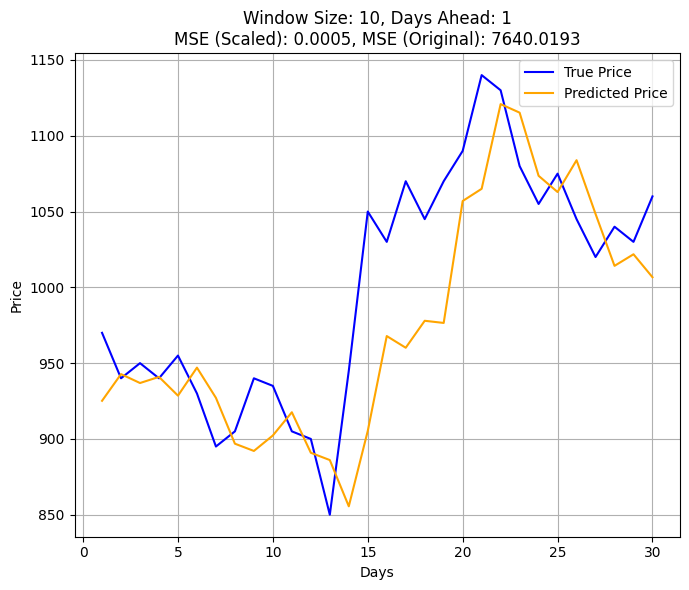

X shape: (3797, 1, 1)
y shape: (3797, 10)
Successfully loaded model from ./models_cnn/cnn_w1_d10.keras


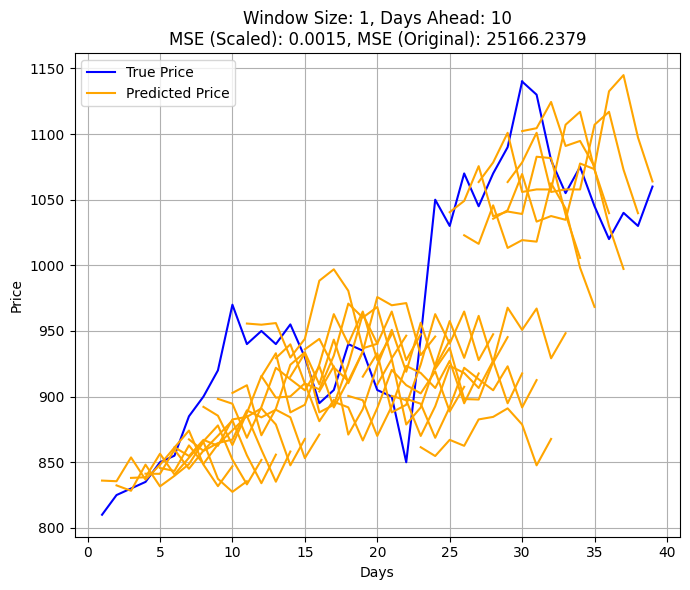

X shape: (3788, 10, 1)
y shape: (3788, 10)
Successfully loaded model from ./models_cnn/cnn_w10_d10.keras


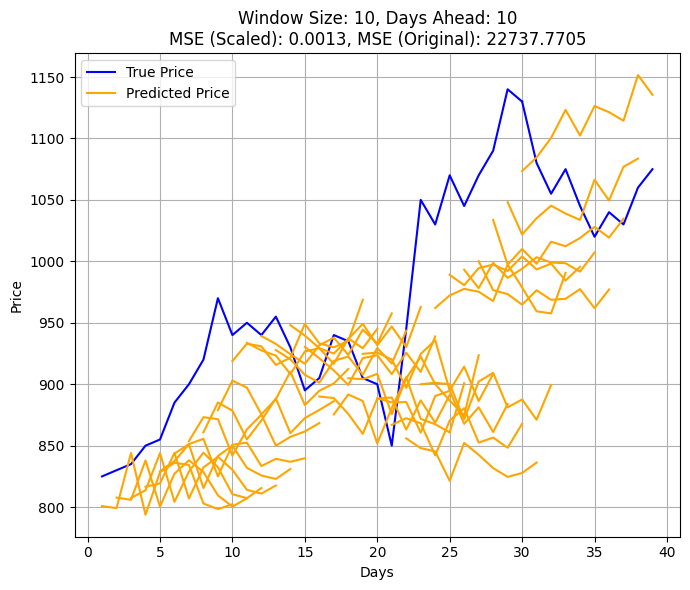

In [9]:
# Function remains the same
def visualize_case(window_size, days_ahead, scaler):
    # Create dataset with specific parameters
    X, y = create_dataset(scaled_data, window_size, days_ahead)
    
    # Use the same splitting approach as defined previously
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
    
    # Load the CNN model that was previously saved
    model_path = f'./models_cnn/cnn_w{window_size}_d{days_ahead}.keras'
    try:
        model = tf.keras.models.load_model(model_path)
        print(f"Successfully loaded model from {model_path}")
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None, float('inf'), float('inf')
    
    # Generate predictions with silent mode
    predictions = model.predict(X_test, verbose=0)
    
    # Calculate MSE on scaled data
    scaled_mse = mean_squared_error(y_test, predictions)
    
    # Inverse transform y_test and predictions to original scale
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)
    pred_orig = scaler.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
    
    # Calculate MSE on original scale
    orig_mse = mean_squared_error(y_test_orig, pred_orig)
    
    return y_test_orig, pred_orig, scaled_mse, orig_mse

# Get min and max values
min_window = minWindowsInput
max_window = minWindowsInput + (numberOfDataPoints - 1) * distanceBetweenDataPointsWindows
min_days_ahead = minWindowsPredicted
max_days_ahead = minWindowsPredicted + (numberOfDataPoints - 1) * distanceBetweenDataPointsPredict

days_shown = 50

# Adjust days_shown based on the number of data points and distance between data points
days_shown -= 20

# Case 1: Min window, min days (single day prediction)

y_test_orig, pred_orig, scaled_mse1, orig_mse1 = visualize_case(min_window, min_days_ahead, scaler)
X = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict

plt.figure(figsize=(7, 6))
plt.plot(X, y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X, pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {min_window}, Days Ahead: {min_days_ahead}\nMSE (Scaled): {scaled_mse1:.4f}, MSE (Original): {orig_mse1:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('./res_cnn/case1.png', dpi=300)
plt.show()

# Case 2: Max window, min days (single day prediction)
y_test_orig, pred_orig, scaled_mse2, orig_mse2 = visualize_case(max_window, min_days_ahead, scaler)
X = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict

plt.figure(figsize=(7, 6))
plt.plot(X,y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X,pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {max_window}, Days Ahead: {min_days_ahead}\nMSE (Scaled): {scaled_mse2:.4f}, MSE (Original): {orig_mse2:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('./res_cnn/case2.png', dpi=300)
plt.show()


# Case 3: Min window, max days (multiple days prediction)
y_test_orig, pred_orig, scaled_mse3, orig_mse3 = visualize_case(min_window, max_days_ahead, scaler)
X_test = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict
X_pred = np.arange(len(pred_orig[0,:])) + 1

plt.figure(figsize=(7, 6))
plt.plot(X_test,y_test_orig[:days_shown, 0], label='True Price', color='blue')
plt.plot(np.arange(len(y_test_orig[days_shown-1, :])) + days_shown, y_test_orig[days_shown-1, :], color='blue')


for day in range(days_shown):
    if day == 1:
        plt.plot(X_pred + day, pred_orig[day, :], label='Predicted Price', color='orange')
    else:   
        plt.plot(X_pred + day, pred_orig[day, :], color='orange')

plt.title(f"Window Size: {min_window}, Days Ahead: {max_days_ahead}\nMSE (Scaled): {scaled_mse3:.4f}, MSE (Original): {orig_mse3:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('./res_cnn/case3.png', dpi=300)
plt.show()

# Case 4: Max window, max days (multiple days prediction)
y_test_orig, pred_orig, scaled_mse4, orig_mse4 = visualize_case(max_window, max_days_ahead, scaler)
X_test = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict
X_pred = np.arange(len(pred_orig[0,:])) + 1

plt.figure(figsize=(7, 6))
plt.plot(X_test,y_test_orig[:days_shown, 0], label='True Price', color='blue')
plt.plot(np.arange(len(y_test_orig[days_shown-1, :])) + days_shown, y_test_orig[days_shown-1, :], color='blue')

for day in range(days_shown):
    if day == 1:
        plt.plot(X_pred + day, pred_orig[day, :], label='Predicted Price', color='orange')
    else:   
        plt.plot(X_pred + day, pred_orig[day, :], color='orange')

plt.title(f"Window Size: {max_window}, Days Ahead: {max_days_ahead}\nMSE (Scaled): {scaled_mse4:.4f}, MSE (Original): {orig_mse4:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('./res_cnn/case4.png', dpi=300)
plt.show()


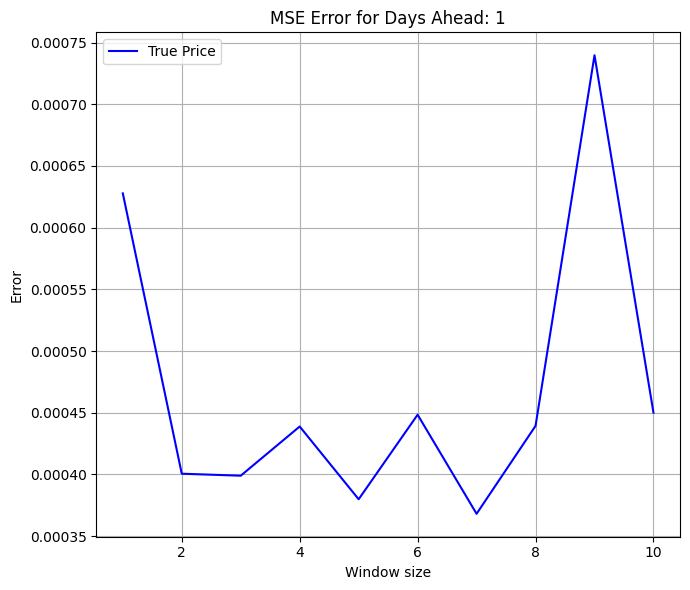

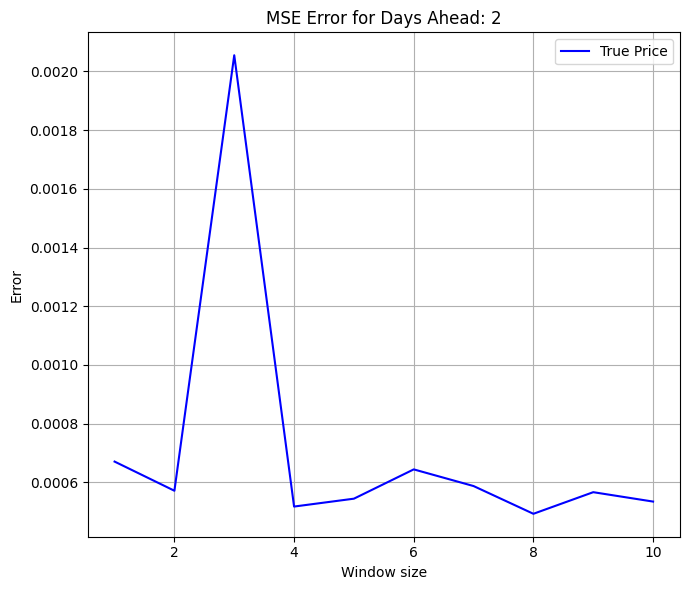

In [10]:
window_sizes = np.arange(minWindowsInput, minWindowsInput + numberOfDataPoints * distanceBetweenDataPointsWindows, distanceBetweenDataPointsWindows)

plt.figure(figsize=(7, 6))
plt.plot(window_sizes, error[:, 0], label='True Price', color='blue')
plt.title(f"MSE Error for Days Ahead: 1")
plt.xlabel('Window size')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('./res_cnn/error for y win 1.png', dpi=300)
plt.show()

plt.figure(figsize=(7, 6))
plt.plot(window_sizes, error[:, 1], label='True Price', color='blue')
plt.title(f"MSE Error for Days Ahead: 2")
plt.xlabel('Window size')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('./res_cnn/error for y win 2.png', dpi=300)
plt.show()


X shape: (3800, 7, 1)
y shape: (3800, 1)
Successfully loaded model from ./models_cnn/cnn_w7_d1.keras


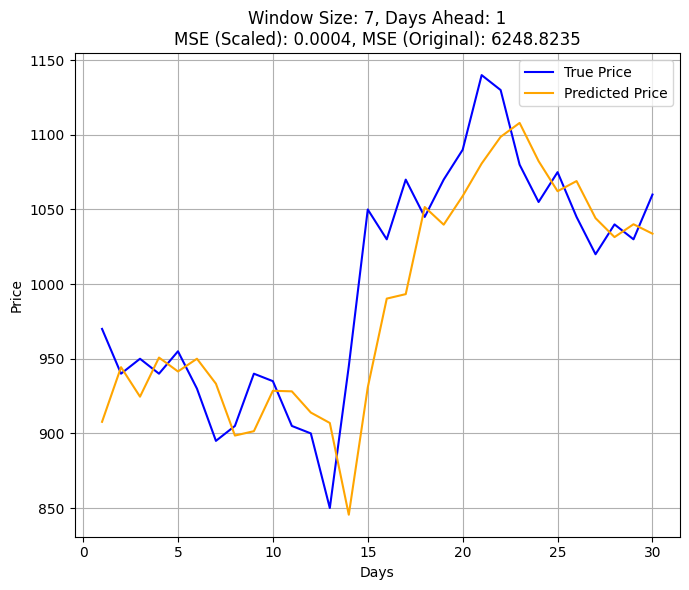

X shape: (3798, 8, 1)
y shape: (3798, 2)
Successfully loaded model from ./models_cnn/cnn_w8_d2.keras


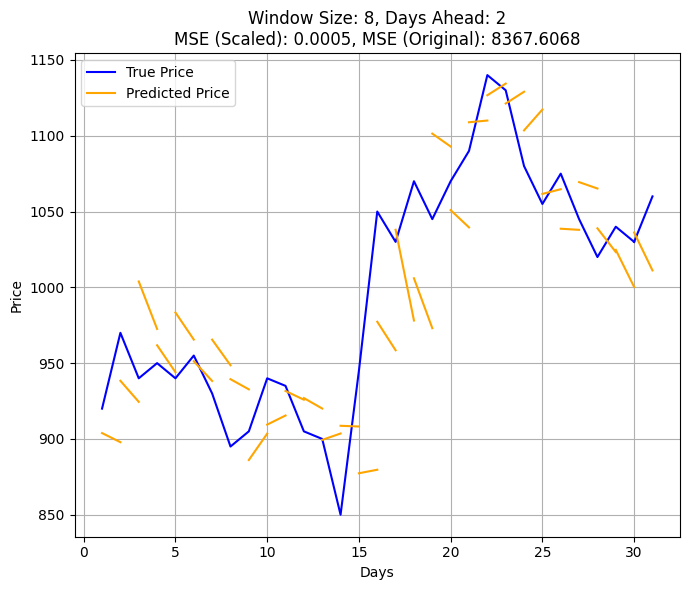

In [13]:
#Best models
# Case 1: 7 window, 1 days (single day prediction)

y_test_orig, pred_orig, scaled_mse1, orig_mse1 = visualize_case(7, 1, scaler)
X = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict

plt.figure(figsize=(7, 6))
plt.plot(X, y_test_orig[:days_shown], label='True Price', color='blue')
plt.plot(X, pred_orig[:days_shown], label='Predicted Price', color='orange')
plt.title(f"Window Size: {7}, Days Ahead: {1}\nMSE (Scaled): {scaled_mse1:.4f}, MSE (Original): {orig_mse1:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('./res_cnn/bestcase1.png', dpi=300)
plt.show()

# Case 2: 8 window, 2 days (multiple days prediction)
y_test_orig, pred_orig, scaled_mse3, orig_mse3 = visualize_case(8, 2, scaler)
X_test = (np.arange(days_shown) + 1) * distanceBetweenDataPointsPredict
X_pred = np.arange(len(pred_orig[0,:])) + 1

plt.figure(figsize=(7, 6))
plt.plot(X_test,y_test_orig[:days_shown, 0], label='True Price', color='blue')
plt.plot(np.arange(len(y_test_orig[days_shown-1, :])) + days_shown, y_test_orig[days_shown-1, :], color='blue')


for day in range(days_shown):
    if day == 1:
        plt.plot(X_pred + day, pred_orig[day, :], label='Predicted Price', color='orange')
    else:   
        plt.plot(X_pred + day, pred_orig[day, :], color='orange')

plt.title(f"Window Size: {8}, Days Ahead: {2}\nMSE (Scaled): {scaled_mse3:.4f}, MSE (Original): {orig_mse3:.4f}")
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('./res_cnn/bestcase2.png', dpi=300)
plt.show()